In [1]:
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/Colab Notebooks/likelion_proj_finalproj'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing

In [3]:
news1= pd.read_csv(f'{base_path}/2020.01.01_2020.12.31_1.csv')
news2 = pd.read_csv(f'{base_path}/2021.01.01_2021.12.31_1.csv')
news3 = pd.read_csv(f'{base_path}/2022.01.01_2022.12.25_1.csv')

In [4]:
all_news=pd.concat([news1,news2,news3])

In [5]:
all_news.head(3)

,0
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영"
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소


In [6]:
# 위키독스와 블로그 코드 활용해서 했습니다.
# https://wikidocs.net/32105
# https://somjang.tistory.com/entry/Keras%EA%B8%B0%EC%82%AC-%EC%A0%9C%EB%AA%A9%EC%9D%84-%EA%B0%80%EC%A7%80%EA%B3%A0-%EA%B8%8D%EC%A0%95-%EB%B6%80%EC%A0%95-%EC%A4%91%EB%A6%BD-%EB%B6%84%EB%A5%98%ED%95%98%EB%8A%94-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0#google_vignette
# 참고https://projectlog-eraser.tistory.com/entry/2-%EA%B0%90%EC%84%B1%EC%96%B4-%EC%82%AC%EC%A0%84-%EA%B5%AC%EC%B6%95

In [7]:
# positive.txt 내용 
# (기존내용) 불티,진출,부상,체결,증가,봉사,기부,신메뉴,신제품,신상,최고,새로운,편한,미소,맛집,착한가게,캠패인,순항,착한,제작지원
# + 기존내용으로는 label작업이 원활하지 못함
# (추가) 케어,수상,관리,반려,대상,서비스,웰컴,선보여,증가,운영,해소,최초,풀었다,겸상,혁신,선도,기부,친화,치유,교감,안정성,보조,돌파,혁신,겨냥

In [8]:
# negative.txt 내용
# (기존내용) 갑질,논란,폭리,허위,과징금,눈물,피해,포화,우롱,위반,리스크,사퇴,급락,하락,폐업,불만,산재,닫아,손배소,구설수,폐점,적발,침해,빨간불,취약,불명예,분신,구형,
# 기소,반토막,호소,불매,냉담,문제,직격탄,한숨,불똥,항의,묵묵부담,싸늘,일탈,파문,게이트,횡령,사과문,여파,울상,초토화,급감,우려,중단,퇴출,해지,일베,이물질,벌레,엉망,적발,
# 위생불량,위생엉망,소송,하락,매출하락,반토막,혐의,불매,부채,적발,폭리,과징금,오너리스크,매각,포기
# + 기존내용 인식부족으로 추가 => negative는 아주 적은 인식을 보여준다.
# (추가) 하락,우울,맹견,책임,사고,소음,불가,범죄,낭비,예산낭비,위태로운,똥,무서워,손해,버거운,위반,악화,파괴,환경파괴,버리다,버림,버림받다,죽다,불법,비명
# 금값,무산,부결,잃다,대비,안돼,사고,조명,부상

In [9]:
# 아래 기사 2020 데이터로 label 작업

In [10]:
train_file = (f'{base_path}/2020.01.01_2020.12.31_1.csv')
data = pd.read_csv(train_file, delimiter=',')

In [11]:
data.head(3)

,0
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영"
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소


In [12]:
with open("./negative.txt", encoding='utf-8') as neg:
  negative = neg.readlines()

negative = [neg.replace("\n", "") for neg in negative]

with open("./positive.txt", encoding='utf-8') as pos:
  positive = pos.readlines()

negative = [neg.replace("\n", "") for neg in negative]
positive = [pos.replace("\n", "") for pos in positive]

In [13]:
from tqdm import tqdm
import re

labels = []

title_data = list(data['0'])

for title in tqdm(title_data):
  clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', title) 
  negative_flag = False
  # label = 0
  for i in range(len(negative)):
    if negative[i] in clean_title:
      label = 1
      negative_flag = True
      print("negative 비교단어 : ", negative[i], "clean_title : ", clean_title) 
      break
  if negative_flag == False:
    for i in range(len(positive)):
      if positive[i] in clean_title:
        label = 0
        print("positive 비교단어 : ", positive[i], "clean_title : ", clean_title)
        break

  labels.append(label)

  2%|▏         | 85/4000 [00:00<00:06, 651.63it/s]

positive 비교단어 :  반려 clean_title :  은평구 반려동물 문화교실 댕댕이 스쿨 운영
positive 비교단어 :  반려 clean_title :  새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
negative 비교단어 :  우울 clean_title :  반려식물로 코로나 우울 해소
positive 비교단어 :  반려 clean_title :  우리 아이와 반려동물 함께 생활해도 괜찮을까”
positive 비교단어 :  반려 clean_title :  영상반려동물 식품의 세계화 정부지원 받아 글로벌기업으로 우뚝
positive 비교단어 :  반려 clean_title :  배스 사들여 반려동물식품 제조빈집 고쳐 장기거주 사회주택 제공
positive 비교단어 :  증가 clean_title :  반려동물도 코로나블루 쿠쿠전자 넬로 팻케어 제품 수요 증가
negative 비교단어 :  맹견 clean_title :  2021년부터 동물보호법 상 맹견은 책임보험 의무화
positive 비교단어 :  반려 clean_title :  웰컴 투 펫팸 반려동물도 쇼크로 쓰러진다
positive 비교단어 :  선보여 clean_title :  지솔펫 반려동물을 위한 살균·소독·향균 탈취제 선보여
positive 비교단어 :  반려 clean_title :  펫 닥터 아이센텀동물메디컬센터반려동물 녹내장
positive 비교단어 :  반려 clean_title :  2020 대한민국 반려동물 산업대상12개 기업 선정
positive 비교단어 :  케어 clean_title :  펫플스토리 반려동물 복지 향한 펫로스케어’의 남다른 행보
negative 비교단어 :  맹견 clean_title :  2021년부터 동물보호법 상 맹견은 책임보험 의무화
positive 비교단어 :  반려 clean_title :  웰컴 투 펫팸 반려동물도 쇼크로 쓰러진다
positive 비교단어 :  반려 clean_title :  상생협력펫티켓으로 인간과 반려동

  8%|▊         | 321/4000 [00:00<00:02, 1230.34it/s]

 clean_title :  에어부산 반려 동물과 함께 하늘 위 펫스토랑 이벤트 개최
positive 비교단어 :  반려 clean_title :  경기도 반려동물 입양센터’ 수원에 개관
positive 비교단어 :  오픈 clean_title :  라드씨엔에스 반려동물 플랫폼 서비스 펫팟 사이트 오픈
positive 비교단어 :  오픈 clean_title :  대명소노 반려동물 스파시설 소노펫 포미 오픈
negative 비교단어 :  리스크 clean_title :  리얼푸드코로나 블루에 반려동물 입양 확인해야 할 체크리스크
negative 비교단어 :  위반 clean_title :  농식품부 동물보호법 위반’ 반려동물 영업장 43개소 적발
negative 비교단어 :  위반 clean_title :  반려동물 영업장 71개 중 43개 동물보호법 위반
positive 비교단어 :  반려 clean_title :  에어부산 반려동물 동반 고객에 사료 샘플·간식 키트 제공
positive 비교단어 :  오픈 clean_title :  대명소노 반려동물 스파시설 소노펫 포미 오픈
negative 비교단어 :  리스크 clean_title :  리얼푸드코로나 블루에 반려동물 입양 확인해야 할 체크리스크
positive 비교단어 :  오픈 clean_title :  라드씨엔에스 반려동물 플랫폼 펫팟 예고 사이트 오픈
negative 비교단어 :  위반 clean_title :  농식품부 동물보호법 위반’ 반려동물 영업장 43개소 적발
positive 비교단어 :  반려 clean_title :  갈 곳 없는 코로나19 확진자의 반려동물 동물병원에 오다
positive 비교단어 :  반려 clean_title :  확진자 반려동물 어떡해광주시 16일부터 임시 돌봄 서비스
positive 비교단어 :  반려 clean_title :  에어부산 반려동물 동반 손님에 펫 푸드 웰츠 트래블 키트 제공
positive 비교단어 :  반려 clean_title :  확진자 반

 11%|█         | 442/4000 [00:00<00:03, 1073.26it/s]

 피해 clean_title :  상처뿐인 반려동물 분양열흘만에 사망 등 피해 41 증가
positive 비교단어 :  반려 clean_title :  펫카드코로나19 집콕 생활에 필요한 반려동물 용품은
positive 비교단어 :  반려 clean_title :  광주시 코로나19 확진자 반려동물 임시 돌봄
positive 비교단어 :  주목 clean_title :  루프탑 가든에 반려동물 놀이터까지”쌍용더 플래티넘 프리미어 등 주목
positive 비교단어 :  반려 clean_title :  아주 각별한 기행 곽수연의 특별한 동물친구남양주 농장 서현덕씨 반려
positive 비교단어 :  반려 clean_title :  김하국의 애니멀세대 재발하기 쉬운 반려동물 결석
positive 비교단어 :  관리 clean_title :  농진청 반려동물 위기관리 통합 서비스 기반 기술 개발
positive 비교단어 :  반려 clean_title :  멍냥이 성장기 기록해볼까GS25 반려동물 다이어리 반다 판매
negative 비교단어 :  피해 clean_title :  반려동물 관련 피해 구제’ 70 이상이 폐사·질병’
positive 비교단어 :  반려 clean_title :  경기도 반려견 등록제 참여‥ 반려동물 보험 가입’이 무료
positive 비교단어 :  오픈 clean_title :  반려동물용품 쇼핑플랫폼 펫팟 티징사이트 오픈
positive 비교단어 :  반려 clean_title :  반려동물용품 인증제 도입 필요 펫 산업의 현주소④
negative 비교단어 :  우울 clean_title :  코로나에 우울한 영국인 4명 중 1명 반려동물 기른다
positive 비교단어 :  관리 clean_title :  반려동물 위기관리 통합 서비스’ 기반 기술 개발
positive 비교단어 :  반려 clean_title :  반려동물 진료비 부담 완화 지원 조례 도의회 통과
positive 비교단어 :  반려 clean_title :  남양주·과

 16%|█▌        | 632/4000 [00:00<00:04, 718.77it/s]

 집으로 오는 동물병원 솜털즈’ 서울 전역으로 반려동물 방문검진 서비스 
positive 비교단어 :  반려 clean_title :  아주 각별한 기행 곽수연의 동물친구 3부 속초 시골마을 반려견 대가족 
positive 비교단어 :  반려 clean_title :  이제 반려동물 시장도 첨단기술로 통한다 집사 마음 사로잡은 IT 서비스 주
positive 비교단어 :  반려 clean_title :  네슬레 퓨리나 반려동물 맞춤식단 정기 배송 받아보세요”
positive 비교단어 :  반려 clean_title :  강아지·고양이 분양샵 아담스펫 브리딩 통해 높은 퀄리티 반려동물 분양
negative 비교단어 :  위반 clean_title :  반려동물 영업장 절반 이상 동물보호법 위반 적발
positive 비교단어 :  수상 clean_title :  반려동물 사료 업계 최초로얄캐닌 3000만불 수출의 탑 수상
positive 비교단어 :  관리 clean_title :  농진청 반려동물 위기관리 통합 서비스 기반 기술 개발
negative 비교단어 :  사고 clean_title :  SNS서 반려동물 언급량 급증사건·사고 40 고양이 청원 1위
positive 비교단어 :  수상 clean_title :  갤러리아백화점 2020 동물복지대상 농식품부 장관상 수상
positive 비교단어 :  반려 clean_title :  부산경상대 반려동물보건과 교수 부산시 반려동물 현황 정책 연구 최종 발
positive 비교단어 :  반려 clean_title :  소노호텔리조트 반려동물과 특별한 선물 같은 하루를 계획하세요
positive 비교단어 :  반려 clean_title :  경남도 반려동물 진료비 자율표시제 확대
positive 비교단어 :  반려 clean_title :  경기도 반려동물 입양센터 수원 인계동에 개소
positive 비교단어 :  반려 clean_title :  경기도 반려동물 입양센터 수원 인계동에 개소
positive 비교단어

 18%|█▊        | 707/4000 [00:00<00:04, 680.22it/s]

positive 비교단어 :  반려 clean_title :  펫캉스부터 반려동물 다이어리까지 유통가 펫팸족 겨냥
positive 비교단어 :  반려 clean_title :  춘천시 24일까지 반려동물 관련 영업장 단속
positive 비교단어 :  반려 clean_title :  G9 일룸 손잡고 펫 가구 할인전반려동물 인테리어 한 자리에
positive 비교단어 :  반려 clean_title :  루프탑 가든에 반려동물 놀이터까지”원스톱 라이프형 커뮤니티 아파트
positive 비교단어 :  반려 clean_title :  반려동물 시장 첨단기술 만나 성장세 이어가반려인 마음 사로잡은 IT 서비
positive 비교단어 :  반려 clean_title :  EBS 아주 각별한 기행 곽수연의 특별한 동물친구 현덕씨와 반려소 지축이
positive 비교단어 :  수상 clean_title :  갤러리아百 동물복지대상 농식품부장관상 수상
positive 비교단어 :  반려 clean_title :  EBS 아주 각별한 기행 곽수연의 특별한 동물친구 현덕씨와 반려소 지축이
positive 비교단어 :  반려 clean_title :  산책도 잠도 함께반려 악어와 사는 남자
positive 비교단어 :  반려 clean_title :  강릉시 동물사랑센터’ 준공식 반려동물 친화도시로 거듭난다
positive 비교단어 :  반려 clean_title :  딩동 맞춤형 반려동물 영양제 사업 도전합니다
positive 비교단어 :  반려 clean_title :  켄싱턴리조트 충주 반려동물 동반 펫 룸 도입
positive 비교단어 :  반려 clean_title :  조병두 봉화군의원 반려동물 펫산업 활성화 방향·정책개발 질의
positive 비교단어 :  출시 clean_title :  집으로 찾아가는 반려동물 미용사펫트너 방문미용 출시
positive 비교단어 :  반려 clean_title :  사설반려동물 복지정책 확산 기대
positive 비교단어 :  반

 22%|██▏       | 889/4000 [00:01<00:04, 733.69it/s]

clean_title :  반려동물 입양부터 장례까지 책임집니다펫닥펫휴 맞손
positive 비교단어 :  수상 clean_title :  갤러리아백화점 2020 대한민국 동물복지대상서 농림축산식품부 장관상 수상
positive 비교단어 :  반려 clean_title :  천안 행복콜 반려동물 동승·여성안심 택시 등 도입해야
positive 비교단어 :  반려 clean_title :  한화건설 반려동물 친화 인테리어 우수디자인 선정
positive 비교단어 :  반려 clean_title :  40년 인생 바친 전해수이젠 반려동물 위생도 생각해야죠
positive 비교단어 :  반려 clean_title :  반려견 슬개골·반려묘 위·장염반려동물 보험금 지급액 최다
positive 비교단어 :  반려 clean_title :  우진비앤지 디씨팜과 반려동물 프로바이오틱스 제품 국내 총판계약
positive 비교단어 :  반려 clean_title :  낯선곳을 두려워하는 고양이 이사는 어떻게 해야할까 반려동물농장  
positive 비교단어 :  반려 clean_title :  경기도 남양주·과천·성남과 함께 반려동물 보험가입 지원사업’ 시행
positive 비교단어 :  선보여 clean_title :  트욘세 한가빈 네이버 쇼핑 라이브서 반려동물 브랜드 보가덴트 선보여
positive 비교단어 :  입점 clean_title :  국내 최대 반려동물 전문백화점 쥬박스 창업 및 입점 문의 증가
positive 비교단어 :  반려 clean_title :  켄싱턴리조트 충주 반려동물 동반 객실 펫 룸’ 선봬
positive 비교단어 :  반려 clean_title :  반려동물’ 원조 TV 동물농장’ 1000회 20년 간 인간과 동물의 공존 모색
positive 비교단어 :  보조 clean_title :  미 당국 비행기 객실엔 개만 탈 수 있다보조동물 규정 마련
negative 비교단어 :  한숨 clean_title :  죽어서 비행기 태워야 하나요제주

 27%|██▋       | 1097/4000 [00:01<00:03, 842.17it/s]

 신현준 국제영화제 수상에 감격아내 만삭사진 공개 반려동물은 가족”SN
positive 비교단어 :  반려 clean_title :  예산군 오가면지역사회보장협의체 홀몸어르신 반려식물 보급
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 놓치지 마세요 반려동물 당뇨병의 신호
positive 비교단어 :  출시 clean_title :  반려동물 영양제 닥터레이 항산화 영양제 마그네타 미니 출시
positive 비교단어 :  관리 clean_title :  반려동물관리사 지격증 한국직업능력진흥원 언택트시스템 무료인강 제공
negative 비교단어 :  위태로운 clean_title :  펫 비타민 위태로운 유기동물들에게 구호의 손길을 내밀며 온기를 더하는 김
negative 비교단어 :  호소 clean_title :  군산유기동물보호소 동물입양 집중기간 운영
negative 비교단어 :  피해 clean_title :  반려동물 관련 소비자 피해 증가주의 필요
positive 비교단어 :  반려 clean_title :  양산시 반려동물 지원센터 내년 하반기 착공
positive 비교단어 :  반려 clean_title :  펫트너 반려동물 방문 미용 서비스 론칭
negative 비교단어 :  호소 clean_title :  기획 연재 당진시 추진 사업 그것이 알고 싶다  동물보호소 이전반려동
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 항암치료는 정말 힘들기만 할까
positive 비교단어 :  반려 clean_title :  펫트너 반려동물 방문 미용 서비스 론칭
negative 비교단어 :  호소 clean_title :  기획 연재 당진시 추진 사업 그것이 알고 싶다  동물보호소 이전반려동
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 항암치료는 정말 힘들기만 할까
negative 비교단어 :  피해 clean_title :  가습기 살균제 동물 

 31%|███▏      | 1255/4000 [00:01<00:02, 1005.65it/s]

 clean_title :  집콕 늘자 펫코노미도 뜬다펫 케어 제품 수요 급증
positive 비교단어 :  반려 clean_title :  서울대 수의과 대학인투씨엔에스 반려동물 야생동물 연구 업무 협약
positive 비교단어 :  반려 clean_title :  서울대 수의과 대학인투씨엔에스 반려동물 야생동물 연구 업무 협약
positive 비교단어 :  최고 clean_title :  송중기→방탄소년단 정국 연예계 소띠 스타 중 최고의 관상은 연중라이브
positive 비교단어 :  보조 clean_title :  장례지도사 등도 50세 이상 채용땐 보조금
positive 비교단어 :  보조 clean_title :  장례지도사 등도 50세 이상 채용땐 보조금
positive 비교단어 :  케어 clean_title :  쿠쿠 코로나 속 펫 케어 가전’ 쾌속 성장
negative 비교단어 :  손해 clean_title :  신년사 정지원 손해보험협회장 실손보험·자동차보험 구조 개선할 것전
negative 비교단어 :  문제 clean_title :  경남도 윤난실 사회혁신추진단장 지역문제해결 대통령 표창
positive 비교단어 :  케어 clean_title :  코로나에도 매출 4배 껑충펫케어 스타트업 뜬다
negative 비교단어 :  책임 clean_title :  고양이 분양샵 가필드고양이 반려인들 위해 무료분양 및 책임분양 진행
positive 비교단어 :  수상 clean_title :  정지원 손보협회장 보험 혁신 필수상품·서비스 딥 체인지로 시장 앞서나
positive 비교단어 :  반려 clean_title :  당근마켓 동네 주민들의 최애 관심사는 강아지 고양이 등 반려동물’
positive 비교단어 :  반려 clean_title :  경기도 반려동물 테마파크 지지부진
positive 비교단어 :  반려 clean_title :  2020 부산 동물사랑 온택트 문화축제 부산경상대학교 반려동물보건과 독 어질
negative 비교단어

 34%|███▍      | 1362/4000 [00:01<00:03, 802.30it/s] 

 clean_title :  고양이 무료분양 반려동물 플랫폼 묘하개 사지말고 입양하세요
positive 비교단어 :  주목 clean_title :  반려동물 가구 증가 반려동물 케어 기능 갖춘 펫앤스테이 주목
positive 비교단어 :  반려 clean_title :  구리시 반려동물 펫티켓 교실 개그콘서트’ 운영
positive 비교단어 :  반려 clean_title :  코로나19 이후 1인 가정 늘면서 반려동물’ 항공수입 급증
positive 비교단어 :  반려 clean_title :  구리시 반려동물 펫티켓 교실 개그콘서트’ 운영
positive 비교단어 :  반려 clean_title :  코로나19 이후 1인 가정 늘면서 반려동물’ 항공수입 급증
positive 비교단어 :  출시 clean_title :  한국반려동물영양연구소 닥터레이 오메가3 영양제 출시 이벤트
positive 비교단어 :  반려 clean_title :  투데이춘추 반려동물 전성시대 슬기로운 펫티켓 생활
positive 비교단어 :  반려 clean_title :  ETx핏펫 같이 오래 살자” 반려동물 건강검진
positive 비교단어 :  반려 clean_title :  광주 광산구 카페 kind of반려동물과 함께 카페에서 힐링
positive 비교단어 :  반려 clean_title :  20세 장수동물 어떻게12월2일 의왕시 온라인 반려동물 문화교실
positive 비교단어 :  주목 clean_title :  펫머니 잡아라반려동물 산업 성장과 함께 주목받는 펫앤스테이’
positive 비교단어 :  관리 clean_title :  펫시터 반려동물관리사 자격증 취득과정 무료수강 선착순 이벤트 선봬
positive 비교단어 :  반려 clean_title :  춘천 반려동물·사람 공존하는 도시 만든다
positive 비교단어 :  반려 clean_title :  반려동물 앱 집사일기 대규모 업데이트 실시
positive 비교단어 :  증가 clean_title : 

 38%|███▊      | 1524/4000 [00:02<00:04, 590.13it/s]

 반려 clean_title :  달서구 장동공원에 대구 첫 반려동물 놀이터 생긴다
positive 비교단어 :  출시 clean_title :  LGU 반려동물 위한 U스마트홈 펫케어’ 신규 서비스 출시
positive 비교단어 :  반려 clean_title :  펫과사전 반려동물도 추위를 타나요
positive 비교단어 :  출시 clean_title :  LG유플러스 반려동물 전용기기·보험 합친 펫케어 출시
positive 비교단어 :  반려 clean_title :  달서구 장동공원에 대구 첫 반려동물 놀이터 생긴다
positive 비교단어 :  반려 clean_title :  반려동물 동반 외출 시 나도 모르게 관절상하는 습관’은
positive 비교단어 :  서비스 clean_title :  원업크리에이티브 동물병원 인터넷 마케팅 서비스 나선다
positive 비교단어 :  반려 clean_title :  반려동물용품 지켜줄게 고양이 두부모래 개발한 순수함 수익금 전액 후원
positive 비교단어 :  반려 clean_title :  봉선사 살처분 돼지· 반려동물 천도재 봉행  네 잘못이 아니야
positive 비교단어 :  출시 clean_title :  신장 질환 있는 반려동물에게 먹이세요 영양식 메디비아 출시
positive 비교단어 :  케어 clean_title :  LGU 반려동물 케어 솔루션 U스마트홈 펫케어 서비스 확장
positive 비교단어 :  반려 clean_title :  펫과사전 반려동물도 추위를 타나요
positive 비교단어 :  출시 clean_title :  LG유플러스 반려동물 전용기기·보험 합친 펫케어 출시
positive 비교단어 :  반려 clean_title :  달서구 장동공원에 대구 첫 반려동물 놀이터 생긴다
positive 비교단어 :  반려 clean_title :  반려동물 동반 외출 시 나도 모르게 관절상하는 습관’은
positive 비교단어 :  서비스 clean_title :  원업크리에이티

 41%|████▏     | 1659/4000 [00:02<00:03, 708.55it/s]


positive 비교단어 :  출시 clean_title :  빅데이터 기반 반려동물 건강관리킷 알파도펫 출시
positive 비교단어 :  반려 clean_title :  반려동물 아토피 치료를 위한 신 바이오 발효산물 도포제 개발
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 중요한 역할을 하는 비장 떼어내도 사는 데 지장 없을
positive 비교단어 :  인기 clean_title :  충주 반려동물 돌봄문화교실 성료행동 교정 인기
positive 비교단어 :  반려 clean_title :  행안부 내일 민생규제 혁신 토론회 개최반려동물 진료비 표준화 방안 마련
positive 비교단어 :  오픈 clean_title :  춘천춘천 반려동물놀이터 내년 4월 오픈
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 무료수강 이벤트 진행
positive 비교단어 :  반려 clean_title :  수의사 분포 현황 임상수의사 89％ 반려동물 진료
positive 비교단어 :  반려 clean_title :  반려동물 관련시장 급성장
positive 비교단어 :  기부 clean_title :  오리젠아카나코리아 구산동대형견쉼터 반려동물식품 1톤 기부
positive 비교단어 :  기부 clean_title :  한국베름주식회사 반려동물 유산균 펫아이3000 기부
positive 비교단어 :  출시 clean_title :  LG전자 반려동물 가구 위한 무선청소기 출시
positive 비교단어 :  반려 clean_title :  화명1동 독거 어르신 가구에 반려동물’ 지원 外
positive 비교단어 :  반려 clean_title :  無방부제’ 반려동물 사료라더니75 검출
positive 비교단어 :  기부 clean_title :  한국베름㈜ 유기견보호단체에 반려동물 유산균 펫아이3000 기부
positive 비교단어 :  반려 clean_title :  이

 47%|████▋     | 1872/4000 [00:02<00:02, 810.05it/s]


positive 비교단어 :  반려 clean_title :  펫플 프렌즈 부산경상대 반려동물보건과
positive 비교단어 :  반려 clean_title :  펫 톡톡 반려동물 눈 깜빡임방치하면 시력 잃을 수도
positive 비교단어 :  기부 clean_title :  로얄캐닌이 제안하는 반려동물 맞춤 영양 성장기부터 노령기까지 필요한 영
positive 비교단어 :  반려 clean_title :  커지는 반려동물 시장 스타트업 잇단 도전장
positive 비교단어 :  반려 clean_title :  호남 유일 최대규모 반려동물산업박람회 제8회 광주펫쇼 개최
positive 비교단어 :  반려 clean_title :  서울호서전문학교 반려동물학과 스쿠버다이빙 자격증 취득 프로그램 진행
positive 비교단어 :  반려 clean_title :  반려동물 털 제대로 청소하는 무선청소기 등장
positive 비교단어 :  반려 clean_title :  경남 전국 첫 시범 반려동물 진료비 자율표시제 더욱 확대
positive 비교단어 :  반려 clean_title :  반려동물과 함께
positive 비교단어 :  새로운 clean_title :  품고안고 반려동물을 품어주고 안아주는 새로운 시작
positive 비교단어 :  체결 clean_title :  경남도수의사회 반려동물 진료비 자율표시제 활성화 업무협약 체결
positive 비교단어 :  반려 clean_title :  반려동물과 함께
positive 비교단어 :  새로운 clean_title :  품고안고 반려동물을 품어주고 안아주는 새로운 시작
positive 비교단어 :  반려 clean_title :  소소일기① 오경아 반려동물 덕분에 저절로 운동
positive 비교단어 :  관리 clean_title :  반려동물관리사 등 한국직업능력진흥원 언택트시스템 무료인강 제공
positive 비교단어 :  반려 clean_title :  서울시 서부여성발전센터 반려동물 맞춤형 일자리

 49%|████▉     | 1960/4000 [00:02<00:02, 810.57it/s]

 반려 clean_title :  도농어산촌협동조합 행복한 반려동물 브리딩입양 프로젝트 추진
positive 비교단어 :  반려 clean_title :  올바른 반려동물 문화 정착 위해 최선
positive 비교단어 :  반려 clean_title :  웰컴 투 펫팸 반려동물도 혈액형이 있다
positive 비교단어 :  관리 clean_title :  반려동물 건강관리 플랫폼 모모프로젝트
positive 비교단어 :  반려 clean_title :  세종시의회 이순열 의원 동물 보호 및 성숙한 반려동물 문화 정착을 위한 간
positive 비교단어 :  반려 clean_title :  부산경상대 반려동물보건과 교수 부산시 반려동물 양육현황 정책 연구과제
positive 비교단어 :  새로운 clean_title :  도농어산촌 반려동물행복프로젝트’ 추진새로운 반려동물 문화 선도할
positive 비교단어 :  관리 clean_title :  반려동물 건강관리 플랫폼 모모프로젝트
positive 비교단어 :  반려 clean_title :  세종시의회 이순열 의원 동물 보호 및 성숙한 반려동물 문화 정착을 위한 간
positive 비교단어 :  선보여 clean_title :  반려동물 건강 위한 쿠쿠 펫 가전 매출 껑충 렌털 서비스도 선보여
negative 비교단어 :  대비 clean_title :  CJ ENM 오쇼핑부문 반려동물 관련 매출 전년대비 45↑”
positive 비교단어 :  케어 clean_title :  울지마마이펫 반려동물 모근 케어 입욕제 신비한약탕 내놔
positive 비교단어 :  반려 clean_title :  코코스퀘어연암대학교 LINC기반 반려동물산업 업무협약
positive 비교단어 :  반려 clean_title :  ET 아낌없이 다 해줄게”반려동물 산업 성장
positive 비교단어 :  반려 clean_title :  엇갈린 법원·감사원 판단양평군 반려동물 장묘시설 어떻게 되나
positive 비교단어 :  케어 c

 51%|█████     | 2046/4000 [00:02<00:03, 509.39it/s]

 clean_title :  빼빼로데이？11월 11일은 반려동물 심장의 날
positive 비교단어 :  반려 clean_title :  연암대 ㈜코코스퀘어와 반려동물산업 활성화 앞장
positive 비교단어 :  출시 clean_title :  울지마마이펫 반려동물 모근 케어 입욕제 신비한약탕’ 출시
positive 비교단어 :  관리 clean_title :  입양부터 질병관리까지 금천 반려동물 교실에 다 있네
positive 비교단어 :  반려 clean_title :  대명아임레디 반려동물 동반 소노펫클럽리조트 이용 멤버십 확대
positive 비교단어 :  반려 clean_title :  코코스퀘어연암대 반려동물산업 활성화
positive 비교단어 :  반려 clean_title :  쿠쿠 반려동물 브랜드 넬로 매출 급증
positive 비교단어 :  반려 clean_title :  화명1동 독거 어르신 가구에 반려동물’ 지원
positive 비교단어 :  반려 clean_title :  금천구 반려동물 문화교실 운영
positive 비교단어 :  반려 clean_title :  쿠쿠 반려동물 건강 위한 펫 가전 매출 껑충
positive 비교단어 :  반려 clean_title :  화명1동 독거 어르신 가구에 반려동물’ 지원
positive 비교단어 :  케어 clean_title :  울지마마이펫 반려동물 모근 집중케어 하세요
positive 비교단어 :  반려 clean_title :  사상 최초 백악관 입성하는 유기견반려동물 입양에 호재
positive 비교단어 :  반려 clean_title :  인천 부평구 반려동물 온라인 교양강좌 선착순 모집
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 사타구니가 볼룩 탈장 방치하면 응급질환 될 수도
positive 비교단어 :  반려 clean_title :  연암대주코코스퀘어 반려동물산업 활성화 위해 협력
positive 비교단어 :  반려 clean_title 

 55%|█████▍    | 2191/4000 [00:03<00:03, 546.91it/s]

 clean_title :  무료한 일상 반려동물 친구와 함께
positive 비교단어 :  진출 clean_title :  건국대 도심형 반려동물 복합리조트 사업 진출
positive 비교단어 :  반려 clean_title :  반려동물 전용 펫택시 펫택시로 모시개냥
positive 비교단어 :  반려 clean_title :  물꼬 튼 반려동물 보험료 지원 손보업계 관심↑
positive 비교단어 :  오픈 clean_title :  펫웰페어 반려동물 복지플랫폼 펫웰 서비스 오픈
positive 비교단어 :  반려 clean_title :  무료한 일상 반려동물 친구와 함께
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 우리 집 강아지에게 이 과일 먹여도 되나요
positive 비교단어 :  케어 clean_title :  경인여대 펫토탈케어과 재학생 반려동물 산업현장 견학 눈길
positive 비교단어 :  반려 clean_title :  인천 미추홀구 반려동물 동반공원 청정 사업 위한 ㈜밸리스와 업무협약
positive 비교단어 :  MOU clean_title :  서울호서전문학교 반려동물학과 더펫츠와 MOU 체결
positive 비교단어 :  진출 clean_title :  건국대 반려동물 복합리조트 사업 진출스타트업에 10억 투자
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 우리 집 강아지에게 이 과일 먹여도 되나요
positive 비교단어 :  케어 clean_title :  경인여대 펫토탈케어과 재학생 반려동물 산업현장 견학 눈길
positive 비교단어 :  반려 clean_title :  인천 미추홀구 반려동물 동반공원 청정 사업 위한 ㈜밸리스와 업무협약
positive 비교단어 :  MOU clean_title :  서울호서전문학교 반려동물학과 더펫츠와 MOU 체결
positive 비교단어 :  반려 clean_title :  울산시교육청 반려동물·식물 만화·웹툰 

 56%|█████▋    | 2256/4000 [00:03<00:03, 517.68it/s]


positive 비교단어 :  출시 clean_title :  하나은행 반려동물 가족 위한 펫사랑 적금 출시최대 연 15 금리 제공
positive 비교단어 :  반려 clean_title :  반려동물 전문 온라인몰 댕댕이의 플렉스 다양한 기능의 반려동물 유모차 
positive 비교단어 :  반려 clean_title :  캐논 반려동물 입양 캠페인 오늘부터 행복하개 실시
positive 비교단어 :  치유 clean_title :  펫플스토리 삶의 치유제 장래희망까지 바뀌었어요
positive 비교단어 :  반려 clean_title :  반려동물과 오랫동안 행복하게 화묘도 花猫圖 꽃과 고양이 그림 달력 텀블
positive 비교단어 :  반려 clean_title :  원광대 반려동물산업학과 장학금 기탁 감사행사 진행
positive 비교단어 :  1위 clean_title :  2020 한국소비자만족지수 1위 반려동물 뷰티 예약 앱 펫미
positive 비교단어 :  반려 clean_title :  군산시 동물학대방지 및 반려문화 펫티켓 홍보 캠페인 실시
positive 비교단어 :  출시 clean_title :  하나은행 반려동물은 가족 펫팸족 겨냥한 펫사랑 적금 출시
positive 비교단어 :  반려 clean_title :  캐논 반려동물 입양 캠페인 오늘부터 행복하개 실시
positive 비교단어 :  치유 clean_title :  펫플스토리 삶의 치유제 장래희망까지 바뀌었어요
positive 비교단어 :  반려 clean_title :  반려동물과 오랫동안 행복하게 화묘도 花猫圖 꽃과 고양이 그림 달력 텀블
positive 비교단어 :  반려 clean_title :  시흥시 아파트 단지로 찾아가는 반려동물 문화교실 운영
positive 비교단어 :  반려 clean_title :  원광대 반려동물산업학과 장학금 기탁 감사행사 진행
positive 비교단어 :  1위 clean_title :  2020 한국소비자만족지수 1위 반려동물 

 61%|██████    | 2449/4000 [00:03<00:02, 648.20it/s]

 clean_title :  인천 부평구 반려동물 온라인 문화교실 댕댕이 스쿨 모집
positive 비교단어 :  반려 clean_title :  울산시교육청 반려동물·반려동물 만화·웹툰 공모전
positive 비교단어 :  반려 clean_title :  헬스특집 SK매직 필수템 공기청정기 반려동물 털·냄새까지 잡는다
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 커리큘럼 무료수강 이벤
negative 비교단어 :  위반 clean_title :  반려동물 안고 운전하지 마세요 도로교통법 위반으로 범칙금 부과 모터그램
positive 비교단어 :  반려 clean_title :  구미시 반려동물문화축제 동락으로 오시개’ 열어
positive 비교단어 :  반려 clean_title :  반려동물 1대1 온라인 맞춤형교육부평구 댕댕이 스쿨 150명 선착순
positive 비교단어 :  반려 clean_title :  헬스특집 SK매직 필수템 공기청정기 반려동물 털·냄새까지 잡는다
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 커리큘럼 무료수강 이벤
negative 비교단어 :  위반 clean_title :  반려동물 안고 운전하지 마세요 도로교통법 위반으로 범칙금 부과 모터그램
positive 비교단어 :  케어 clean_title :  반려동물 헬스케어 AI인공지능스캐너 알파도펫 서비스
positive 비교단어 :  반려 clean_title :  충주시 반려동물 돌봄문화교실 행복하개달라질개 재개
positive 비교단어 :  반려 clean_title :  유기동물보호센터 리얼쉘터 반려동물 무료 분양 진행
positive 비교단어 :  반려 clean_title :  사람반려동물 코로나19 전파 가능성 정말 없나브라질도 조사
positive 비교단어 :  반려 clean_title :  충주시 반려동물 돌봄문화교실 재개
pos

 66%|██████▌   | 2648/4000 [00:03<00:01, 839.64it/s]

 1500만 반려 동물 시대 동물 건강 걱정하는 펫 비타민 등장SS방송
positive 비교단어 :  인기 clean_title :  반려동물 인기 속에 알레르기성 비염 발병 주의
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 반려묘의 호흡곤란 천식 아닌 유미흉 의심해보세요
positive 비교단어 :  오픈 clean_title :  도그메이트 반려동물 돌봄 서비스 부산까지 서비스 확장 오픈
positive 비교단어 :  관리 clean_title :  펫시터 반려동물관리사 자격증 시험 학습 강좌 무료수강 이벤트 마련
positive 비교단어 :  오픈 clean_title :  도그메이트 반려동물 돌봄 서비스 부산까지 서비스 확장 오픈
positive 비교단어 :  관리 clean_title :  펫시터 반려동물관리사 자격증 시험 학습 강좌 무료수강 이벤트 마련
positive 비교단어 :  반려 clean_title :  부산경상대 반려동물보건과 뼈속까지 실무다”
positive 비교단어 :  반려 clean_title :  반려동물 안고 승용차 운전하면 범칙금 4만원 부과켄넬·카시트 사용 필
positive 비교단어 :  반려 clean_title :  반려동물 인구 1500만 명 시대하루에 370마리 버려진다
positive 비교단어 :  반려 clean_title :  로얄캐닌 건강한 시작 시즌2반려동물 생애주기별 맞춤영양
positive 비교단어 :  반려 clean_title :  반려동물 집사 모두 모여라2020 부산펫쇼 10월2325일 부산 벡스코에서 개
positive 비교단어 :  반려 clean_title :  중소기업들 1500만명 펫팸족 잡아라” 반려동물 털·냄새 제거 제품 속속
positive 비교단어 :  반려 clean_title :  중소기업들 1500만명 펫팸족 잡아라” 반려동물 털·냄새 제거 제품 속속
positive 비교단어 :  반려 clean_title :  도로교통공단 반려동물과 

 70%|███████   | 2801/4000 [00:04<00:02, 518.42it/s]

 clean_title :  진주시 반려동물 불법진료 애견센터 단속‧전수조사
positive 비교단어 :  반려 clean_title :  마이펫페어 2020 프로셀컴퍼니 반려동물 인지기능개선 기능성 식품을 선보
positive 비교단어 :  출시 clean_title :  마이펫페어 2020 폭스박스 역대급 반려동물유모차 루크펫 출시 와디즈펀
positive 비교단어 :  반려 clean_title :  창원시 반려동물 지원센터 건립 도비 40억 확보
positive 비교단어 :  반려 clean_title :  반려동물 박람회 코리아펫쇼 2020’ 16일 양재 aT센터서 개최
positive 비교단어 :  반려 clean_title :  대전시 유성구 금고동 반려동물공원 착공
positive 비교단어 :  반려 clean_title :  반려동물 진료비 자율표시제 본격 시행
positive 비교단어 :  반려 clean_title :  코로나 시대 반려동물이 사는 법
negative 비교단어 :  불법 clean_title :  진주시 반려동물 불법진료 애견센터 단속‧전수조사
positive 비교단어 :  반려 clean_title :  마이펫페어 2020 프로셀컴퍼니 반려동물 인지기능개선 기능성 식품을 선보
positive 비교단어 :  출시 clean_title :  마이펫페어 2020 폭스박스 역대급 반려동물유모차 루크펫 출시 와디즈펀
negative 비교단어 :  여파 clean_title :  2020년 사회적기업 429곳 정부 인증코로나 여파에도 최다
positive 비교단어 :  출시 clean_title :  마이펫페어 2020 폭스박스 역대급 반려동물유모차 루크펫 출시 와디즈펀
negative 비교단어 :  여파 clean_title :  2020년 사회적기업 429곳 정부 인증코로나 여파에도 최다
positive 비교단어 :  반려 clean_title :  반려동물 박람회 코리아펫쇼 2020 10월 16일에 열려
positive 비교단어

 77%|███████▋  | 3065/4000 [00:04<00:01, 816.25it/s]

 clean_title :  아워박스 반려용품 물류시장 본격 진출
positive 비교단어 :  반려 clean_title :  진영 행안장관 재난때 반려동물과 함께 대피남발 재난문자 고민
positive 비교단어 :  반려 clean_title :  KT 포토북 이벤트반려동물 영양트릿 받으세요 外
positive 비교단어 :  반려 clean_title :  쇼핑 오늘7일 반려동물용품도 쿠팡에서알뜰한 멍냥상회서 최대 40 할
positive 비교단어 :  반려 clean_title :  KT 포토북 고객 대상 반려동물 용품 증정하는 펫북 이벤트 실시
positive 비교단어 :  반려 clean_title :  홍수·산불 나도 갈 곳 없는 반려동물대피 가능한 안전망 필요
positive 비교단어 :  반려 clean_title :  사후에 쓰레기봉투에 버려지는 반려동물 40만 마리 합법 동물장묘업체는 
negative 비교단어 :  호소 clean_title :  버려진 반려동물 느는데후원금 줄고 자원봉사 끊긴 동물보호소
positive 비교단어 :  관리 clean_title :  농관원 반려동물 사료 위생 안전관리 강화
positive 비교단어 :  반려 clean_title :  KT 포토북 고객 대상 반려동물 용품 증정 이벤트 실시
positive 비교단어 :  반려 clean_title :  홍수·산불 나도 갈 곳 없는 반려동물대피 가능한 안전망 필요
positive 비교단어 :  인기 clean_title :  반려동물용품도 쿠팡에서인기브랜드 최대 40 할인
negative 비교단어 :  불법 clean_title :  가족인데 반려동물 죽으면 쓰레기봉투 넣거나 불법 처리 여전
negative 비교단어 :  호소 clean_title :  버려진 반려동물 느는데후원금 줄고 자원봉사 끊긴 동물보호소
positive 비교단어 :  반려 clean_title :  아워박스 펫닥과 손잡고 반려용품 물류시장 확대 나서
positive 비교단어 :  관리 c

 79%|███████▉  | 3178/4000 [00:04<00:01, 735.75it/s]

반려동물 행복 연구기업 ㈜디펫바이오 아이돌 뉴키드 정식 모델 선정
positive 비교단어 :  반려 clean_title :  울산에 사람동물 반려동물 문화센터 활짝
positive 비교단어 :  반려 clean_title :  한복 입히고 비타민 먹이고반려동물이 상팔자’
negative 비교단어 :  취약 clean_title :  반려동물 알려진 것보다 코로나19에 취약
negative 비교단어 :  초토화 clean_title :  요기요 요마트 출시반려동물 업계 반발 골목시장 초토화
positive 비교단어 :  반려 clean_title :  ˝전기자극으로 분화한 줄기세포 활용 반려동물 연골질환 치료개발 길 열려˝
positive 비교단어 :  인기 clean_title :  반려동물도 명품 화장품 산타마리아 노벨라 펫 컬렉션 인기
positive 비교단어 :  반려 clean_title :  합리적인 가격 선보이는 강아지∙고양이 유골함반려동물 유골함 전문 바이
positive 비교단어 :  반려 clean_title :  장애인과 반려인 반려동물 함께 행복한 세상 위한 공동사업 전개
positive 비교단어 :  반려 clean_title :  울산 반려동물문화센터 개관반려 친화도시 선언
positive 비교단어 :  반려 clean_title :  ˝전기자극으로 분화한 줄기세포 활용 반려동물 연골질환 치료개발 길 열려˝
negative 비교단어 :  취약 clean_title :  반려동물 코로나19 감염 취약주인으로부터 옮을 가능성 높아
positive 비교단어 :  인기 clean_title :  반려동물도 명품 화장품 산타마리아 노벨라 펫 컬렉션 인기
positive 비교단어 :  반려 clean_title :  합리적인 가격 선보이는 강아지∙고양이 유골함반려동물 유골함 전문 바이
positive 비교단어 :  반려 clean_title :  광주시 반려동물 복지 인프라 확충에 박차
positive 비교단어 :  반려 clean_title 

 82%|████████▏ | 3276/4000 [00:04<00:00, 727.92it/s]

 반려 clean_title :  꼬리 반려동물 질병 정보·예상진료비 안내한다
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 강아지 눈에 내려진 건조경보 건성각결막염
positive 비교단어 :  반려 clean_title :  스마트리빙 반려동물 키우면 예방접종하세요
positive 비교단어 :  반려 clean_title :  울산시 111억 투입 울산 반려동물문화센터 개관반려 친화 도시 조성”
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 돕는 무료인강 이벤트 실
positive 비교단어 :  반려 clean_title :  마이펫페어 2020 에코 반려동물에 도움되는 캐나다 물개 범육 물개 오일 출
positive 비교단어 :  반려 clean_title :  장애인과 반려인 반려동물 함께 행복한 세상 위한 공동사업 전개
positive 비교단어 :  불티 clean_title :  오늘의 세계 英 어설픈 반려동물 그림 불티나게 팔려
positive 비교단어 :  반려 clean_title :  꼬리 반려동물 질병 정보·예상진료비 안내한다
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 강아지 눈에 내려진 건조경보 건성각결막염
positive 비교단어 :  반려 clean_title :  스마트리빙 반려동물 키우면 예방접종하세요
positive 비교단어 :  반려 clean_title :  울산시 111억 투입 울산 반려동물문화센터 개관반려 친화 도시 조성”
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 돕는 무료인강 이벤트 실
positive 비교단어 :  반려 clean_title :  마이펫페어 2020 에코 반려동물에 도움되는 캐나다 물개 범육 물개 오일 출
positive 비교단어 :  유치 clean_title :  EBS 극한직업 강아지 유치원 

 84%|████████▍ | 3357/4000 [00:04<00:01, 587.25it/s]

clean_title :  포토 블랙야크 2020 케이펫페어’서 반려인 아웃도어 의류 선보여
positive 비교단어 :  반려 clean_title :  반려동물과 함께하는 추석 펫캉스
positive 비교단어 :  반려 clean_title :  ［군포소식］반려동물 온라인 강의 등
positive 비교단어 :  반려 clean_title :  반려동물과 함께하는 추석 펫캉스
positive 비교단어 :  반려 clean_title :  행정안전부 민생규제혁신과제 후보에도 오른 반려동물 진료비
positive 비교단어 :  관리 clean_title :  반려동물 브랜드 후시펫’ 윤균상과 함께 고양이 목욕과 피모관리를 위한 
positive 비교단어 :  반려 clean_title :  경기도 코로나19 확진자 반려동물 임시보호 서비스 실시
positive 비교단어 :  반려 clean_title :  유튜브 둘이 하나 되는 날 올바른 반려동물 산책법은 펫티켓 정보
positive 비교단어 :  반려 clean_title :  우석대 반려동물용 바이오식의품소재산업 진흥 포럼 개최
negative 비교단어 :  위반 clean_title :  반려동물 주인의 펫티켓 위반 사례
positive 비교단어 :  반려 clean_title :  계명문화대학 호주 반려동물 전문학교와 협약글로벌 인재 양성
positive 비교단어 :  반려 clean_title :  우석대 반려동물용 바이오식의품 소재산업 진흥 포럼개최
negative 비교단어 :  위반 clean_title :  반려동물 주인의 펫티켓 위반 사례
positive 비교단어 :  반려 clean_title :  계명문화대학 호주 반려동물 전문학교와 협약글로벌 인재 양성
positive 비교단어 :  출시 clean_title :  LGU U스마트홈 펫케어’ 신규서비스 출시1500만 반려인 정조준’
positive 비교단어 :  인기 clean_title :  4가구 중 1가구는 펫팸족’반려동물 추석상품도 

 86%|████████▌ | 3425/4000 [00:05<00:00, 579.59it/s]

clean_title :  고양이분양 애견샵 미유펫 반려인 니즈 충족위한 원스톱솔루션 제공
positive 비교단어 :  반려 clean_title :  계명문화대 세계적인 호주 반려동물 전문학교와 협약글로벌 인재 양성
positive 비교단어 :  반려 clean_title :  이제는 반려동물 장례도 고객 맞춤형 시대
positive 비교단어 :  반려 clean_title :  반려동물의 생일이 곧 다가온다면
positive 비교단어 :  반려 clean_title :  경남 반려동물 진료비 자율표시제 시행 동물복지 신호탄
positive 비교단어 :  반려 clean_title :  고양이분양 애견샵 미유펫 반려인 니즈 충족위한 원스톱솔루션 제공
positive 비교단어 :  반려 clean_title :  계명문화대 세계적인 호주 반려동물 전문학교와 협약글로벌 인재 양성
positive 비교단어 :  반려 clean_title :  이제는 반려동물 장례도 고객 맞춤형 시대
positive 비교단어 :  반려 clean_title :  반려동물의 생일이 곧 다가온다면
positive 비교단어 :  선보여 clean_title :  콘래드 서울 반려동물을 위한 펫밀리케이션’ 선보여
positive 비교단어 :  반려 clean_title :  반려동물 훈련사 국가자격제도 법안 발의계획상 2023년 시행
positive 비교단어 :  반려 clean_title :  경남 반려동물 진료비 자율표시제 시행 동물복지 신호탄
positive 비교단어 :  반려 clean_title :  일본 반려동물 사료 시장동향
positive 비교단어 :  MOU clean_title :  대구한의대 반려동물보건학과 ㈜한메디와 MOU 체결
positive 비교단어 :  반려 clean_title :  반려동물의 수술부터 재활까지 24시간 올인원 서비스를 제공하는 대형 동물병
positive 비교단어 :  MOU clean_title :  대구한의대 반려동물보건학과 ㈜한메디와 

 93%|█████████▎| 3708/4000 [00:05<00:00, 745.20it/s]

clean_title :  반려동물 전문기업 레이팜코리아 대만 코스트코 수출
positive 비교단어 :  출시 clean_title :  KCC글라스 아이와 반려동물 위한 친환경바닥재 숲 도담 출시
positive 비교단어 :  반려 clean_title :  아산시 성숙한 반려동물 문화 조성 캠페인 전개
positive 비교단어 :  반려 clean_title :  올가을 반려동물과 호캉스 갈까 대명소노 반려동물 복합문화공간의 장점을 
positive 비교단어 :  반려 clean_title :  동물판매업·장묘업 등 반려동물 영업자 대상 합동점검
negative 비교단어 :  대비 clean_title :  펫시터 반려동물관리사 자격증 시험 대비 강좌 전액 무료수강 이벤트 실시
positive 비교단어 :  반려 clean_title :  경남서 반려동물 진료비 자율표시제’ 전국 첫 시행
positive 비교단어 :  반려 clean_title :  경기도도우미견나눔센터 온라인 반려동물생명존중교육 성황리에 개최
positive 비교단어 :  반려 clean_title :  반려동물 전문기업 레이팜코리아 대만 코스트코 수출
positive 비교단어 :  반려 clean_title :  씨티평생교육원 반려동물계열 26일 입시설명회 개최
positive 비교단어 :  반려 clean_title :  강아지분양 애견샵 미유펫 반려인 니즈 충족하는 다양한 혜택제공
positive 비교단어 :  반려 clean_title :  경기도 도우미견나눔센터 온라인 반려동물 생명존중교육，12월까지 계속됩니다
positive 비교단어 :  반려 clean_title :  반려동물 전문기업 레이팜코리아 대만 코스트코 수출
positive 비교단어 :  반려 clean_title :  씨티평생교육원 반려동물계열 26일 입시설명회 개최
positive 비교단어 :  출시 clean_title :  KCC글라스 반려동물 제품 인증받은 바닥재 숲 도담’ 출시
positive 비교단어 

 96%|█████████▌| 3840/4000 [00:05<00:00, 647.31it/s]

기억할 오늘 조폭들의 반려동물 사랑
positive 비교단어 :  반려 clean_title :  고은경의 반려배려 바이든 당선인도 유기견 기른다는데
positive 비교단어 :  반려 clean_title :  차박·요가·반려동물현대차 SUV 테마전시로 흥행몰이 나선다
positive 비교단어 :  운영 clean_title :  대구시 달서구청 동물보호명예감시원 위촉·운영
positive 비교단어 :  주목 clean_title :  남도일보 기고곤충 사료 반려동물 건강지킴이 주목
positive 비교단어 :  반려 clean_title :  선진반려문화 위해 고양이분양 애견샵 미유펫 동물병원 연계협약
positive 비교단어 :  운영 clean_title :  달서구 동물보호명예감시원 위촉·운영
positive 비교단어 :  출시 clean_title :  넷세이프 반려동물 방문검진 서비스 플랫폼 솜털’ 출시
positive 비교단어 :  반려 clean_title :  국내 실정에 맞게 최적화된 반려동물 서비스를 선도하겠다
negative 비교단어 :  우려 clean_title :  코로나19 장기화산책 줄어든 반려동물 우울·불안 스트레스 우려 김수완
positive 비교단어 :  반려 clean_title :  반려동물도 팬덤강아지 만화 공유하니 팔로워 껑충’
positive 비교단어 :  반려 clean_title :  순간포착 반려동물과 소녀의 세상에서 가장 귀여운 낮잠
positive 비교단어 :  반려 clean_title :  현대카드 자사 혜택 시스템에 반려동물 서비스 추가
positive 비교단어 :  반려 clean_title :  반려동물과 함께하는 가을여행펫티켓 잘 지키고 있나요
positive 비교단어 : 

 98%|█████████▊| 3912/4000 [00:05<00:00, 542.67it/s]

 관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 교육과정 선착순 무료수강 이
positive 비교단어 :  관리 clean_title :  현대카드 반려동물 간식·관리용품 구독 펫팩 서비스 런칭
positive 비교단어 :  반려 clean_title :  KT 포토북 고객 대상 반려동물 용품 증정하는 펫북 이벤트 진행
positive 비교단어 :  반려 clean_title :  2020 창업중소기업 마켓 21│닥스메디 반려동물 프리미엄 구강스프레이
negative 비교단어 :  문제 clean_title :  경남도 사회혁신추진단장 주민주도 지역문제해결 유공 대통령 표창 수상
positive 비교단어 :  관리 clean_title :  컴앤스테이 반려인 전용 오피스텔 펫앤스테이 전속 임대관리 시작
positive 비교단어 :  출시 clean_title :  네오맥스 중고폰 활용한 반려동물 모니터링 서비스 출시
positive 비교단어 :  반려 clean_title :  코로나19로 늘어난 펫팸족 프리미엄 반려동물 토탈 브랜드 펫랜드’ 관심
negative 비교단어 :  문제 clean_title :  경남도 사회혁신추진단장 주민주도 지역문제해결 유공 대통령 표창 수상
positive 비교단어 :  관리 clean_title :  컴앤스테이 반려인 전용 오피스텔 펫앤스테이 전속 임대관리 시작
positive 비교단어 :  출시 clean_title :  네오맥스 중고폰 활용한 반려동물 모니터링 서비스 출시
positive 비교단어 :  반려 clean_title :  코로나19로 늘어난 펫팸족 프리미엄 반려동물 토탈 브랜드 펫랜드’ 관심
positive 비교단어 :  트렌드 clean_title :  니가트렌드 동물이든 식물이든 상관없어내게 소중하면 평생을 함께
positive 비교단어 :  반려 clean_title :  배민 자율주행 배달로봇 딜리 공개에어백으로 보행자·반려동물 보호
positive 비교단어 :  반려 c

100%|██████████| 4000/4000 [00:05<00:00, 681.58it/s]

 반려 clean_title :  곡성군 반려동물 무선식별장치 지원200개 선착순
positive 비교단어 :  반려 clean_title :  펫닥 반려동물 전용 마카롱택시 서비스 시작
negative 비교단어 :  호소 clean_title :  버려진 반려동물 꽉 찬 보호소후원 · 자원봉사도 뚝
positive 비교단어 :  반려 clean_title :  9월은 반려동물 특별등록기간 곡성 무선식별장치 지원
positive 비교단어 :  반려 clean_title :  평창평창군 반려동물 관광테마파크 이달 착공
negative 비교단어 :  호소 clean_title :  버려진 반려동물 꽉 찬 보호소후원 · 자원봉사도 뚝
positive 비교단어 :  반려 clean_title :  반려동물 입양 문화 선도 아이조아’ 강아지·고양이 무료분양 진행중
positive 비교단어 :  오픈 clean_title :  반려동물용품 전문 브랜드 웍웍 공식몰 오픈
positive 비교단어 :  반려 clean_title :  고양이분양 애견샵 미유펫 선진반려문화를 이끌어가
positive 비교단어 :  반려 clean_title :  김태연 주무관 반려동물 광견병 백신 접종하세요 백신구입비는 공짜
positive 비교단어 :  반려 clean_title :  경기도 올바른 반려동물 산책법 유튜브 생방송 21일 진행
positive 비교단어 :  반려 clean_title :  고양이 분양샵 가필드고양이 반려인 분양비용 부담 줄인 무료분양 진행
positive 비교단어 :  반려 clean_title :  고양이 분양샵 가필드고양이 반려인 분양비용 부담 줄인 무료분양 진행
positive 비교단어 :  트렌드 clean_title :  남아공 반려동물을 위한 상품 트렌드
positive 비교단어 :  반려 clean_title :  곡성군 또 하나의 가족 반려동물 무선식별 장치 지원
positive 비교단어 :  반려 clean_title :  프리미엄 카시트 브랜드

In [ ]:
# positive에 반려를 추가적으로 넣어줘서 그런지 대부분 '반려'로 잡혔다.

In [14]:
data['label'] = labels

In [15]:
# label 확인
data.head(3)

,0,label
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영",0
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다,0
2,반려식물로 코로나 우울 해소,1


In [16]:
# 전체 기사 2020-2022 데이터로 label 작업

In [17]:
from tqdm import tqdm
import re

labels = []

title_data = list(all_news['0'])

for title in tqdm(title_data):
  clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', title) 
  negative_flag = False
  # label = 0
  for i in range(len(negative)):
    if negative[i] in clean_title:
      label = 1
      negative_flag = True
      print("negative 비교단어 : ", negative[i], "clean_title : ", clean_title) 
      break
  if negative_flag == False:
    for i in range(len(positive)):
      if positive[i] in clean_title:
        label = 0
        print("positive 비교단어 : ", positive[i], "clean_title : ", clean_title)
        break

  labels.append(label)

  1%|          | 74/12000 [00:00<00:19, 604.25it/s]

positive 비교단어 :  반려 clean_title :  은평구 반려동물 문화교실 댕댕이 스쿨 운영
positive 비교단어 :  반려 clean_title :  새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
negative 비교단어 :  우울 clean_title :  반려식물로 코로나 우울 해소
positive 비교단어 :  반려 clean_title :  우리 아이와 반려동물 함께 생활해도 괜찮을까”
positive 비교단어 :  반려 clean_title :  영상반려동물 식품의 세계화 정부지원 받아 글로벌기업으로 우뚝
positive 비교단어 :  반려 clean_title :  배스 사들여 반려동물식품 제조빈집 고쳐 장기거주 사회주택 제공
positive 비교단어 :  증가 clean_title :  반려동물도 코로나블루 쿠쿠전자 넬로 팻케어 제품 수요 증가
negative 비교단어 :  맹견 clean_title :  2021년부터 동물보호법 상 맹견은 책임보험 의무화
positive 비교단어 :  반려 clean_title :  웰컴 투 펫팸 반려동물도 쇼크로 쓰러진다
positive 비교단어 :  선보여 clean_title :  지솔펫 반려동물을 위한 살균·소독·향균 탈취제 선보여
positive 비교단어 :  반려 clean_title :  펫 닥터 아이센텀동물메디컬센터반려동물 녹내장
positive 비교단어 :  반려 clean_title :  2020 대한민국 반려동물 산업대상12개 기업 선정
positive 비교단어 :  케어 clean_title :  펫플스토리 반려동물 복지 향한 펫로스케어’의 남다른 행보
negative 비교단어 :  맹견 clean_title :  2021년부터 동물보호법 상 맹견은 책임보험 의무화
positive 비교단어 :  반려 clean_title :  웰컴 투 펫팸 반려동물도 쇼크로 쓰러진다
positive 비교단어 :  반려 clean_title :  상생협력펫티켓으로 인간과 반려동

  2%|▏         | 201/12000 [00:00<00:20, 579.05it/s]

positive 비교단어 :  반려 clean_title :  강동구 자가격리 가구에 반려동물 안심사료 지속 지원
positive 비교단어 :  반려 clean_title :  반려동물 중성화수술 고민 수술 시 고려해야 할 사항은
positive 비교단어 :  반려 clean_title :  동물을위하여 온 가족 확진되면 반려견은 어디로
positive 비교단어 :  반려 clean_title :  상생협력주인의 사랑을 듬뿍 담은 반려동물용품 전문회사 ㈜더플래
positive 비교단어 :  반려 clean_title :  에어부산 반려동물 동반 승객에게 펫 푸드 제공 행사
positive 비교단어 :  출시 clean_title :  반려동물 제품 정보 모은 동반’ 출시
positive 비교단어 :  반려 clean_title :  광주시 코로나19 확진자 반려동물 임시 돌봄 서비스
positive 비교단어 :  선보여 clean_title :  소노호텔리조트 반려동물 워시 시설 소노펫 포미 선보여
positive 비교단어 :  오픈 clean_title :  반려동물 용품을 한눈에”라드씨엔에스 펫팟’ 티징 사이트 오픈
positive 비교단어 :  반려 clean_title :  반려동물이 선물하는 일상 속 힐링
positive 비교단어 :  반려 clean_title :  쉬즈곤 반려동물 생활 청결 브랜드 쉬즈곤 공식 론칭
positive 비교단어 :  반려 clean_title :  TF프리즘 2020년 반려동물 위해 힘쓴 의원들또 하나의 가족
positive 비교단어 :  반려 clean_title :  애니콩 반려동물 영양 세미나 개최 다양한 주제로 정보 제공
positive 비교단어 :  반려 clean_title :  ˝연 1회 반려동물 건강검진으로 슬기로운 보호자 생활 시작하세요˝
positive 비교단어 :  반려 clean_title :  우리집 반려동물은 인형이 아니라 가족이에요
positive 비교단어 :  반려 clean_title : 

  3%|▎         | 359/12000 [00:00<00:17, 664.96it/s]

 반려 clean_title :  경기도 반려동물 등록제 지원보험 가입’ 무료
positive 비교단어 :  반려 clean_title :  반려동물 영양제 전문 애니콩’ 강아지 연말 선물로 선물박스
positive 비교단어 :  반려 clean_title :  에어부산 반려동물 동반 승객 위한 하늘 위 펫스토랑 이벤트
positive 비교단어 :  반려 clean_title :  반려인들을 위한 반려동물용 린넨가운 하이사이클의 마음이 호텔린넨가운 라
positive 비교단어 :  반려 clean_title :  반려동물 등록제 참여하면 반려동물 보험 가입 무료
negative 비교단어 :  사고 clean_title :  고라니에서 고양이까지로드킬 사고 해법없나 김수완의 동물리포트
positive 비교단어 :  반려 clean_title :  유기동물 입양하세요경기도 반려동물 입양센터 수원에 개소
positive 비교단어 :  반려 clean_title :  아주 각별한 기행 반려소 지축이 곽수연 민화작가의 특별한 동물 친구
positive 비교단어 :  진출 clean_title :  ㈜위드펫바이오 반려동물용 희귀난치성 질환 치료제 시장 본격 진출
positive 비교단어 :  진출 clean_title :  ㈜위드펫바이오 반려동물용 희귀난치성 질환 치료제 시장 본격 진출
positive 비교단어 :  반려 clean_title :  펫 비타민’ 고은아 맨손으로 반려견 대변 체크시트콤 같은 반려생활
positive 비교단어 :  반려 clean_title :  애완’ 넘어 반려’로 인간과 동물 공존 찾아 20년
positive 비교단어 :  반려 clean_title :  남양주·과천·성남 반려동물 등록제 참여하면 보험 지원
positive 비교단어 :  반려 clean_title :  반려동물 생체인식 솔루션 국제표준 이끈다
positive 비교단어 :  반려 clean_title :  반려인구 1500만 시대 함께 잘 살자
positive 비교단어 : 

  5%|▍         | 562/12000 [00:00<00:14, 764.14it/s]

반려 clean_title :  반려동물 업계 종사자 80 개물림 경험 있다
positive 비교단어 :  반려 clean_title :  경기도 반려동물 보험가입 지원사업 실시
positive 비교단어 :  반려 clean_title :  반려동물과 함께 비행기를에어부산 하늘 위의 펫스토랑 진행
positive 비교단어 :  반려 clean_title :  강릉시 동물사랑센터 준공반려동물 친화도시 선포
positive 비교단어 :  반려 clean_title :  부안군 반려동물 등록제 실시 홍보
positive 비교단어 :  관리 clean_title :  농진청 반려동물 위기관리 통합 서비스 기반 기술 개발
positive 비교단어 :  반려 clean_title :  경기도 반려동물 입양센터 수원 도심에 개소도심지 내 유기동물 입양문
positive 비교단어 :  반려 clean_title :  경기도 반려동물 입양센터 수원 도심에 개소도심지 내 유기동물 입양문
positive 비교단어 :  반려 clean_title :  펫트워크 반려동물 관련 제품·서비스 업체정보 제공 플랫폼’ 선봬
positive 비교단어 :  출시 clean_title :  친환경 브랜드 젠트러스 구강건강 케어 기능성 반려동물간식 건치냥 출시
positive 비교단어 :  선보여 clean_title :  켄싱턴리조트 충주 반려동물 동반 객실 펫 룸 선보여
negative 비교단어 :  위반 clean_title :  농식품부 동물보호법 위반 반려동물 영업장 43곳 적발
positive 비교단어 :  MOU clean_title :  태그바이 반려동물 푸드테크 스타트업 스위피와 전략적 MOU 체결
negative 비교단어 :  피해 clean_title :  뉴스터치 입양 15일 이내 반려동물 폐사 피해
positive 비교단어 :  반려 clean_title :  GS25 반려동물 다이어리 반다 판매
positive 비교단어 :  진화 clean_title :  루프탑 가든에 

  7%|▋         | 801/12000 [00:01<00:17, 643.53it/s]

clean_title :  펫 비타민 강성진 반려견 리버 심장사상충 진단반려인들에게 경각심 일깨
positive 비교단어 :  반려 clean_title :  펫트너 집에서 반려동물 미용 서비스 받으세요”
positive 비교단어 :  반려 clean_title :  통계로 알아보는 동물병원·반려동물 산업 현황 웨비나 1월 5일 개최
positive 비교단어 :  반려 clean_title :  켄싱턴리조트 충주 반려동물 동반 객실 펫 룸’ 선봬
negative 비교단어 :  피해 clean_title :  소비자원 반려동물 부가서비스 피해 증가환불 가능 여부 확인해야”
positive 비교단어 :  증가 clean_title :  집콕에 반려동물 용품 매출↑인터파크 전년比 25 증가
positive 비교단어 :  대상 clean_title :  갤러리아百 2020 대한민국 동물복지대상 농림축산식품부장관상 선정
positive 비교단어 :  반려 clean_title :  강릉강릉 반려동물 친화도시로 한단계 거듭날 것
positive 비교단어 :  관리 clean_title :  반려동물관리사 포함 한국직업능력진흥원 미래유망자격증 전과목 무료인강 혜
positive 비교단어 :  반려 clean_title :  GS25 반려동물 다이어리 반다 판매
positive 비교단어 :  1위 clean_title :  울지마마이펫 2020한국소비자감동지수1위 반려동물 스킨케어 분야 1위
positive 비교단어 :  반려 clean_title :  녹색 식물도 감정이 있다반려식물과 교감 가능
positive 비교단어 :  반려 clean_title :  켄싱턴리조트 충주 반려동물과 함께하는 펫 룸’ 첫 선
positive 비교단어 :  반려 clean_title :  메리츠화재 반려동물보험 펫퍼민트 분석자료 공개
positive 비교단어 :  반려 clean_title :  국민의 기업 과일 갈변 억제 반려동물 사료 살균기  식품산업 분야의 미
positive 비교단어

  8%|▊         | 915/12000 [00:01<00:15, 712.44it/s]

 clean_title :  반려동물 인구 늘자 수의학과 인기↑전국 10개 대학 정시 모집
positive 비교단어 :  반려 clean_title :  반려동물 생체인식 국제표준 주도 학생기업파이리코 TIPS 프로그램 신규 선
positive 비교단어 :  반려 clean_title :  2020년 제16회 대한민국 온라인 청소년박람회 성료반려동물 산업 진로체험 
positive 비교단어 :  반려 clean_title :  켄싱턴리조트 충주 반려동물 동반 객실 선봬
positive 비교단어 :  반려 clean_title :  춘천시 반려동물 놀이터 준공 임박공정률 80
positive 비교단어 :  진출 clean_title :  제약·바이오 반려동물 헬스케어 사업 진출 캐시카우’ 키운다
positive 비교단어 :  반려 clean_title :  UNIST 학생창업기업 팁스 선정반려동물 생체인식 스타트업
positive 비교단어 :  진출 clean_title :  제약·바이오 반려동물 헬스케어 사업 진출 캐시카우’ 키운다
positive 비교단어 :  반려 clean_title :  강릉시 동물사랑센터 건립‥반려동물 친화도시로
negative 비교단어 :  눈물 clean_title :  조윤희 이혼 7개월만 동물농장으로 복귀정선희 괜찮은 사람 눈물종합
positive 비교단어 :  반려 clean_title :  농정원 성숙한 반려동물 양육문화 조성 앞장
positive 비교단어 :  반려 clean_title :  반려동물 진료비 부담완화 조례 도의회 통과
positive 비교단어 :  반려 clean_title :  펫 비타민 김수찬 사람이 건강해야 반려 동물도 건강한 법 인터뷰②
positive 비교단어 :  증가 clean_title :  강아지·고양이 분양샵 아담스펫 반려동물 양육 가구 증가에 프리미엄 반려
positive 비교단어 :  증가 clean_title :  강아지·고양이 분양샵 아담스펫 반려동물 양육 가구 증가에 프리미엄 반려

 10%|█         | 1215/12000 [00:01<00:12, 864.65it/s]

clean_title :  웰컴 투 펫팸 반려동물이 하는 말 알아듣기
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 합격 교육과정 무료수강 이벤
negative 비교단어 :  불법 clean_title :  반려인들 그린벨트 불법운영 남양주 육견 경매장 시설 폐쇄해야
positive 비교단어 :  운영 clean_title :  새로 나온 그림책 사업가를 꿈꾼다면 동물병원을 운영해 봐요 外
positive 비교단어 :  반려 clean_title :  반려동물 천만시대국내 최초·최대 규모의 반려동물 전문백화점 쥬박스
negative 비교단어 :  피해 clean_title :  분양 15일만에 폐사됐어요소비자 울린 반려동물 부가서비스 피해 급증
negative 비교단어 :  책임 clean_title :  고양이 분양샵 가필드고양이 책임 분양 통해 반려문화 선진화에 앞장서
positive 비교단어 :  출시 clean_title :  신제품 큐어애니케어，반려동물 관절 영양 간식 조인트앤 출시
positive 비교단어 :  운영 clean_title :  춘천유기동물입양센터’ 이달부터 운영
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 반려동물의 각막이 검게 변한다면 이 질환 의심하세요
negative 비교단어 :  갑질 clean_title :  장례업체 갑질에 두 번 우는 반려인
positive 비교단어 :  반려 clean_title :  광주 에브리독 애견미용학원 서울문화예술대학교 반려동물학과와 반려동물 
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 가장 흔한 강아지심장병 이첨판폐쇄부전증 진단·관
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득과정 무료수강 이벤트 진
positive 비교단어 :  반려 clean_title :  세종시 16일과 18일 반려동물 문

 12%|█▏        | 1493/12000 [00:02<00:14, 703.82it/s]

clean_title :  펫코노미’ 6조원 시대 주택시장 잇 아이템으로 떠오른 반려동물 시설
positive 비교단어 :  유치 clean_title :  반려견주택연구소 박준영 소장 춘천시 반려동물 산업유치 포럼에서 적극적 방
positive 비교단어 :  반려 clean_title :  수의사와 보호자 대상으로 반려동물 교육 추진 나서는 KAHA
positive 비교단어 :  주목 clean_title :  막걸리 술지게미 만든 고급 반려동물 사료 주목
positive 비교단어 :  반려 clean_title :  경상남도 정부에 반려동물 진료비 부가세 면제 건의
positive 비교단어 :  반려 clean_title :  수의사와 보호자 대상으로 반려동물 교육 추진 나서는 KAHA
positive 비교단어 :  주목 clean_title :  막걸리 술지게미 만든 고급 반려동물 사료 주목
positive 비교단어 :  반려 clean_title :  반려동물 특화 주거 공간 펫앤스테이 분양
positive 비교단어 :  관리 clean_title :  한국장학재단 부산 창업지원형 기숙사 입주생 반려동물건강관리 앱리틀메이
positive 비교단어 :  출시 clean_title :  LG유플러스 반려동물 위한 U 스마트홈 펫케어 출시
positive 비교단어 :  반려 clean_title :  마이펫 무지개 언덕 너머로 반려동물을 보내주는 방법
positive 비교단어 :  반려 clean_title :  반려동물 집사 눈길 사로잡을 장비템’
positive 비교단어 :  반려 clean_title :  반려동물은 사회적 자산
positive 비교단어 :  출시 clean_title :  LG유플러스 반려동물 위한 U 스마트홈 펫케어 출시
positive 비교단어 :  반려 clean_title :  마이펫 무지개 언덕 너머로 반려동물을 보내주는 방법
positive 비교단어 :  반려 clean_title :  경상남도 반려동물 진료비 부가세 면제 

 14%|█▍        | 1663/12000 [00:02<00:14, 729.31it/s]

 clean_title :  반려인 인식개선 위한 반려동물 등록 온라인 서비스 제공하는 다음펫
positive 비교단어 :  반려 clean_title :  동원몰츄츄닷컴 펫전문관 열어500여 개 반려동물 상품 판매
positive 비교단어 :  반려 clean_title :  無방부제’ 홍보한 반려동물 사료 75서 합성보존료 검출
positive 비교단어 :  반려 clean_title :  해운대구 반여2동 반려동물 펫티켓 문화 활성화 교육’ 外
positive 비교단어 :  반려 clean_title :  소비자원 반려동물 심장사상충약 가격 동물병원·약국 간 차이 커최대 110
positive 비교단어 :  반려 clean_title :  씨티칼리지 산하 씨티평생교육원 반려동물계열 애완동물학과정 긍정강화 트
positive 비교단어 :  반려 clean_title :  녹색소비자연대 반려동물 무방부제 표시 사료 절반이상 합성보존료 검출
positive 비교단어 :  반려 clean_title :  해운대구 반여2동 반려동물 펫티켓 문화 활성화 교육’ 外
positive 비교단어 :  반려 clean_title :  소비자원 반려동물 심장사상충약 가격 동물병원·약국 간 차이 커최대 110
positive 비교단어 :  반려 clean_title :  씨티칼리지 산하 씨티평생교육원 반려동물계열 애완동물학과정 긍정강화 트
positive 비교단어 :  트렌드 clean_title :  슬로바키아 반려동물 제품 시장 트렌드
positive 비교단어 :  반려 clean_title :  내 반려동물에 딱 맞는 사료·장난감 추천
positive 비교단어 :  반려 clean_title :  반려동물 1500만 시대 2021 수의대 정시모집 확대
positive 비교단어 :  반려 clean_title :  코로나에도 인테리어·반려동물엔 지갑 열린다
positive 비교단어 :  출시 clean_title :  닥터테일 반려동물 의료기록 기반 온라인 수의사 상담 플랫

 14%|█▍        | 1739/12000 [00:02<00:14, 684.60it/s]

반려 clean_title :  펫모닝 2020한국브랜드리더대상 반려동물용품 제조 ·생산 ·유통 부문 대
positive 비교단어 :  출시 clean_title :  LG전자 반려동물고객 위한 무선청소기 출시
positive 비교단어 :  반려 clean_title :  반려동물 백신 동물병원에서만 접종 받아라 약사회 강력 반대
positive 비교단어 :  반려 clean_title :  고양시 반려동물 전문교육 과정’ 시범 운영
positive 비교단어 :  반려 clean_title :  반려동물 유기농 간식 판매량 2배 껑충효과는 글쎄
positive 비교단어 :  기부 clean_title :  오리젠과 아카나코리아 구산동 대형견 쉼터에 반려동물 식품 1톤 기부 선행
positive 비교단어 :  반려 clean_title :  청주시 반려동물 관련 영업장 일제점검
positive 비교단어 :  출시 clean_title :  반려동물 가구 위한 무선청소기 LG 코드제로 A9S 펫 씽큐 출시
positive 비교단어 :  출시 clean_title :  반려동물 털도 말끔히”LG전자 펫전용 무선청소기 출시
positive 비교단어 :  출시 clean_title :  LG전자 반려동물고객 위한 무선청소기 출시
positive 비교단어 :  반려 clean_title :  반려동물 백신 동물병원에서만 접종 받아라 약사회 강력 반대
positive 비교단어 :  반려 clean_title :  고양시 반려동물 전문교육 과정’ 시범 운영
positive 비교단어 :  반려 clean_title :  반려동물 유기농 간식 판매량 2배 껑충효과는 글쎄
positive 비교단어 :  기부 clean_title :  오리젠과 아카나코리아 구산동 대형견 쉼터에 반려동물 식품 1톤 기부 선행
positive 비교단어 :  반려 clean_title :  청주시 반려동물 관련 영업장 일제점검
positive 비교단어 :  반려 clean_title :  서울시 서부여

 15%|█▌        | 1822/12000 [00:02<00:15, 670.33it/s]

clean_title :  우학스님의 유튜브불교대학 ⑬ 불자와 반려동물
positive 비교단어 :  반려 clean_title :  반려견과 매일 같이 출근 회사에 반려동물 어린이집 생겼어요
positive 비교단어 :  반려 clean_title :  경남도 수의사회와 반려동물 진료비 자율표시제 활성화 협약 外
positive 비교단어 :  반려 clean_title :  2020케이펫페어 일산 20∼22일 개최반려동물 사람 유대 포럼 관심
positive 비교단어 :  출시 clean_title :  이마트24 반려동물 위한 첫 민생 시리즈민생반려견 패드 출시
positive 비교단어 :  미소 clean_title :  조윤희 이혼 7개월 만에 TV동물농장으로 복귀여전히 밝은 미소
positive 비교단어 :  인기 clean_title :  반려동물도 함께 쓸 수 있는 지니얼 온열매트 인기
positive 비교단어 :  반려 clean_title :  반려동물 프로필 촬영하세요 와이낫스튜디오 창립 6주년 이벤트
positive 비교단어 :  케어 clean_title :  반려동물 장례식장 펫로스케어 부산 북구 동물보호센터에 후원물품 전달
positive 비교단어 :  출시 clean_title :  이마트24 반려동물 위한 첫 민생 시리즈민생반려견 패드 출시
positive 비교단어 :  미소 clean_title :  조윤희 이혼 7개월 만에 TV동물농장으로 복귀여전히 밝은 미소
positive 비교단어 :  반려 clean_title :  경남도청·수의사회 반려동물 진료비 자율표시제 확대 두고 온도차
positive 비교단어 :  인기 clean_title :  반려동물도 함께 쓸 수 있는 지니얼 온열매트 인기
positive 비교단어 :  반려 clean_title :  반려동물 프로필 촬영하세요 와이낫스튜디오 창립 6주년 이벤트
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 커리

 16%|█▋        | 1971/12000 [00:02<00:19, 504.10it/s]

노령·건강에 대한 관심 증폭달라진 반려동물 산업
positive 비교단어 :  반려 clean_title :  애니콩’ 반려동물 수제 간식·영양제 생산
positive 비교단어 :  반려 clean_title :  ”댕댕이도 집콕 삶의 질 올려주라코로나19 이후 많이 팔린 반려동물 
positive 비교단어 :  반려 clean_title :  소노호텔리조트 반려동물과 함께하는 뷰티·홈 트레이닝·쿠킹 클래스 운영
positive 비교단어 :  반려 clean_title :  노령·건강에 대한 관심 증폭달라진 반려동물 산업
positive 비교단어 :  반려 clean_title :  애니콩’ 반려동물 수제 간식·영양제 생산
positive 비교단어 :  반려 clean_title :  ”댕댕이도 집콕 삶의 질 올려주라코로나19 이후 많이 팔린 반려동물 
positive 비교단어 :  반려 clean_title :  도농어산촌협동조합 행복한 반려동물 브리딩입양 프로젝트 추진
positive 비교단어 :  반려 clean_title :  올바른 반려동물 문화 정착 위해 최선
positive 비교단어 :  반려 clean_title :  웰컴 투 펫팸 반려동물도 혈액형이 있다
positive 비교단어 :  관리 clean_title :  반려동물 건강관리 플랫폼 모모프로젝트
positive 비교단어 :  반려 clean_title :  세종시의회 이순열 의원 동물 보호 및 성숙한 반려동물 문화 정착을 위한 간
positive 비교단어 :  반려 clean_title :  부산경상대 반려동물보건과 교수 부산시 반려동물 양육현황 정책 연구과제
positive 비교단어 :  새로운 clean_title :  도농어산촌 반려동물행복프로젝트’ 추진새로운 반려동물 문화 선도할
positive 비교단어 :  관리 clean_title :  반려동물 건강관리 플랫폼 모모프로젝트
positive 비교단어 :  반려 clean_title :  세종시의회 이순열 의원 동물 보호 및 성

 17%|█▋        | 2034/12000 [00:03<00:19, 515.85it/s]

positive 비교단어 :  반려 clean_title :  서울 신월동본당 반려동물 축복
positive 비교단어 :  반려 clean_title :  오산소방서 반려동물에 의한 전기레인지 화재 주의 당부
positive 비교단어 :  관리 clean_title :  반려동물관리사 등 한국직업능력진흥원 자격증추천 과정 언택트 무료교육 제공
positive 비교단어 :  반려 clean_title :  ㈜지피에프파트너스 코코스퀘어’ 연암대학교 LINC기반 반려동물산업 활
positive 비교단어 :  반려 clean_title :  반려동물 인구 느는 세종시 동물보호 머리 맞대
positive 비교단어 :  기부 clean_title :  오리젠 아카나코리아 구산동 대형견 쉼터측에 반려동물 식품 1톤 기부
positive 비교단어 :  반려 clean_title :  반려동물 양육인구 1천만펫팸족 정조준한 삼성 가전
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 반려동물에게 흔한 비뇨기계질환 이 정도는 알아두세
positive 비교단어 :  반려 clean_title :  강화군 성숙한 반려동물 문화조성 캠페인 전개
positive 비교단어 :  반려 clean_title :  강화군 성숙한 반려동물 문화조성 캠페인 전개
positive 비교단어 :  반려 clean_title :  반려동물 키우면 우대금리 주네요
positive 비교단어 :  반려 clean_title :  국내 최대 반려동물 테마파크 춘천에 문 연다
positive 비교단어 :  반려 clean_title :  개는 훌륭하다 건강한 반려동물 문화를 위한 길잡이 역할 톡톡
positive 비교단어 :  반려 clean_title :  철저한 방역 속 반려동물과 함께하는 축제
positive 비교단어 :  반려 clean_title :  양평군 반려동물 장묘시설 어떻게 되나엇갈린 법원·감사원 판단
positive 비교단어 :  반려 clean_title :

 18%|█▊        | 2152/12000 [00:03<00:18, 534.44it/s]

마이펫페어 2020 아인솝 반려동물 겸용 목욕제품 소개
negative 비교단어 :  호소 clean_title :  멍냥공방 반려동물 모습 오래 간직하고 보호소 후원 펀딩도 참여
positive 비교단어 :  반려 clean_title :  마이펫페어 2020 스코캇 반려동물 눈높이에서 디자인한 식탁세트 선봬
positive 비교단어 :  반려 clean_title :  반려동물도 행정 고객’ 지자체들의 복지 경쟁
negative 비교단어 :  손해 clean_title :  2021 신년사정지원 손해보험협회 회장시장의 판도 바꾸는 혁신적 게임 체인
positive 비교단어 :  반려 clean_title :  마이펫페어 2020 프리미엄 반려동물 영양제 더다인 키드니밸런스와 크
positive 비교단어 :  반려 clean_title :  마이펫페어 2020 프리미엄 반려동물 영양제 더다인 키드니밸런스와 크
positive 비교단어 :  반려 clean_title :  마이펫페어 2020 폭스박스 반려동물 유모차 루크펫 소개
positive 비교단어 :  반려 clean_title :  마이펫페어 2020 한스펫 반려동물 건강식’츄러스틱’ 소개
positive 비교단어 :  반려 clean_title :  마이펫페어 2020 미아벨루 반려동물 사료의 산패를 보완해주는 영양제 소개
positive 비교단어 :  반려 clean_title :  마이펫페어 2020 프로셀컴퍼니 반려동물 인지기능개선 기능성 식품 선봬
positive 비교단어 :  진출 clean_title :  건국대 도심형 반려동물 복합리조트 사업 진출
positive 비교단어 :  반려 clean_title :  반려동물 전용 펫택시 펫택시로 모시개냥
positive 비교단어 :  반려 clean_title :  물꼬 튼 반려동물 보험료 지원 손보업계 관심↑
positive 비교단어 :  오픈 clean_title :  펫웰페어 반려동물 복지플랫폼 펫웰 서비스 오픈
positive 비교단어 

 19%|█▉        | 2281/12000 [00:03<00:19, 487.65it/s]

 반려 clean_title :  앞서가는 과천시 반려문화 행복·공생 동물정책 시민정책단’ 운영
positive 비교단어 :  반려 clean_title :   ㈜아임 성열규 대표 원광대 반려동물산업학과에 장학금 기탁
positive 비교단어 :  반려 clean_title :  캐논 반려동물 입양 프로젝트 오늘부터 행복하개 캠페인 실시
positive 비교단어 :  체결 clean_title :  가톨릭상지대 반려동물 기업 ㈜삼양꼼빠농과 산학협동 협약 체결
positive 비교단어 :  반려 clean_title :  반려동물 전문 온라인몰 댕댕이의 플렉스 다양한 기능의 반려동물 유모차 
positive 비교단어 :  치유 clean_title :  펫플스토리 삶의 치유제 장래희망까지 바뀌었어요
positive 비교단어 :  반려 clean_title :  반려동물과 오랫동안 행복하게 화묘도 花猫圖 꽃과 고양이 그림 달력 텀블
positive 비교단어 :  오픈 clean_title :  펫웰페어 국내 최초 반려동물 복지플랫폼 펫웰 오픈
positive 비교단어 :  반려 clean_title :  앞서가는 과천시 반려문화 행복·공생 동물정책 시민정책단’ 운영
positive 비교단어 :  선보여 clean_title :  하나은행 반려동물 가족 위한 펫사랑 적금 선보여
negative 비교단어 :  대비 clean_title :  마켓컬리 반려동물 상품 1회 평균 구매액이 전체 대비 36 높아
positive 비교단어 :  반려 clean_title :   ㈜아임 성열규 대표 원광대 반려동물산업학과에 장학금 기탁
positive 비교단어 :  반려 clean_title :  캐논 반려동물 입양 프로젝트 오늘부터 행복하개 캠페인 실시
positive 비교단어 :  체결 clean_title :  가톨릭상지대 반려동물 기업 ㈜삼양꼼빠농과 산학협동 협약 체결
positive 비교단어 :  반려 clean_title :  반려동물 전문 온라인몰 댕댕이의 플렉스 다

 20%|█▉        | 2343/12000 [00:03<00:19, 495.47it/s]

 충북대 수의학과 최석화 교수 반려동물연구사업단장 임용
positive 비교단어 :  반려 clean_title :  충북대 최석화 교수 반려동물연구사업단장 임용
positive 비교단어 :  반려 clean_title :  부평 반려동물 문화교실 댕댕이 스쿨’ 운영
positive 비교단어 :  반려 clean_title :  강성일 반려동물장례지도사 사후 최대 72시간 충분히 애도하세요”
positive 비교단어 :  반려 clean_title :  구미시 반려동물문화축제 비대면 개최
negative 비교단어 :  사고 clean_title :  애견호텔 쇠창살 사망사고 진주시 반려동물 영업자 불법행위 전수조사
positive 비교단어 :  반려 clean_title :  충북대 최석화 교수 농촌진흥청 반려동물연구사업단장 임용
positive 비교단어 :  반려 clean_title :  부평구 반려동물 온라인 문화교실 댕댕이 스쿨’150가정 모집
positive 비교단어 :  반려 clean_title :  강성일 반려동물장례지도사 사후 최대 72시간 충분히 애도하세요”
positive 비교단어 :  반려 clean_title :  구미시 반려동물문화축제 비대면 개최
negative 비교단어 :  사고 clean_title :  애견호텔 쇠창살 사망사고 진주시 반려동물 영업자 불법행위 전수조사
positive 비교단어 :  오픈 clean_title :  펫웰페어 국내 최초 반려동물 복지플랫폼 펫웰 오픈
positive 비교단어 :  반려 clean_title :  울산시교육청 반려동물·반려동물 만화·웹툰 공모전
positive 비교단어 :  반려 clean_title :  헬스특집 SK매직 필수템 공기청정기 반려동물 털·냄새까지 잡는다
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 커리큘럼 무료수강 이벤
negative 비교단어 :  사고 clean_title :  애견호텔 쇠창살 사망사고

 22%|██▏       | 2598/12000 [00:03<00:12, 764.37it/s]


positive 비교단어 :  반려 clean_title :  이제는 지역 동물병원도 최첨단 반려동물 의료장비 갖추고 24시간 진료하는 시
positive 비교단어 :  반려 clean_title :  이제는 지역 동물병원도 최첨단 반려동물 의료장비 갖추고 24시간 진료하는 시
positive 비교단어 :  반려 clean_title :  울산교육청 반려동물  반려식물 만화·웹툰 공모
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 강아지도 복강경을 이용한 수술이 가능하다고요
positive 비교단어 :  반려 clean_title :  레알의 반려동물 피부건강 이야기 포메라니언 강아지 탈모증
positive 비교단어 :  반려 clean_title :  제주도 반려동물 등록비 지원” 2022년까지 개고양이 대상
positive 비교단어 :  반려 clean_title :  9년 만에 돌아온 뮤지컬 도도 반려동물이 전하는 가족의 의미
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 구토·복통 부르는 췌장염 조기치료가 관건
positive 비교단어 :  반려 clean_title :  이제는 지방시대 시민·반려동물 공존 도시 만들기 울산이 앞장선다
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 어린 반려견이 갑자기 다리를 절어요 대퇴골두 무혈
positive 비교단어 :  반려 clean_title :  신안군 우이도 반려동물과 여행하기 좋은 섬
positive 비교단어 :  반려 clean_title :  신안군 우이도 반려동물과 여행하기 좋은 섬
positive 비교단어 :  반려 clean_title :  천안 반려동물 등록은 아파트 밀집지역인 시내권에 많아
positive 비교단어 :  반려 clean_title :  반친소 반려동물 태우는 펫택시어디든 같이가요 멍멍
positive 비교단어 :  반려 clean_title :  반려동물과 오래 행복하

 22%|██▏       | 2678/12000 [00:04<00:14, 634.22it/s]

 clean_title :  펫콕족 잡아라 반려동물 홈케어템가전부터 샤워기
negative 비교단어 :  부상 clean_title :  반려동물보건·바리스타과 등 전문대 인기학과 부상
positive 비교단어 :  반려 clean_title :  펫닥 이태형 수의사 반려동물 건강 지키러 내가 왔소
positive 비교단어 :  반려 clean_title :  애견샵 미유펫 건강검진 완료된 반려동물만 분양
positive 비교단어 :  반려 clean_title :  반려동물 유통전문업체 펫허그 2020 부산펫쇼 참가
positive 비교단어 :  반려 clean_title :  여행브리핑 소노캄 고양 반려동물 건강검진 패키지 外
positive 비교단어 :  반려 clean_title :  반려동물 유모차에 이어 소주 맥주까지2020 코리아펫쇼 개막청계천 옆 사
positive 비교단어 :  증가 clean_title :  버려지는 반려동물 증가에 용인시가 나섰다
positive 비교단어 :  반려 clean_title :  사랑스러운 반려동물 우리에게 어떤 영향을 줄까
positive 비교단어 :  반려 clean_title :  올들어 중국산 반려동물 8439마리 수입 애완용 팔려나가
positive 비교단어 :  반려 clean_title :  펫허준 이태형 펫닥 수의사 반려동물 건강지킴이로 활약
positive 비교단어 :  케어 clean_title :  반려동물도 반려인도 만족하는 홈케어 어떤 게 필요할까
positive 비교단어 :  반려 clean_title :  반려동물 유통전문업체 펫허그 2020 부산펫쇼 참가
positive 비교단어 :  반려 clean_title :  여행브리핑 소노캄 고양 반려동물 건강검진 패키지 外
positive 비교단어 :  반려 clean_title :  반려동물 유모차에 이어 소주 맥주까지2020 코리아펫쇼 개막청계천 옆 사
positive 비교단어 :  증가 clean_title :  버려지는 반려동물 증가

 24%|██▍       | 2853/12000 [00:04<00:14, 626.42it/s]

반려 clean_title :  양천 1630일 반려동물 광견병 예방접종비 1만원 지원
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 면역체계가 적혈구를 공격해요 면역매개성용혈성빈혈
positive 비교단어 :  반려 clean_title :  창동으로 오세요 반려동물 문화예술축제 동행 10월24일 개최
positive 비교단어 :  반려 clean_title :  코리아타임스 뉴스  반려동물 버리는 이들이 늘고 있다
positive 비교단어 :  기부 clean_title :  LG유플러스 카라에 반려동물 사료 400㎏ 기부
positive 비교단어 :  기부 clean_title :  LGU 반려동물센터에 유기동물 사료 400㎏ 기부
positive 비교단어 :  반려 clean_title :  프리미엄 반려동물용품 전문점 폴리파크 경기도 안산에 61호점 신규 개점
positive 비교단어 :  케어 clean_title :  부산 북구 펫로스 케어 연계해 길고양이 장례 치러
positive 비교단어 :  반려 clean_title :  글 읽을 수 있나→반려동물 키우나인구주택총조사에 담긴 시대상
positive 비교단어 :  반려 clean_title :  양천구 가을철 반려동물 광견병 예방접종비 지원
negative 비교단어 :  문제 clean_title :  반려동물 진료비 자율표시제 시행해 보니근본 문제도 해결돼야
negative 비교단어 :  문제 clean_title :  반려동물 진료비 자율표시제 시행해 보니근본 문제도 해결돼야
positive 비교단어 :  반려 clean_title :  대구 첫 반려동물 놀이터 달서구 장동공원에 조성
positive 비교단어 :  반려 clean_title :  금융권 귀하신 몸 반려동물을 모셔라
positive 비교단어 :  반려 clean_title :  농관원 노수현 원장 반려동물 사료 안전성 강화
positive 비교단어 :  출시 clean_title :  ㈜한

 25%|██▍       | 2989/12000 [00:04<00:11, 766.41it/s]

반려 clean_title :  반려동물 인구 1500만 시대 식육견에서 실습견으로 살아가는 출처불명 수
positive 비교단어 :  반려 clean_title :  중국 창고서 개·고양이 등 반려동물 4천마리 사체 발견
positive 비교단어 :  반려 clean_title :  반려동물 인구 1500만 시대 식육견에서 실습견으로 살아가는 출처불명 수
positive 비교단어 :  반려 clean_title :  중국 창고서 개·고양이 등 반려동물 4천마리 사체 발견
positive 비교단어 :  반려 clean_title :  반려동물 키우는 혼족에게 딱인 차 현대차 2021 베뉴 내놓아
positive 비교단어 :  반려 clean_title :  펫팸족 1000만 시대반려동물 추석선물세트도 나왔는데 추석마다 유기
positive 비교단어 :  반려 clean_title :  은평구 반려동물 온라인 문화교실 댕댕이스쿨’ 진행
positive 비교단어 :  반려 clean_title :  반려동물과 함께 가는 감성 카페 3
negative 비교단어 :  피해 clean_title :  반려동물 1천만 시대 이모저모②펫보험 피해 속출말 많은 펫코노미Pet
negative 비교단어 :  호소 clean_title :  반려동물 1천만 시대 이모저모①펫숍 직원 A씨의 호소 듣보잡 사료 수입
positive 비교단어 :  선보여 clean_title :  강아지분양 애견샵 미유펫 반려인에게 특별할인 프로모션 선보여
positive 비교단어 :  1위 clean_title :  반려동물 위한 최고 발명품 1위는 건강진단키트
positive 비교단어 :  반려 clean_title :  다양한 종류의 반려동물용품
positive 비교단어 :  반려 clean_title :  반려동물 목욕은 깨끗하게
positive 비교단어 :  반려 clean_title :  다양한 종류의 반려동물 장난감
positive 비교단어 :  반려 clean_title :  2021 베

 26%|██▌       | 3071/12000 [00:04<00:14, 622.25it/s]


positive 비교단어 :  관리 clean_title :  강아지 분양샵 아담스펫 철저한 반려동물 관리 실시
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 돌이킬 수 없어 더 무서운 안과질환 녹내장
positive 비교단어 :  반려 clean_title :  서울호서 반려동물학과 울산시 반려동물 문화센터 개관식 반려견 스포츠 시범
positive 비교단어 :  반려 clean_title :  2020 전북대 반려동물 한마당 전국 최초 온라인 개최
positive 비교단어 :  반려 clean_title :  쿠팡 알뜰한 멍냥상회서 반려동물용품 최대 40 할인
positive 비교단어 :  반려 clean_title :  서울호서 반려동물학과 울산시 반려동물 문화센터 개관식 반려견 스포츠 시범
positive 비교단어 :  반려 clean_title :  2020 전북대 반려동물 한마당 전국 최초 온라인 개최
positive 비교단어 :  반려 clean_title :  쿠팡 알뜰한 멍냥상회서 반려동물용품 최대 40 할인
positive 비교단어 :  반려 clean_title :  ubc 울산방송 반려동물 등록제 시행에도 단속 실적 거의 없어
positive 비교단어 :  최고 clean_title :  반려동물 위한 최고 발명품은 건강진단키트·배변 처
negative 비교단어 :  호소 clean_title :  반려동물도 아프다고 내치지 않는데”희귀 암’ 소방관의 호소
positive 비교단어 :  반려 clean_title :  기고반려동물 천만시대 필수 매너 펫티켓
positive 비교단어 :  반려 clean_title :  한화 아쿠아플라넷 그린바이오 기업 케일과 관상어희귀 반려동물 사료 연구
positive 비교단어 :  반려 clean_title :  반려동물 신장 건강 중요 수의임상포럼 온라인 심포지엄 개최
positive 비교단어 :  반려 clean_title :  한화 아쿠아플라넷 그린바이오 기업

 27%|██▋       | 3200/12000 [00:05<00:18, 486.76it/s]

인기 clean_title :  아이돌 뉴키드’ 반려 동물 인기템 견사돌’ 전속 모델 발탁
positive 비교단어 :  반려 clean_title :  경남 전국 첫 반려동물 진료제 자율표시제 시행
positive 비교단어 :  반려 clean_title :  개훌륭 건강한 반려동물 문화 위한 노력보호자 기다림 중요
positive 비교단어 :  반려 clean_title :  고향발길 줄고 집콕족 늘어 반려동물 추석상품 호황
positive 비교단어 :  반려 clean_title :  반려견 안고 필사의 탈출 울산 화재 반려동물도 희생 0
positive 비교단어 :  반려 clean_title :  번식장 포함된 평창 반려동물 관광테마파크 사업 철회해 주세요”
positive 비교단어 :  출시 clean_title :  14시간 자는 반려동물 수면환경 중요 플로트 둥둥방석 출시
negative 비교단어 :  문제 clean_title :  반려동물 건강이야기 집사와 떨어지면 문제행동 폭발 고양이 분리불안
positive 비교단어 :  반려 clean_title :  펫푸드  울지마마이펫 다가오는 추석 보호자도 반려동물도 행복한 추석나
positive 비교단어 :  출시 clean_title :  14시간 자는 반려동물 수면환경 중요 플로트 둥둥방석 출시
negative 비교단어 :  문제 clean_title :  반려동물 건강이야기 집사와 떨어지면 문제행동 폭발 고양이 분리불안
positive 비교단어 :  반려 clean_title :  펫푸드  울지마마이펫 다가오는 추석 보호자도 반려동물도 행복한 추석나
positive 비교단어 :  반려 clean_title :  핏펫 다가오는 명절 반려동물 위한 다양한 추석선물 제안
positive 비교단어 :  반려 clean_title :  반려동물과 호텔서 재택근무취향존중 이색 호캉스 프로모션
positive 비교단어 :  반려 clean_title :  반려동물장례 원데이클래스 교육 강좌 개설
posi

 28%|██▊       | 3318/12000 [00:05<00:17, 507.75it/s]

positive 비교단어 :  케어 clean_title :  극한직업 반려동물 인구 1500만 명 시대 펫 케어
positive 비교단어 :  반려 clean_title :  기고 반려동물 산업의 미래 전망
positive 비교단어 :  반려 clean_title :  과천시 반려동물 정책 아이디어를 내주세요시민정책단 모집
positive 비교단어 :  반려 clean_title :  KT 포토북 구독하고 반려동물 영양트릿 받으세요”
positive 비교단어 :  반려 clean_title :  농관원 반려동물 사료 안전성 여부 집중 점검
negative 비교단어 :  호소 clean_title :  대주펫푸드 개인 보호소와 소모임에 사료 기부
positive 비교단어 :  관리 clean_title :  MHN포토 서태훈 국내 최초 반려동물관리사 1급 자격증 보유자펫비타민
positive 비교단어 :  반려 clean_title :  MHN포토 사람과 반려동물의 공동 건강을 꿈꾸는 펫 비타민
negative 비교단어 :  대비 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 성공대비 강좌 무료수강
negative 비교단어 :  파괴 clean_title :  반려동물 건강이야기 자신의 적혈구를 스스로 파괴하는 무서운 질병 면역매
positive 비교단어 :  반려 clean_title :  KT 포토북 반려동물 가족 이벤트
positive 비교단어 :  반려 clean_title :  MHN포토 사람과 반려동물의 공동 건강을 꿈꾸는 펫 비타민
negative 비교단어 :  대비 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 성공대비 강좌 무료수강
negative 비교단어 :  파괴 clean_title :  반려동물 건강이야기 자신의 적혈구를 스스로 파괴하는 무서운 질병 면역매
positive 비교단어 :  반려 clean_title :  코로나19 확진자의 반려동물 경기도가 퇴원 때까지 안전하게 돌본

 29%|██▉       | 3462/12000 [00:05<00:13, 634.51it/s]

clean_title :  반려동물의 생일이 곧 다가온다면
positive 비교단어 :  선보여 clean_title :  콘래드 서울 반려동물을 위한 펫밀리케이션’ 선보여
positive 비교단어 :  반려 clean_title :  반려동물 훈련사 국가자격제도 법안 발의계획상 2023년 시행
positive 비교단어 :  반려 clean_title :  경남 반려동물 진료비 자율표시제 시행 동물복지 신호탄
positive 비교단어 :  반려 clean_title :  일본 반려동물 사료 시장동향
positive 비교단어 :  MOU clean_title :  대구한의대 반려동물보건학과 ㈜한메디와 MOU 체결
positive 비교단어 :  반려 clean_title :  반려동물의 수술부터 재활까지 24시간 올인원 서비스를 제공하는 대형 동물병
positive 비교단어 :  MOU clean_title :  대구한의대 반려동물보건학과 ㈜한메디와 MOU 체결
positive 비교단어 :  반려 clean_title :  화성 봉담읍 반려동물과 행복 나눠요”
positive 비교단어 :  반려 clean_title :  반려동물 진료비 툭 까고 공개한다반려 가구 기대감 물씬
positive 비교단어 :  반려 clean_title :  인천시 사랑하는 반려동물 위해 심장·피부사상충 예방약 선택 아닌 필수 
positive 비교단어 :  반려 clean_title :  경기도수의사회 코로나19 확진자 반려동물 임시보호 협조한다
positive 비교단어 :  반려 clean_title :  경기도 도우미견나눔센터 9월부터 온라인 반려동물 생명존중교육 실시
positive 비교단어 :  반려 clean_title :  울산 반려동물 문화센터 개관
positive 비교단어 :  반려 clean_title :  인천시 사랑하는 반려동물 위해 심장·피부사상충 예방약 선택 아닌 필수 
positive 비교단어 :  반려 clean_title :  경기도수의사회 코로나19 확

 30%|███       | 3620/12000 [00:05<00:09, 845.61it/s]

관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 교육과정 선착순 무료수강 이
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 고양이가 켁켁거린다 원인은 십중팔구 천식
positive 비교단어 :  주목 clean_title :  경남도 전국이 주목한 2020 최초 정책들···무엇무엇
positive 비교단어 :  반려 clean_title :  반려동물과 동반입장 가능한 코리아펫쇼
positive 비교단어 :  최고 clean_title :  대구한의대경북대 반려동물 분야 국내 최고 전문가 양성 맞손
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 교육과정 선착순 무료수강 이
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 고양이가 켁켁거린다 원인은 십중팔구 천식
positive 비교단어 :  주목 clean_title :  경남도 전국이 주목한 2020 최초 정책들···무엇무엇
positive 비교단어 :  반려 clean_title :  천안시 반려동물 놀이터 조성
positive 비교단어 :  반려 clean_title :  SR경제라이프 경기도 도우미견나눔센터 온라인 반려동물 생명존중교육
positive 비교단어 :  반려 clean_title :  Btv abc뉴스 슬기로운 반려생활 반려동물 문화교실
positive 비교단어 :  반려 clean_title :  반려동물 사지말고 입양하세요” 정부 최대 10만원 지원
positive 비교단어 :  출시 clean_title :  KCC글라스 아이와 반려동물에게 안전한 바닥재 숲 도담 출시
positive 비교단어 :  반려 clean_title :  경기도 도우미견나눔센터 온라인 반려동물생명존중교육 성황리에 개최
positive 비교단어 :  반려 clean_title :  Btv abc뉴스 슬기로운 반려생활 반려동물 문화교실
positive 비교단어 

 31%|███       | 3711/12000 [00:05<00:16, 517.82it/s]

인기 clean_title :  쿠팡 반려동물 인기 브랜드 모은 펫페어 진행
positive 비교단어 :  반려 clean_title :  한국동물장례협회，올바른 반려동물 장례산업 위한 행보 이어가
positive 비교단어 :  반려 clean_title :  반려인들을 콘텐츠로 연결시킨 반려동물 커뮤니티 스토어 위트WIT’ 다양
positive 비교단어 :  반려 clean_title :  농식품부 반려동물 입양비 지원
negative 비교단어 :  책임 clean_title :  강아지분양 브랜드 펫제이 평생책임보상제 등 반려인에 아낌없는 지원과 혜택
positive 비교단어 :  반려 clean_title :  부산경상대 반려동물보건과 경력 중심 교육 프로그램으로 차별화 전략
positive 비교단어 :  반려 clean_title :  평창 반려동물테마파크 첫삽시작부터 삐걱’
positive 비교단어 :  반려 clean_title :  군포소식 25일 반려동물 문화교실 온라인 생중계
negative 비교단어 :  대비 clean_title :  펫시터 반려동물관리사 자격증 시험대비 강좌 선착순 무료수강 이벤트
positive 비교단어 :  반려 clean_title :  김수찬 반려동물과 함께한 일상나태주 예쁜이들
positive 비교단어 :  반려 clean_title :  평창 반려동물테마파크 첫삽시작부터 삐걱’
positive 비교단어 :  반려 clean_title :  평창 반려동물 테마파크 착공
positive 비교단어 :  반려 clean_title :  평창군삼양꼼빠농 평창 반려동물 테마파크 기공식 11일 개최
positive 비교단어 :  반려 clean_title :  하림펫푸드 반려동물과 함께 사회적 거리두기 실천해요”
positive 비교단어 :  반려 clean_title :  선이 없는데 실속 가격” 무선 청소기 헤파필터부터 반려 동물털까지 말끔하
positive 비교단어 :  반려 clean_title :  쿠팡 반려동물 제

 32%|███▏      | 3800/12000 [00:05<00:14, 567.84it/s]

 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 시험 합격 강좌 무료수강 이벤
positive 비교단어 :  반려 clean_title :  카드뉴스 댕댕이도 마스크는 필수반려동물 그리고 코로나19
positive 비교단어 :  반려 clean_title :  반려동물 캐릭터 브랜드 AjiAri 론칭
positive 비교단어 :  반려 clean_title :  사회적거리두기 동참반려동물 상품 각광
positive 비교단어 :  반려 clean_title :  충주 올바른 반려문화 포스터·표어 시상
negative 비교단어 :  호소 clean_title :  하남 코로나19 확진자 반려동물 임시보호소 운영
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 시험 합격 강좌 무료수강 이벤
positive 비교단어 :  반려 clean_title :  카드뉴스 댕댕이도 마스크는 필수반려동물 그리고 코로나19
positive 비교단어 :  반려 clean_title :  반려동물 캐릭터 브랜드 AjiAri 론칭
positive 비교단어 :  새로운 clean_title :  농업기술원 유용곤충연구소 개소로 새로운 성장동력을 얻다
positive 비교단어 :  반려 clean_title :  부산시수의사회 반려동물 문화·산업 육성 협력한다
negative 비교단어 :  악화 clean_title :  코로나로 악화된 반려동물 유기봉사 손길 절실
positive 비교단어 :  반려 clean_title :  충주시제1회 충주 올바른 반려문화 포스터·표어 공모전’ 시상식
positive 비교단어 :  새로운 clean_title :  농업기술원 유용곤충연구소 개소로 새로운 성장동력을 얻다
positive 비교단어 :  반려 clean_title :  부산시수의사회 반려동물 문화·산업 육성 협력한다
negative 비교단어 :  악화 clean_title :  코로나로 악화된 반려동물 유기봉사 

 34%|███▍      | 4056/12000 [00:06<00:10, 788.23it/s]

반려 clean_title :  경기도 삼성카드와 아지냥이’ 앱으로 성숙한 반려동물 문화 확산
positive 비교단어 :  반려 clean_title :  수도권 최대 반려동물 테마파크 펀츄리’
positive 비교단어 :  반려 clean_title :  노홍철은 당나귀 키우고 지오는 악어와 살고이색 반려동물 각광
positive 비교단어 :  반려 clean_title :  강아지 간식 만들기_리코타 치즈 반려동물농장 
positive 비교단어 :  반려 clean_title :  경인여대케이엠푸드 반려동물 간식 개발 협약
positive 비교단어 :  반려 clean_title :  뷰엔 전축은 인터넷은 반려동물은 인구조사 60년에 담긴 시대상
positive 비교단어 :  반려 clean_title :  뷰엔 전축은 인터넷은 반려동물은 인구조사 60년에 담긴 시대상
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 돕는 강좌 전액 무료수강
positive 비교단어 :  혁신 clean_title :  2021정시특집 4차산업 혁신대학 원광대 484명 129 모집 가군91명 나군
positive 비교단어 :  반려 clean_title :  경기도올바른 반려동물 산책법은 유튜브 생방송 진행
positive 비교단어 :  반려 clean_title :  펫플스토리 매일 먹는 간식 성분은 알고 멍냥반려동물 수제 간식 고르기
positive 비교단어 :  반려 clean_title :  펫 톡톡 반려동물 산업 확대와 성숙으로 가는 길목에서
positive 비교단어 :  반려 clean_title :  반려동물 재난키트에는 무엇이 들어있나
positive 비교단어 :  반려 clean_title :  반려동물 재난키트에는 무엇이 들어있나
positive 비교단어 :  반려 clean_title :  경기도 반려동물 보호·복지사업 드라이브 건다
positive 비교단어 :  반려 clean_title 

 35%|███▍      | 4149/12000 [00:06<00:10, 732.30it/s]

반려 clean_title :  반려동물 사료 검사결과 공표·불량사료 공개 법안 발의
positive 비교단어 :  반려 clean_title :  신영대 의원 반려동물 사료 안전성 강화 추진
positive 비교단어 :  반려 clean_title :  신영대 의원 반려동물 사료 안전성 강화 추진
positive 비교단어 :  대상 clean_title :  김은주 제주도 동물방역과장 대한민국 동물방역수의사 대상
positive 비교단어 :  반려 clean_title :  GS리테일 AI 기반 반려동물·퀵커머스 관련 서비스 개발 나선다
positive 비교단어 :  반려 clean_title :  에어부산 반려동물 운송 1만1097마리 달해
positive 비교단어 :  봉사 clean_title :  바잇미 전속모델 신세경과 유기 동물 위한 봉사활동 진행
positive 비교단어 :  반려 clean_title :  강아지도 명품 입어반려동물 이동 가방이 300만원
positive 비교단어 :  출시 clean_title :  충주 사과·고구마로 만든 반려동물 영양간식 출시
positive 비교단어 :  반려 clean_title :  경기도경제과학진흥원 반려동물 창업기업 성장 지원
positive 비교단어 :  반려 clean_title :  반려동물이 옮길 수 있는 질환 5
positive 비교단어 :  돌파 clean_title :  펫 친화 에어부산 반려동물 운송 1만 마리 돌파
positive 비교단어 :  반려 clean_title :  반려동물 사료 안전성 강화 법안 발의
positive 비교단어 :  관리 clean_title :  해양환경공단 반려해변 관리·운영 업무 협력사업 공모
positive 비교단어 :  반려 clean_title :  베름·일화 반려동물 브랜드 론칭 기념 콜라보
positive 비교단어 :  출시 clean_title :  KB운용 국내 첫 펫케어 펀드 출시반려동물 글로벌사에 투자
positive 비교단어 :  반

 36%|███▌      | 4307/12000 [00:06<00:13, 579.99it/s]

clean_title :  충주 사과·고구마 반려동물 건조 간식으로 재탄생
positive 비교단어 :  반려 clean_title :  해수부 반려해변 협력사업 참여 단체·법인 모집
positive 비교단어 :  반려 clean_title :  양산시 반려동물지원센터 설계 당선작 펫프렌들리
positive 비교단어 :  케어 clean_title :  KB자산운용 국내 최초 반려동물 관련 펫케어 펀드 선봬
positive 비교단어 :  반려 clean_title :  베름x일화반려동물 브랜드 론칭 기념 콜라보 쇼핑라이브방송
positive 비교단어 :  관리 clean_title :  반려동물 건강이야기 노령견에게 흔한 담낭점액종 수술시기와 관리법은
positive 비교단어 :  반려 clean_title :  경과원 반려동물산업 창업지원 100개 기업 지원 20명 창업
positive 비교단어 :  관리 clean_title :  펫시터 반려동물관리사 자격증 무료수강 이벤트 실시
positive 비교단어 :  관리 clean_title :  펫시터 반려동물관리사 자격증 무료수강 이벤트 실시
positive 비교단어 :  반려 clean_title :  투자자 눈길 끌어라 반려동물 관련 펀드도 등장
positive 비교단어 :  반려 clean_title :  전용 화장실·테마파크 전국은 반려동물 정책 경쟁 중
positive 비교단어 :  반려 clean_title :  포토 쿠프마케팅 반려동물 모바일 쿠폰 펫콘 판매
positive 비교단어 :  반려 clean_title :  신영대 의원 반려동물 먹거리 안전 강화법발의
positive 비교단어 :  출시 clean_title :  KB자산운용 국내 최초 반려동물 관련 펫케어 펀드 출시
positive 비교단어 :  반려 clean_title :  반려동물 모셔라인천 펫 마케팅 활발
positive 비교단어 :  반려 clean_title :  에어부산 반려동물 1만 마리 태웠다
positive 비교단어

 37%|███▋      | 4405/12000 [00:06<00:12, 602.01it/s]

 반려 clean_title :  애니멀라이프 사단법인 반려동물협회 동물등록 캠페인 진행반려견 등록
positive 비교단어 :  반려 clean_title :  충주시 반려동물 건강산업 비즈니스 협력모델 구축
positive 비교단어 :  반려 clean_title :  2021 대한민국 반려동물 문화대상 공로상에 은퇴견 앤디
positive 비교단어 :  돌파 clean_title :  스노우볼컴퍼니 래핑찰리’ 프리미엄 반려동물 제품 누적 매출 100억 돌파
positive 비교단어 :  반려 clean_title :  부산시 길고양이 사체 화장반려동물 장묘업체와 협약
positive 비교단어 :  반려 clean_title :  러쉬 비혼 축의금 반려동물 양육비 파격 복지 화제
positive 비교단어 :  반려 clean_title :  서철모 화성시장 한국애견협회 이사에 위촉지자체 최초·유일 반려가족과
positive 비교단어 :  반려 clean_title :  JW생활건강 반려동물 영양제 브랜드 라보펫 론칭
negative 비교단어 :  호소 clean_title :  이재명 보호소 가장해 반려동물 사고파는 신종 펫숍 근절하겠다
positive 비교단어 :  반려 clean_title :  수도권 최대 규모 오산시 반려동물테마파크 개장
positive 비교단어 :  반려 clean_title :  국민이 뽑은 올해의 다듬은 말은반려동물 상실 증후군
positive 비교단어 :  관리 clean_title :  질병관리의 시작은 동물약품 동반산업으로 가치 인정 받을 것
positive 비교단어 :  반려 clean_title :  반려동물 관련 직업 근속기간 1년 이하 많고 직업 변경 잦아
positive 비교단어 :  반려 clean_title :  이재명 오산 반려동물테마파크 방문
positive 비교단어 :  반려 clean_title :  양산시 반려동물지원센터 설계공모 당선작 선정
positive 비교단어 :  반려 clean_title :

 38%|███▊      | 4504/12000 [00:06<00:10, 685.15it/s]

 clean_title :  2021 대한민국 반려동물 문화대상 반려동물 봉사 부문 대상 수상한 배우 안
positive 비교단어 :  반려 clean_title :  충남 천안시의회 반려동물과 공존 위한 펫티켓’ 선택 아닌 의무
positive 비교단어 :  반려 clean_title :  애니멀라이프 ㈜스파크펫 문승지 작가설채현 수의사와 반려동물 문화 복합
positive 비교단어 :  수상 clean_title :  2021 대한민국 반려동물 문화대상 인천시수의사회 농해수위 위원장상 수상
positive 비교단어 :  수상 clean_title :  2021 대한민국 반려동물 문화대상 인천시수의사회 농해수위 위원장상 수상
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 내 몸에 숨은 질환 딱 걸렸다냥 고양이 건강검진
positive 비교단어 :  기부 clean_title :  반려동물 쇼핑몰 펫프렌즈 유기견 랜선 산책 기부 캠페인에 1만 여명 참여
positive 비교단어 :  반려 clean_title :  천안시 주민 절반 가까이 반려동물 양육한다 
positive 비교단어 :  반려 clean_title :  양산시 동면에 반려동물지원센터 내년 12월 준공
positive 비교단어 :  반려 clean_title :  오산시 반려동물테마파크 개장···수도권 최대 반려동물 복합공간
positive 비교단어 :  반려 clean_title :  다이슨 반려인을 위한 무선 청소기 체험 공간 운영
positive 비교단어 :  반려 clean_title :  200자 읽기 체코 작가의 반려동물 이야기
positive 비교단어 :  수상 clean_title :  2021 대한민국 반려동물 문화대상 반려동물 복지환경 부문 대상 수상한 하
positive 비교단어 :  반려 clean_title :  오산시 반려동물테마파크 개장수도권 최대 반려동물 복합공간
positive 비교단어 :  반려 clean_title :  ㈜스파

 40%|███▉      | 4778/12000 [00:07<00:09, 732.92it/s]

소노펫 고양 연말연시 반려동물 동반 펀펀하개’ 패키지 출시
positive 비교단어 :  반려 clean_title :  수도권 최대 오산 반려동물테마파크’ 개장
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 혈변 부르는 출혈성위장염 빨리 대처해야 목숨 건져요
positive 비교단어 :  친화 clean_title :  이글벳 신규 CI·BI 공개고객친화적 글로벌 동물의약품 도약”
positive 비교단어 :  반려 clean_title :  볼보차코리아 반려동물 전용 라이프스타일 컬렉션 공개
positive 비교단어 :  반려 clean_title :  천안시의회 반려동물 친화도시 연구모임 간담회
positive 비교단어 :  반려 clean_title :  평택시 반려동물 펫티켓 교실 유튜브 생방송 진행
positive 비교단어 :  반려 clean_title :  경과원 반려동물산업 창업지원 통해 유망 스타트업 육성
positive 비교단어 :  반려 clean_title :  정치돋보기 평등한 반려동물 정책을 위하여
positive 비교단어 :  반려 clean_title :  충주시 반려동물 건강산업육성 비즈니스 협력모델 구축
positive 비교단어 :  반려 clean_title :  수도권 최대 규모 오산 반려동물테마파크 개장
positive 비교단어 :  오픈 clean_title :  반려동물 용품샵 아무도없개 마산점 오픈
positive 비교단어 :  선보여 clean_title :  앙비뉴 반려동물·헤어전용 이발기 공무원 복지몰 선보여
positive 비교단어 :  반려 clean_title :  반려동물 주요 진료 비용 이제는 미리 알 수 있어요”
positive 비교단어 :  반려 clean_title :  수도권 최대 반려동물 복합공간 오산시 반려동물테마파크’ 개장
positive 비교단어 :  돌파 clean_title :  래핑찰리 반려동물 제품 누적매출 100억 돌파
positive 비교단어

 41%|████      | 4934/12000 [00:07<00:08, 807.63it/s]

positive 비교단어 :  반려 clean_title :  반려동물 수당 휴가 주는 러쉬
positive 비교단어 :  반려 clean_title :  허주형 반려동물산업관련단체협의회 초대 회장 올바른 문화 확립
positive 비교단어 :  반려 clean_title :  JW생활건강 반려동물 영양제 브랜드 라보펫 론칭
positive 비교단어 :  반려 clean_title :  반려동물 수당 휴가 주는 러쉬
positive 비교단어 :  반려 clean_title :  허주형 반려동물산업관련단체협의회 초대 회장 올바른 문화 확립
positive 비교단어 :  선보여 clean_title :  볼보 반려동물 안전 위한 굿즈 4종 선보여판매금은 유기견 단체에 기부
positive 비교단어 :  반려 clean_title :  대구한의대한국펫고 반려동물 관련 인재양성 협약 맺어
positive 비교단어 :  인기 clean_title :  태안군 반려동물 놀이터 인기
positive 비교단어 :  인기 clean_title :  태안군 반려동물 놀이터 인기
positive 비교단어 :  반려 clean_title :  JW생활건강 반려동물 영양제 브랜드 라보펫 론칭
positive 비교단어 :  반려 clean_title :  숙박 식당 체험 강원도 반려동물 동반관광정보 공공데이터로 개방
positive 비교단어 :  반려 clean_title :  반려동물 특집심장병·장기·전립선 이상 유무 족집게 판별’
positive 비교단어 :  반려 clean_title :  선문대 물리치료학과 반려동물 물리치료 자격증 취득
positive 비교단어 :  기부 clean_title :  볼보코리아 반려동물 전용 라이프스타일 컬렉션 공개판매금 기부 예정
positive 비교단어 :  최고 clean_title :  제주대 동물병원 2024년 국내 최고수준 동물의료센터로
positive 비교단어 :  케어 clean_title :  애완동물 피부 질환을 케어하는 동물용

 43%|████▎     | 5139/12000 [00:07<00:08, 797.12it/s]

 clean_title :  코로나 블루 반려식물과 함께 이겨내요”
positive 비교단어 :  수상 clean_title :  통영시 대한민국 동물복지대상 우수상 수상
positive 비교단어 :  반려 clean_title :  나주천연염색재단 천연염색 반려동물 식탁 개발 눈길
positive 비교단어 :  반려 clean_title :  나주천연염색재단 천연염색 반려동물 식탁 개발 눈길
positive 비교단어 :  반려 clean_title :  강원도관광재단 반려동물 함께할 수 있는 관광지 데
positive 비교단어 :  입점 clean_title :  종근당바이오 반려동물 유산균 라비벳’ 이마트∙스타필드 몰리스펫샵 입점
positive 비교단어 :  반려 clean_title :  반려동물에게 바른 사회화 알려주세요
positive 비교단어 :  반려 clean_title :  펫 고등학교반려동물 공부 떡잎 때부터
positive 비교단어 :  반려 clean_title :  2021년 국민이 고른 가장 적절한 다듬은 말은 반려동물 상실 증후군
positive 비교단어 :  반려 clean_title :  반려상식 1인가구인데 반려견 키워도 될까요
positive 비교단어 :  반려 clean_title :  가전업계 1500만 반려인구 잡기 펫가전 경쟁치열
positive 비교단어 :  진화 clean_title :  건기식‧반려동물에 뷰티 산업까지진화하는 제약 시장
positive 비교단어 :  진화 clean_title :  건기식‧반려동물에 뷰티 산업까지진화하는 제약 시장
positive 비교단어 :  주목 clean_title :  4명 중 1명 반려인지방은행 펫 금융 주목
positive 비교단어 :  반려 clean_title :  볼보자동차 반려동물과 함께하는 카라이프
positive 비교단어 :  반려 clean_title :  대구보건대학교 반려동물 아로마 테라피스트 양성과정 수료식 가져
positive 비교단어 :  반려 cl

 44%|████▍     | 5283/12000 [00:07<00:08, 819.68it/s]

positive 비교단어 :  반려 clean_title :  년 1회 반려동물 건강검진으로 슬기로운 보호자 생활 시작하세요
positive 비교단어 :  반려 clean_title :  파주시 반려동물 영업장 일제 점검
positive 비교단어 :  반려 clean_title :  물건 아닌 생명이다③반려동물 사체는 종량제 봉투에맞는 처사인가
positive 비교단어 :  교감 clean_title :  카드뉴스 인간과 동물의 교감을 다룬 실화 바탕의 영화들
positive 비교단어 :  반려 clean_title :  셀피디와 프라임포디아 반려동물 질병예방·검진 업무협약
negative 비교단어 :  호소 clean_title :  이재명 동물보호소 가면 쓰고 파양 조장하는 신종 펫샵 근절할 것
positive 비교단어 :  반려 clean_title :  농지연금 만 60세부터반려견 2m 이상 목줄 No새해 달라지는것
positive 비교단어 :  케어 clean_title :  2021 인천창조경제혁신센터 반려동물 디지털 영양케어 솔루션 샐러드펫’
positive 비교단어 :  수상 clean_title :  통영시 2021 대한민국 동물복지대상 우수상 수상
positive 비교단어 :  최고 clean_title :  제주대 동물병원 국내 최고 수준 동물의료센터 2024년 완공
positive 비교단어 :  수상 clean_title :  반려생활 소통 플랫폼 꼬리 휴먼테크놀로지 어워드 수상
positive 비교단어 :  반려 clean_title :  사설반려견 시대와 동물학대
positive 비교단어 :  반려 clean_title :  소중한 반려 동식물과 동행 힐링 시간 선사
positive 비교단어 :  반려 clean_title :  블랭크X디즈니 IP커머스 공략반려동물용품 시동
positive 비교단어 :  반려 clean_title :  연말 특집 일상에 특별함을 더해줄 2022 반려동물 달력 내 손으로 만들기
positive 비교단어 

 46%|████▋     | 5577/12000 [00:08<00:05, 1106.06it/s]

 clean_title :  GS리테일 3번째 물류센터 오픈하루 1만5000건 당일 배송
positive 비교단어 :  오픈 clean_title :  스타벅스 더북한강R점 오픈더 새롭고 더 다양하게
positive 비교단어 :  반려 clean_title :  더불어민주당 이재명 후보 반려견 꽃님이와 유튜버들
negative 비교단어 :  사고 clean_title :  어린이 중독사고 76 의약품·화학약품 삼킴손 안 닿게 보관해야”
positive 비교단어 :  오픈 clean_title :  국내 최초 스타벅스 펫동반 매장더북한강R점 오픈
negative 비교단어 :  손해 clean_title :  2022 신년사 정지원 손해보험협회장 실손보험 정상화 강조
negative 비교단어 :  피해 clean_title :  피해 잇따르자 야생 들개’ 실태조사유기견 방지가 최선”
positive 비교단어 :  트렌드 clean_title :  미리보는 CES글로벌 ICT 트렌드 현주소
positive 비교단어 :  반려 clean_title :  북한강뷰 바라보며 반려견과 산책”펫파크 갖춘 별다방’ 문 연다
negative 비교단어 :  호소 clean_title :  무릎 호소가 쏘아올린 특수학교文 설립 확대 의지 확인종합
positive 비교단어 :  맛집 clean_title :  인스타와 찰떡궁합 별다방 떴다뷰 맛집 스타벅스 더북한강R 1월7일 개
positive 비교단어 :  반려 clean_title :  개 식용 금지’ 이재명 반려견이 무슨 다마고치도 아니고”
positive 비교단어 :  오픈 clean_title :  GS리테일 자동화 물류센터 프라임센터 오픈300억원 투자
positive 비교단어 :  편한 clean_title :  김정숙 남편 다리 불편한 친구 업고 소풍그런 사회 만들어야
positive 비교단어 :  운영 clean_title :  정지원 손보협회장 실손·자동차보험 안정적 운영 지원
negative 비교단어 :  불법 c

 48%|████▊     | 5744/12000 [00:08<00:05, 1225.53it/s]

 반려 clean_title :  생활경제 이슈 알파도 반려동물 질병예방 AI 자연식 수제 사료’ 개발 성
positive 비교단어 :  진출 clean_title :  펫코노미·펫휴머니제이션 시대제약업계 반려동물 시장 진출
positive 비교단어 :  반려 clean_title :   NIE논술  반려동물과 함께할 때 꼭 알아야 할 것
positive 비교단어 :  유치 clean_title :  반려동물 고객관리 솔루션 티피’ 운영사 프릿지크루 시드 투자 유치
positive 비교단어 :  반려 clean_title :  6조 시장을 잡아라유한양행 미래먹거리로 반려동물 사업 확장
positive 비교단어 :  반려 clean_title :  조정민 반려동물 위한 신곡 오래 있어줘 발표
positive 비교단어 :  반려 clean_title :  반려동물 식단도 맞춤시대알파도 AI 자연식 수제 사료 30종 개발
positive 비교단어 :  출시 clean_title :  신한은행 반려동물 생활 플랫폼 쏠 펫SOL PET’ 출시
positive 비교단어 :  유치 clean_title :  반려동물 고객관리 솔루션 티피 시드투자 유치
positive 비교단어 :  반려 clean_title :  펫테크 시장 공략”부산서 반려동물 산업 육성 조례 추진
positive 비교단어 :  반려 clean_title :  조정민 반려동물 위한 신곡 오래 있어줘 발표
positive 비교단어 :  반려 clean_title :  반려동물 식단도 맞춤시대알파도 AI 자연식 수제 사료 30종 개발
positive 비교단어 :  출시 clean_title :  신한은행 반려동물 생활 플랫폼 쏠 펫SOL PET’ 출시
positive 비교단어 :  반려 clean_title :  세종시 한국119청소년단 반려동물 응급처치 이렇게 하세요
positive 비교단어 :  주목 clean_title :  유한양행 반려동물 사업 펫 박람회 통해 주목
positive 비교단어 :  반

 49%|████▉     | 5870/12000 [00:08<00:06, 963.77it/s] 

반려 clean_title :  유한양행 케이펫페어 일산 참가반려동물 사업 확대
positive 비교단어 :  반려 clean_title :  송파반려동물 ON세상 펫스티벌’ 온택트 방식 개최
positive 비교단어 :  반려 clean_title :  유한양행 케이펫페어 일산 참가반려동물 사업 확대
positive 비교단어 :  반려 clean_title :  송파반려동물 ON세상 펫스티벌’ 온택트 방식 개최
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 가려움증 비켜 반려동물 약욕 가이드
positive 비교단어 :  오픈 clean_title :  스타벅스 펫 파크 갖춘 더북한강R점 오픈
positive 비교단어 :  주목 clean_title :  6조 반려동물 시장 펫테크 분야 주목동영상리뷰·건강관리·신원조회
positive 비교단어 :  반려 clean_title :  서울서 반려묘 인한 인덕션 화재 절반이 주인 외출 중 발생
positive 비교단어 :  출시 clean_title :  뉴질랜드 반려동물 영양보충제 프로비다 국내 출시돼
positive 비교단어 :  최초 clean_title :  대한항공 고객 작성서류 디지털화 세계 항공사 최초 eDOC’ 시스템 도입
positive 비교단어 :  오픈 clean_title :  GS리테일 김포시에 첨단 자동화 물류센터 프라임센터 오픈
positive 비교단어 :  최초 clean_title :  대한항공 고객 작성서류 디지털화 세계 항공사 최초 eDOC’ 시스템 도입
positive 비교단어 :  오픈 clean_title :  GS리테일 김포시에 첨단 자동화 물류센터 프라임센터 오픈
positive 비교단어 :  주목 clean_title :  국내 반려동물 산업시장 6조 규모 달한다펫테크 주목
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 땅콩아 어디 있니 사라진 땅콩을 찾아서잠복고환
positive 비교단어 :  반려

 50%|████▉     | 5976/12000 [00:08<00:09, 611.66it/s]

clean_title :  한자리 모인 반려동물 산업관련단체들규제 혁신 위해 뭉친다
positive 비교단어 :  반려 clean_title :  특징주 유한양행 반려동물 의약품 분야에 투자 소식에 주가 상승
positive 비교단어 :  반려 clean_title :  대구한의대 반려동물보건학과 하니펫과 반려동물·반려인 함께하는 동행 열
positive 비교단어 :  반려 clean_title :  펫츠런 반려동물과 문화를 즐겨요
positive 비교단어 :  출시 clean_title :  호무로 반려동물 위한 펫 침구 용품 3종 출시
positive 비교단어 :  케어 clean_title :  유한양행 토탈펫케어 브랜드 윌로펫 론칭···반려동물 펫푸드 시장 본격
positive 비교단어 :  주목 clean_title :  유한양행 반려동물 사업 펫 박람회 통해 주목
positive 비교단어 :  반려 clean_title :  반려동물 영양제 정말 효과 있을까
positive 비교단어 :  주목 clean_title :  유한양행 반려동물 사업 펫 박람회 통해 주목
positive 비교단어 :  출시 clean_title :  유한양행 제다큐어 이어 반려동물 케어 브랜드 윌로펫 출시
positive 비교단어 :  반려 clean_title :  반려동물 영양제 정말 효과 있을까
positive 비교단어 :  반려 clean_title :  이재명 반려동물 진료수가 표준화 공약펫보험 활성화는 글쎄
positive 비교단어 :  반려 clean_title :  슬기로운 반려생활⓵ 반려동물 가구 1500만 시대 활짝 열렸다
positive 비교단어 :  반려 clean_title :  포항반려동물테마파크 개장
positive 비교단어 :  반려 clean_title :  포항반려동물테마파크 산책 나온 반려견
positive 비교단어 :  반려 clean_title :  반려동물 간호사 자격 시험 내년 2월 시행
positive 비교단어 :  반려 clean

 51%|█████     | 6074/12000 [00:08<00:09, 614.18it/s]

clean_title :  반려동물 박람회 찾은 윤석열 개 식용 반대
positive 비교단어 :  출시 clean_title :  신한은행 반려동물 플랫폼 쏠 펫 출시
positive 비교단어 :  반려 clean_title :  예산군 반려동물 반드시 등록하세요
positive 비교단어 :  반려 clean_title :  스마트폰으로 입양 전 반려동물 생체정보 한번에
positive 비교단어 :  반려 clean_title :  유한양행 반려동물 박람회 2021 케이펫페어 일산’ 참여
positive 비교단어 :  반려 clean_title :  개·고양이 반려동물 코로나 19 잘 안걸려백신 접종 불필요
positive 비교단어 :  돌파 clean_title :  반려동물 병원 IT 커머스 마이펫플러스 누적 판매액 100억 원 돌파
positive 비교단어 :  반려 clean_title :  기침하는 반려동물 감기에 걸린 걸까 백수연 원장 칼럼
positive 비교단어 :  출시 clean_title :  신한은행 반려동물 위한 생활플랫폼 쏠 펫 출시
positive 비교단어 :  반려 clean_title :  스마트폰으로 입양 전 반려동물 생체정보 한번에
positive 비교단어 :  반려 clean_title :  유한양행 반려동물 박람회 2021 케이펫페어 일산’ 참여
positive 비교단어 :  반려 clean_title :  개·고양이 반려동물 코로나 19 잘 안걸려백신 접종 불필요
positive 비교단어 :  반려 clean_title :  신한은행 반려동물 생활 플랫폼 쏠펫 내놓고 연말까지 이벤트
positive 비교단어 :  돌파 clean_title :  반려동물 병원 IT 커머스 마이펫플러스 누적 판매액 100억 원 돌파
positive 비교단어 :  반려 clean_title :  기침하는 반려동물 감기에 걸린 걸까 백수연 원장 칼럼
positive 비교단어 :  반려 clean_title :  충남 예산군 반려동물 반드시 등

 53%|█████▎    | 6303/12000 [00:09<00:06, 894.97it/s]

문제 clean_title :  아플때 문제행동 할때반려동물 키우기 꿀팁’ 대방출
positive 비교단어 :  반려 clean_title :  춘천반려동물 중심도시 춘천 한 걸음 도약”
positive 비교단어 :  반려 clean_title :  아모레퍼시픽 반려동물 라이프스타일 브랜드 푸푸몬스터 론칭
positive 비교단어 :  반려 clean_title :  아모레퍼시픽 반려동물 라이프스타일 브랜드 푸푸몬스터 론칭
positive 비교단어 :  반려 clean_title :  반려동물 항노화·면역개선 등 의약품 개발에 나서는 출연연
positive 비교단어 :  반려 clean_title :  강남구의회 김진홍 의원 반려동물 놀이터 조성 제안
positive 비교단어 :  반려 clean_title :  제주항공 반려동물 동반 여행을 더 자유롭게
negative 비교단어 :  문제 clean_title :  아플때 문제행동 할때반려동물 키우기 꿀팁’ 대방출
positive 비교단어 :  반려 clean_title :  춘천반려동물 중심도시 춘천 한 걸음 도약”
positive 비교단어 :  반려 clean_title :  창원시 제1회 반려동물 문화축제 성황
positive 비교단어 :  반려 clean_title :  아모레퍼시픽 반려동물 브랜드 푸푸몬스터 론칭
positive 비교단어 :  반려 clean_title :  양산 반려동물지원센터 건립 본격화
positive 비교단어 :  반려 clean_title :  아모레퍼시픽 첫 반려동물 브랜드 푸푸몬스터 론칭
positive 비교단어 :  반려 clean_title :  제주항공 반려동물 동반 여행을 더 자유롭게
negative 비교단어 :  문제 clean_title :  아플때 문제행동 할때반려동물 키우기 꿀팁’ 대방출
positive 비교단어 :  반려 clean_title :  춘천반려동물 중심도시 춘천 한 걸음 도약”
positive 비교단어 :  반려 clean_title :  창원

 54%|█████▎    | 6424/12000 [00:09<00:06, 818.71it/s]

 clean_title :  포토 노원구 반려동물 문화축제
positive 비교단어 :  수상 clean_title :  닥터테일 이대화 대표 2021 대한민국 인재상 수상
positive 비교단어 :  반려 clean_title :  반려동물 쇼핑몰 펫프렌즈 윤현신 신임 대표 선임
positive 비교단어 :  반려 clean_title :  반려동물과 한 침대서 자도 괜찮을까
negative 비교단어 :  문제 clean_title :  정승현 도의원 반려동물 정책에 대한 문제점 고쳐야
positive 비교단어 :  반려 clean_title :  대전시 반려동물 인수공통전염병 무료 검사
positive 비교단어 :  반려 clean_title :  대공수협·벳아너스 반려동물 임상수의사 교육·양성 협력
positive 비교단어 :  반려 clean_title :  OneStop 반려동물 생활금융 플랫폼 펫핀스
negative 비교단어 :  문제 clean_title :  정승현 도의원 반려동물 정책에 대한 문제점 고쳐야
positive 비교단어 :  반려 clean_title :  대전시 반려동물 인수공통전염병 무료 검사
positive 비교단어 :  반려 clean_title :  대공수협·벳아너스 반려동물 임상수의사 교육·양성 협력
positive 비교단어 :  반려 clean_title :  OneStop 반려동물 생활금융 플랫폼 펫핀스
positive 비교단어 :  반려 clean_title :  글로벌 pick 반려동물과 같이 자는 게 좋은 걸까
positive 비교단어 :  반려 clean_title :  경기도의회 진용복 부의장 반려동물 유기동물 보호 앞장
positive 비교단어 :  MOU clean_title :  대구 남구영남이공대 반려동물 클러스터 조성 MOU
positive 비교단어 :  출시 clean_title :  이슬립 반려동물 위한 멍나잇 메모리폼 방석’ 출시
positive 비교단어 :  반려 clean_title :  전

 54%|█████▍    | 6528/12000 [00:09<00:07, 721.55it/s]

positive 비교단어 :  반려 clean_title :  의정부시 건전한 반려동물 문화 조성 위한 다양한 사업 추진
positive 비교단어 :  반려 clean_title :  경주 반려동물 친화 도시동물사랑보호센터 준공
positive 비교단어 :  반려 clean_title :  반려동물도 코로나 걸린다던데 백신 맞아야 할까요
positive 비교단어 :  반려 clean_title :  의정부시 건전한 반려동물 문화 조성 위한 다양한 사업 추진
positive 비교단어 :  반려 clean_title :  반려동물 키우는 펫맘 유전자 있다 Science
positive 비교단어 :  오픈 clean_title :  365일 영원히 함께 하는 반려동물”이모펫 게임 정식 오픈
positive 비교단어 :  반려 clean_title :  반려동물 사료 인도네시아 수출
positive 비교단어 :  반려 clean_title :  대구한의대 반려동물보건학과 특수목적견 직업체험 특강 진행
positive 비교단어 :  반려 clean_title :  KTX 연계 반려동물 동반 경북여행상품 3시간 만에 매진
positive 비교단어 :  주목 clean_title :  마이크로바이옴 기반 반려동물의 건강 동물병원 처방보조제 주목
positive 비교단어 :  반려 clean_title :  한국유기동물복지협회 ㈜대신해운항공과 행복한 반려동물 복지증진 위한 업무
positive 비교단어 :  반려 clean_title :  대구한의대 반려동물보건학과 특수목적견 직업체험 특강 진행
positive 비교단어 :  반려 clean_title :  KTX 연계 반려동물 동반 경북여행상품 3시간 만에 매진
positive 비교단어 :  주목 clean_title :  마이크로바이옴 기반 반려동물의 건강 동물병원 처방보조제 주목
positive 비교단어 :  반려 clean_title :  울산 동구 반려동물 교육프로그램 운영
positive 비교단어 :  반려 cle

 56%|█████▌    | 6696/12000 [00:09<00:09, 563.45it/s]

 clean_title :  부산시 반려동물 산업 육성 나섰다
positive 비교단어 :  오픈 clean_title :  스타벅스 펫팸족·자전거족 품은 더북한강R점 오픈
positive 비교단어 :  반려 clean_title :  강원도 반려동물 영업장 점검
positive 비교단어 :  반려 clean_title :  11월엔 서울로 여행가자MBTI·반려동물·캠핑 키워드
positive 비교단어 :  반려 clean_title :  장재성의원 반려동물등록제 가입 저조과태료 면피 편법 시도도 빈발
positive 비교단어 :  반려 clean_title :  김해시 미등록 반려동물 단속 펫티켓 캠페인 펫티켓 지켜주세요
positive 비교단어 :  반려 clean_title :  Interview 최상위 반려동물 복합 문화공간 코코스퀘어’ 하성동 창업자 
positive 비교단어 :  반려 clean_title :  박형준 부산시장 반려동물산업 육성 플랫폼 구축을 위한 산·학 협력 모색
positive 비교단어 :  반려 clean_title :  반려동물과 출퇴근·맥주무제한·요가···스타트업의 기업문화가 아니다 
positive 비교단어 :  반려 clean_title :  천하제일사료 반려동물 사료 인도네시아에 수출
positive 비교단어 :  반려 clean_title :  박형준 부산시장 반려동물산업 육성 플랫폼 구축을 위한 산·학 협력 모색
positive 비교단어 :  반려 clean_title :  반려동물과 출퇴근·맥주무제한·요가···스타트업의 기업문화가 아니다 
positive 비교단어 :  반려 clean_title :  천하제일사료 반려동물 사료 인도네시아에 수출
positive 비교단어 :  진출 clean_title :  시지바이오 마이크로니들 신사업 진출화장품·반려동물 의약품 개발 나선다
positive 비교단어 :  반려 clean_title :  김해시 브리핑 미등록 반려동물 단속 등
positive 비교단어 :  반려 cl

 56%|█████▋    | 6761/12000 [00:10<00:10, 484.41it/s]

 반려 clean_title :  반려동물 동반 숙소 검색에 AI 기반 렌터카 추천까지 관광업계 파고든 빅
positive 비교단어 :  관리 clean_title :  대구보건대 2022학년도 반려동물보건관리과 신설
positive 비교단어 :  반려 clean_title :  대전시 14일 반려동물 문화축제499명까지 입장 가능
positive 비교단어 :  반려 clean_title :  대전시 14일 반려동물 문화축제499명까지 입장 가능
positive 비교단어 :  반려 clean_title :  위기의 반려동물 ③국민 4명 중 1명 반려인인데 이웃 갈등은 여전
positive 비교단어 :  반려 clean_title :  오산시 반려동물테마파크 개관 초읽기
positive 비교단어 :  반려 clean_title :  김천시 반려동물 미등록자 집중 단속
positive 비교단어 :  반려 clean_title :  2021 케이펫페어 일산반려동물과 함께 장 보러 오세요
positive 비교단어 :  반려 clean_title :  광주여자대학교 애완동물보건학과반려동물 전문 인력양성에 박차를 가하다
positive 비교단어 :  반려 clean_title :  스페인 법원 이혼 부부에 반려동물 공동 양육권 인정우리나라는
positive 비교단어 :  반려 clean_title :  금융 이슈 KB국민은행 반려동물 전용 제주도 전세기’ 띄워 外
positive 비교단어 :  기부 clean_title :  금융톡톡 우리금융 소상공인연합회 5억 기부·산업은행 탈북다문화청소
positive 비교단어 :  관리 clean_title :  대구보건대 2022학년도 반려동물보건관리과 신설
positive 비교단어 :  기부 clean_title :  금융톡톡 우리금융 소상공인연합회 5억 기부·산업은행 탈북다문화청소
positive 비교단어 :  반려 clean_title :  반려인 1000만 시대은행서 반려동물 전세기 띄웠다 왜
positive 비교단어 : 

 59%|█████▉    | 7060/12000 [00:10<00:06, 794.03it/s]

 한국관광공사한국소비자원 반려동물 동반 여행 동향 분석과 개선과제 연구
positive 비교단어 :  반려 clean_title :  루시드 폴 반려동물과 함께 사는 분들에게
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 반려동물 입양 전에 알아둬야할 정보
positive 비교단어 :  관리 clean_title :  반려동물관리사 자격증 11월 무료수강’ 이벤트
negative 비교단어 :  중단 clean_title :  김천시 반려동물 미등록 집중단속 실시
negative 비교단어 :  불법 clean_title :  감전시키고 찍어내듯 번식‥여전한 불법 개 사육장
positive 비교단어 :  반려 clean_title :  목포시 서남권 최초 반려동물놀이터 개장
positive 비교단어 :  오픈 clean_title :  롯데마트 광주 수완점 반려동물 특화매장 콜리올리’ 오픈
positive 비교단어 :  출시 clean_title :  국내 최초 중성화 반려동물 전문 케어브랜드 누터스가든 출시
negative 비교단어 :  하락 clean_title :  산림휴양 경험률은 하락 만족도는 증가
positive 비교단어 :  최초 clean_title :  대한항공 고객용 서류 디지털화 전면 적용세계 항공사 최초
positive 비교단어 :  반려 clean_title :  농식품부 반려동물 영업자 특별점검 추진 무허가·미등록 업체 고발
positive 비교단어 :  반려 clean_title :  김천시 반려동물 등록 선택 아닌 필수”
positive 비교단어 :  출시 clean_title :  국내 최초 중성화 반려동물 케어 브랜드 누터스가든’ 출시
positive 비교단어 :  최초 clean_title :  대한항공 고객용 서류 디지털화 전면 적용세계 항공사 최초
positive 비교단어 :  오픈 clean_title :  롯데마트 광주수완점 반려동물 특화매장 콜리올리’ 오픈
positive 비교단어 : 

 61%|██████    | 7293/12000 [00:10<00:07, 608.88it/s]

 clean_title :  전북은행 또 하나의 가족 반려동물 천만시대 강연 성료
positive 비교단어 :  반려 clean_title :  반려동물과 함께 여행 호텔스닷컴 펫캉스 찾는 소비자 늘어났다
positive 비교단어 :  반려 clean_title :  칼럼 반려동물의 장례를 준비하며 알아야 할 것들
positive 비교단어 :  반려 clean_title :  고양이 친화 인테리어는서울 반려동물시민학교 온라인 특강
positive 비교단어 :  반려 clean_title :  전북은행 또 하나의 가족 반려동물 천만시대 강연 성료
positive 비교단어 :  반려 clean_title :  반려동물과 함께 여행 호텔스닷컴 펫캉스 찾는 소비자 늘어났다
positive 비교단어 :  반려 clean_title :  칼럼 반려동물의 장례를 준비하며 알아야 할 것들
positive 비교단어 :  반려 clean_title :  오산시 반려동물테마파크 남북정상회담 상징 풍산개 보금자리 틀어
positive 비교단어 :  수상 clean_title :  몬도미오펫 반려동물 먹이퍼즐 미국 IDEA 디자인 어워드 본상 수상
positive 비교단어 :  반려 clean_title :  반려동물 쇼핑몰 펫프렌즈 윤현신 신임 대표 선임
positive 비교단어 :  반려 clean_title :  은평구 은평구 반려동물 문화교실’ 운영
positive 비교단어 :  반려 clean_title :  오산시 청와대 풍산개 분양 받아강산과 겨울 반려동물테마파크 내 보금자
positive 비교단어 :  반려 clean_title :  반려동물 쇼핑몰 펫프렌즈 윤현신 신임 대표 선임
positive 비교단어 :  반려 clean_title :  은평구 은평구 반려동물 문화교실’ 운영
positive 비교단어 :  반려 clean_title :  오산시 청와대 풍산개 분양 받아강산과 겨울 반려동물테마파크 내 보금자
positive 비교단어 :  트렌드 clean_title

 61%|██████▏   | 7379/12000 [00:10<00:08, 569.85it/s]

clean_title :  가을철 반려동물 광견병 예방접종 하세요
positive 비교단어 :  반려 clean_title :  강릉시 반려동물 미등록 집중 단속
positive 비교단어 :  반려 clean_title :  마이펫페어 제이엠애니멀앤헬스 캡슐형 반려동물 유산균 소개
positive 비교단어 :  반려 clean_title :  가을철 반려동물 광견병 예방접종 하세요
positive 비교단어 :  반려 clean_title :  한국수의심장협회베링거인겔하임베트메딘 반려동물 대상 하트체크 캠페인
positive 비교단어 :  반려 clean_title :  르포 1인 가구 잡아라하반기 창업 키워드 밀키트·무인·반려동물
positive 비교단어 :  반려 clean_title :  내 반려동물이 갑자기 숨을 못쉬면 응급처치법 알려드립니다
positive 비교단어 :  반려 clean_title :  조선대완도 해조류 활용한 반려동물 사료’ 2차 시제품고도화 생산 성공
positive 비교단어 :  반려 clean_title :  굽네 듀먼 자연화식과 함께 건강한 반려동물 식문화에 앞장서요
positive 비교단어 :  반려 clean_title :  BNK부산은행 1500만 반려동물 가족을 위한 펫적금’ 가입 이벤트 실시
positive 비교단어 :  반려 clean_title :  르포 1인 가구 잡아라하반기 창업 키워드 밀키트·무인·반려동물
positive 비교단어 :  반려 clean_title :  내 반려동물이 갑자기 숨을 못쉬면 응급처치법 알려드립니다
positive 비교단어 :  반려 clean_title :  조선대완도 해조류 활용한 반려동물 사료’ 2차 시제품고도화 생산 성공
positive 비교단어 :  반려 clean_title :  굽네 듀먼 자연화식과 함께 건강한 반려동물 식문화에 앞장서요
positive 비교단어 :  반려 clean_title :  BNK부산은행 1500만 반려동물 가족을 위한 펫적금’ 가입 이벤트 실시
p

 63%|██████▎   | 7551/12000 [00:11<00:06, 655.28it/s]

반려동물 버티컬 플랫폼기업 펀엔씨’ 80억 규모 투자유치
positive 비교단어 :  반려 clean_title :  용인소방서 반려동물 응급상황시 대처 방법 홍보
positive 비교단어 :  돌파 clean_title :  반려동물등록 서비스 페오펫 월 매출액 9억 돌파”
negative 비교단어 :  호소 clean_title :  맹성규 의원 코로나19 확진자 위한 반려동물 위탁보호소 확충해야 
positive 비교단어 :  반려 clean_title :  반려동물 사료 한해 3200억어치 수입중국산 가장 많아
positive 비교단어 :  반려 clean_title :  정읍시 반려동물 등록 선택이 아닌 필수입니다 외
positive 비교단어 :  반려 clean_title :  제약업계 반려동물 시장 정조준 치매약부터 건강검진까지 선봬
negative 비교단어 :  책임 clean_title :  파주시 책임 있는 반려동물 문화 조성
positive 비교단어 :  반려 clean_title :  정읍시 반려동물 등록 선택이 아닌 필수입니다 외
positive 비교단어 :  반려 clean_title :  제약업계 반려동물 시장 정조준 치매약부터 건강검진까지 선봬
positive 비교단어 :  돌파 clean_title :  반려동물 등록 페오펫 월매출 9억원 돌파최대 실적
negative 비교단어 :  책임 clean_title :  파주시 책임 있는 반려동물 문화 조성
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 뒷다리를 바닥에 질질 유력한 원인은 디스크
positive 비교단어 :  반려 clean_title :  평택시문화재단 안정리 댕댕이 스쿨데이’ 반려동물 문화 교육 운영
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 반려견이 귀를 턴다면 만성외이염의 초기 신호일수도
positive 비교단어 :  반려 clean_title :  네슬레 퓨리나 반려동물 음식물 알러지 

 64%|██████▍   | 7684/12000 [00:11<00:06, 710.51it/s]

 반려동물·드론울산 유에코 10월 전시 풍성
positive 비교단어 :  반려 clean_title :  2021 강원 반려동물 사진‧영상 공모전 예쁘고 귀엽개
positive 비교단어 :  반려 clean_title :  반려동물과 함께하는 살기 좋은 동래 한 바퀴 9월 토크쇼
positive 비교단어 :  반려 clean_title :  반려동물중개의학암센터 세종충북대학교동물병원에 개소
positive 비교단어 :  MOU clean_title :  부산경상대 진영복합휴게소와 반려동물 MOU 협약식 진행
positive 비교단어 :  반려 clean_title :  2021 강원 반려동물 사진‧영상 공모전 예쁘고 귀엽개
positive 비교단어 :  반려 clean_title :  반려동물 등록률 2024년까지 70로군입대·교도소 수용시 센터 인수 검토
positive 비교단어 :  반려 clean_title :  대전시 10월 한 달간 반려동물등록 일제점검 실시
positive 비교단어 :  반려 clean_title :  반려동물과 함께하는 살기 좋은 동래 한 바퀴 9월 토크쇼
positive 비교단어 :  반려 clean_title :  반려동물중개의학암센터 세종충북대학교동물병원에 개소
positive 비교단어 :  MOU clean_title :  부산경상대 진영복합휴게소와 반려동물 MOU 협약식 진행
positive 비교단어 :  반려 clean_title :  기고 반려동물과 함께 안전한 삶을 꿈꾸자
positive 비교단어 :  새로운 clean_title :  부산형 반려동물 관련 산업 플랫폼 조성으로 새로운 성장동력 확보
positive 비교단어 :  오픈 clean_title :  반려동물 가구 600만 시대종근당바이오 카카오 정기 구독 서비스 오픈
positive 비교단어 :  반려 clean_title :  솜털즈 반려동물 원격상담 서비스 운영 매뉴얼 개발
positive 비교단어 :  반려 clean_title :  정부 유기동물 

 65%|██████▍   | 7762/12000 [00:11<00:06, 643.97it/s]

반려 clean_title :  냥이 간식은 편의점에서 반려동물용품 매출↑
positive 비교단어 :  반려 clean_title :  충북대 반려동물중개의학암센터도 세종시대 출발
positive 비교단어 :  서비스 clean_title :  중소기업 정보보호 수준 향상·인력 양성 서비스 격차 완화 주력
positive 비교단어 :  케어 clean_title :  2조원 펫푸드 시장약국 반려동물 케어 역활 확장
positive 비교단어 :  반려 clean_title :  평택시 반려동물과 함께하는 시민 문화교실 운영
negative 비교단어 :  반토막 clean_title :  국민 4분의 1이 반려동물 키운다더니통계청이 조사하니 반토막 강진규의
positive 비교단어 :  반려 clean_title :  스몰티켓 반려동물 주제 인스타그램 아트 전시회 개최
positive 비교단어 :  반려 clean_title :  충북대 반려동물중개의학암센터도 세종시대 출발
positive 비교단어 :  케어 clean_title :  약국2조원 펫푸드 시장 품는다반려동물 종합케어센터 발돋움
positive 비교단어 :  반려 clean_title :  평택시 반려동물과 함께하는 시민 문화교실 운영
negative 비교단어 :  반토막 clean_title :  국민 4분의 1이 반려동물 키운다더니통계청이 조사하니 반토막 강진규의
positive 비교단어 :  반려 clean_title :  스몰티켓 반려동물 주제 인스타그램 아트 전시회 개최
positive 비교단어 :  반려 clean_title :  주인이 집 비운 사이 반려동물은 불장난
positive 비교단어 :  반려 clean_title :  부산경상대학교 반려동물보건과 신장림 사랑채 노인복지관 이색 특강 훈
negative 비교단어 :  중단 clean_title :  홍천군 반려동물등록제 종료 따라 미등록 반려동물 집중단속
positive 비교단어 :  반려 clean_title :  집 근처서 

 66%|██████▌   | 7890/12000 [00:11<00:08, 472.83it/s]

 clean_title :  반려동물 맡기고 편안한 여행·쇼핑하세요롯데免 애견호텔 제휴
positive 비교단어 :  반려 clean_title :  춘천시 반려동물 민원 하루평균 15건인식전환 캠페인 추진
positive 비교단어 :  케어 clean_title :  반려동물 헬스케어’ 시장 쑥쑥제약·식품업체들 눈독’
positive 비교단어 :  기부 clean_title :  신교무역 인명구조견 위해 반려동물 영양보조제 하이큐펫츠 기부
positive 비교단어 :  반려 clean_title :  빈집에서 화재   범인은 반려동물 
positive 비교단어 :  반려 clean_title :  춘천시 반려동물 민원 하루평균 15건인식전환 캠페인 추진
positive 비교단어 :  케어 clean_title :  반려동물 헬스케어’ 시장 쑥쑥제약·식품업체들 눈독’
positive 비교단어 :  반려 clean_title :  광양소방서 반려동물 응급처치법 안내
positive 비교단어 :  기부 clean_title :  신교무역 인명구조견 위해 반려동물 영양보조제 하이큐펫츠 기부
positive 비교단어 :  반려 clean_title :  빈집에서 화재   범인은 반려동물 
positive 비교단어 :  반려 clean_title :  댕냥이를 부탁해 반려동물 앱 이용 현황은
positive 비교단어 :  반려 clean_title :  부산 반려동물 산업 관련 조례 제정 추진
positive 비교단어 :  반려 clean_title :  반려동물 인구 1500만 시대 공생 건물·음수대 등장
positive 비교단어 :  선도 clean_title :  공주 간 文 직업교육 특성화 선도”대학부설 첫 장애인 특수학교 설립
positive 비교단어 :  반려 clean_title :  대전시 10월 반려동물 등록 일제 점검
positive 비교단어 :  반려 clean_title :  반려동물 복지는 등록부터
positive 비교단어 :  반려 clean_

 67%|██████▋   | 8085/12000 [00:12<00:05, 713.35it/s]

positive 비교단어 :  운영 clean_title :  동물복지 조례·보호센터 직영 운영사람과 동물이 행복한 고양시
positive 비교단어 :  반려 clean_title :  경기도반려동물테마파크의 배신 지원시설 빼고 추모관뿐
positive 비교단어 :  기부 clean_title :  볼보자동차 서울시에 반려동물 물품 5천만원 상당 기부
positive 비교단어 :  반려 clean_title :  서울시 반려동물 사료검정기관 지정전국 지자체 중 최초
negative 비교단어 :  위태로운 clean_title :  삶이 위태로운 야생동물의 똥이 우리에게 하는 말 반려인의 오후
positive 비교단어 :  케어 clean_title :  다시마 항균물질로 반려동물 치주케어 제품 상품화
positive 비교단어 :  반려 clean_title :  반려동물에 진심볼보차코리아 서울시에 5000만원 상당 물품 기탁
positive 비교단어 :  반려 clean_title :  밀양시 반려동물지원센터 민간위탁 운영기관 모집
negative 비교단어 :  폐업 clean_title :  거리로 나온 수의사들 동물병원 폐업 느는데 수의대 신설은 예산낭비
positive 비교단어 :  반려 clean_title :  충북대 반려동물중개의학암센터 반려동물 연구 박차
positive 비교단어 :  반려 clean_title :  치킨과 달걀이 우리에게 오기까지 고은경의 반려배려
positive 비교단어 :  반려 clean_title :  임실 오수지구 반려동물 친화도시로 조성한다
positive 비교단어 :  진출 clean_title :  CMG제약 동물의약품 사업부 신설반려동물 헬스케어 진출
positive 비교단어 :  반려 clean_title :  반려동물 생존율 높여라 군포소방서 전국최초 동물 심폐소생술 교육
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 행복한 묘생은 욕구충족에 달렸다냥 고양이 환경풍부
posi

 69%|██████▉   | 8323/12000 [00:12<00:04, 739.89it/s]

 최고 clean_title :  한양대 미래교육원 반려동물 최고위 1기 수료최태영 교수 반려동물 전문 
positive 비교단어 :  기부 clean_title :  볼보자동차코리아 서울시에 반려동물 복지 물품 기부
positive 비교단어 :  반려 clean_title :  반려동물 쉽게 찾도록 코주름 등록 하세요
positive 비교단어 :  반려 clean_title :  진주시 반려문화 정착 위한 반려동물 문화교육’ 강좌 개최
positive 비교단어 :  반려 clean_title :  동명대 반려동물대학 국내 최초 최신 실습실 개소식 진행
positive 비교단어 :  케어 clean_title :  다시마 활용 반려동물용 덴탈케어 제품 상품화
positive 비교단어 :  반려 clean_title :  홍성군 반려동물 인프라 구축사업 박차
positive 비교단어 :  서비스 clean_title :  동물사랑 천사기업’ 펫부자 비대면 상담 서비스 앱 개발
positive 비교단어 :  반려 clean_title :  펌킨 CES에 반려동물 생체 데이터 디바이스 출품
positive 비교단어 :  기부 clean_title :  구혜선 유기동물 위해 기부아기 천사들 편하게 잠들길”
positive 비교단어 :  반려 clean_title :  홍성군 내년 반려동물 조성사업 청신호’
positive 비교단어 :  케어 clean_title :  전남도해양바이오연구센터 다시마 유래 반려동물 덴탈케어 제품 상품화
positive 비교단어 :  기부 clean_title :  구혜선 유기동물 위해 기부아기 천사들 편하게 잠들길”
positive 비교단어 :  수상 clean_title :  반려동물용품 펫마트 한국프랜차이즈 대상 3년 연속 수상
positive 비교단어 :  반려 clean_title :  반려동물 겸상 가능한 식당 문연다
positive 비교단어 :  반려 clean_title :  평택시 반려동물 문화센터 조성내년 착공
posit

 70%|███████   | 8402/12000 [00:12<00:05, 633.55it/s]

 반려 clean_title :  與 文 반려동물 달력’에 풍산개는 버리면서모순덩어리”
positive 비교단어 :  출시 clean_title :  반려동물 통합 플랫폼 다펫 12월말 출시
positive 비교단어 :  케어 clean_title :  fn마켓워치뉴패러다임 나노 반려동물 헬스케어에 투자
positive 비교단어 :  증가 clean_title :  국내 반려동물 보험 가입률 08 그쳐‥신규가입·보험금 지급은 증가세
positive 비교단어 :  혁신 clean_title :  농식품부 차관보 폐지·농업혁신정책실 신설식량안보·동물복지 강화
positive 비교단어 :  반려 clean_title :  사료·용품 다 올랐네 반려인 혈압 오른다
positive 비교단어 :  돌파 clean_title :  대박난 문파 1호文 반려동물 달력 나흘새 1억원 돌파
positive 비교단어 :  반려 clean_title :  반려동물 펫택시 멍타냥택시 훈련사와 함께 제 1회 드라이버 운송 안전교육 
positive 비교단어 :  반려 clean_title :  낙후된 대구 북구 관음동 반려동물 친화마을로 새롭게 태어난다
positive 비교단어 :  반려 clean_title :  칼럼 예비 반려인으로서의 자격과 마음가짐
negative 비교단어 :  중단 clean_title :  단독 네이버 해피빈 차주 의료비 모금 정책 발표 예정 1년 넘게 중단된
negative 비교단어 :  중단 clean_title :  단독 네이버 해피빈 차주 의료비 모금 정책 발표 예정 1년 넘게 중단된
positive 비교단어 :  운영 clean_title :  아산시 동물복지지원센터 온봄 문 열어 내년 정식 운영
positive 비교단어 :  반려 clean_title :  건국대 유자은 이사장 반려동물 문화대상 특별공로상
positive 비교단어 :  케어 clean_title :  뉴패러다임인베스트먼트 반려동물 헬스케어 기업 노즈워크’에 투자
positive 비교

 72%|███████▏  | 8677/12000 [00:12<00:04, 828.48it/s]

 반려 clean_title :  반려동물 외투
positive 비교단어 :  반려 clean_title :  24시 무인 반려동물용품점 프랜차이즈 독스마캣 크리스마스 맞이 할인 이벤트
positive 비교단어 :  반려 clean_title :  인제대 반려동물보건학과 전문기술인력 양성 위한 잇단 업무협약
positive 비교단어 :  반려 clean_title :  수원시민 반려동물 장례시 10 이용료 할인
positive 비교단어 :  운영 clean_title :  아산시 동물복지지원센터 온봄 내년 1월 정식 운영
positive 비교단어 :  반려 clean_title :  반려동물과 행복하고 눈꽃처럼 밝게 대구 2개 마을 대변신 꾀한다
positive 비교단어 :  기부 clean_title :  장구의 신 박서진 유기 동물 보호단체 홍보대사 위촉사료 500kg 기부까
negative 비교단어 :  허위 clean_title :  뿌옇던 눈이 다시 까매진다 근거 없는 반려동물 영양제 허위광고 심각
positive 비교단어 :  수상 clean_title :  길냥이와동고동락 반려동물 보호 부문 대상 수상
positive 비교단어 :  수상 clean_title :  크리에이터 윤정은 반려동물 콘텐츠 부문 대상 수상
positive 비교단어 :  수상 clean_title :  반려동물 보호 부문 대상 수상 소감 밝히는 김사희
positive 비교단어 :  반려 clean_title :  반려동물 행정수요 급증··· 농식품부 동물복지정책국’ 만든다
positive 비교단어 :  수상 clean_title :  크리에이터 윤정은 반려동물 콘텐츠 부문 대상 수상
positive 비교단어 :  수상 clean_title :  반려동물 보호 부문 대상 수상 소감 밝히는 김사희
positive 비교단어 :  수상 clean_title :  반려동물 의정 부문 수상 소감 밝히는 한정애 의원
positive 비교단어 :  반려 clean_title :  반려동물 

 74%|███████▍  | 8853/12000 [00:13<00:04, 731.80it/s]

 clean_title :  핏펫 반려동물과 함께하는 사진공모전 개최
positive 비교단어 :  수상 clean_title :  수상 소감 밝히는 윤헌영 건국대 동물병원장
positive 비교단어 :  수상 clean_title :  수상 소감 밝히는 윤헌영 건국대 동물병원장
positive 비교단어 :  진출 clean_title :  점점 증가하는 동물의약품 진출 제약사‥CMG제약도 가세
positive 비교단어 :  봉사 clean_title :  경인여대 반려동물보건학과 유기동물 보호·봉사활동 실시
positive 비교단어 :  수상 clean_title :  볼보코리아 반려동물 보호시트로 美 디자인상 수상
positive 비교단어 :  인기 clean_title :  반려동물 상품도 양극화대용량 사료·100만원 드라이룸 동시 인기
positive 비교단어 :  반려 clean_title :  반려동물 의료비 소득공제 40 법안 발의
negative 비교단어 :  똥 clean_title :  반려동물 건강이야기 반려동물이 똥꼬스키를 탄다 항문낭이 불편하다는 SO
positive 비교단어 :  반려 clean_title :  부산경상대 반려동물교육문화센터서 2022 한국반려동물학회 추계학술대회 개
positive 비교단어 :  반려 clean_title :  부산경상대 반려동물교육문화센터서 2022 한국반려동물학회 추계학술대회 개
positive 비교단어 :  반려 clean_title :  보험 현미경 삼성화재 반려동물과 함께 크리스마스 이벤트 O모O모 나서
positive 비교단어 :  출시 clean_title :  대웅펫 반려동물 전용 오메가3·프로바이오틱스 출시
positive 비교단어 :  반려 clean_title :  반려동물 안전부터 프리미엄까지자재업계 바닥재 강화
positive 비교단어 :  반려 clean_title :  메리츠화재 다펫 할인’ 서비스 반려인들로부터 호평
positive 비교단어 :  반려 clean_title 

 76%|███████▌  | 9147/12000 [00:13<00:03, 738.31it/s]

 반려 clean_title :  견물냥심반려동물 조형으로 말을 걸다전
positive 비교단어 :  반려 clean_title :  반려동물 의약품시장 가파른 성장세제약업계 선점 나서
positive 비교단어 :  반려 clean_title :  대웅펫 반려동물 영양제 브랜드 애니웰 론칭
positive 비교단어 :  반려 clean_title :  광명시 강형욱 훈련사의반려동물과 함께 사는 법’ 명사 특강 성황리에 마
positive 비교단어 :  반려 clean_title :  내년부터 사회적약자 반려동물 진료비 지원 시작
positive 비교단어 :  반려 clean_title :  반려생활 애견펜션 뽀아하우스 무료숙박 이벤트 진행
positive 비교단어 :  반려 clean_title :  반려생활 애견펜션 뽀아하우스 무료숙박 이벤트 진행
positive 비교단어 :  반려 clean_title :  우리은행 반려동물 콘테스트 개최
positive 비교단어 :  반려 clean_title :  반려동물 진료비 부가세 면제로 양육부담 줄일 것
positive 비교단어 :  인기 clean_title :  펫 산업 성장 반려동물 학과 인기
positive 비교단어 :  서비스 clean_title :  펫프렌즈 국가동물등록 서비스 실시
positive 비교단어 :  반려 clean_title :  반려동물과 함께 강원도 인제 자작나무숲에서 캠프 즐기세요
positive 비교단어 :  수상 clean_title :  유자은 건국대 이사장 반려동물 문화대상 특별공로상 수상
positive 비교단어 :  반려 clean_title :  KCMC 문화원 위치콕과 올바른 반려문화 정착을 위한 업무협약
positive 비교단어 :  반려 clean_title :  우리은행 반려동물 콘테스트 개최
positive 비교단어 :  반려 clean_title :  반려동물과 함께 강원도 인제 자작나무숲에서 캠프 즐기세요
positive 비교단어 :  수상 clean_ti

 78%|███████▊  | 9302/12000 [00:13<00:03, 801.13it/s]

 반려 clean_title :  2022년 성숙한 반려동물 문화 정착 교육
positive 비교단어 :  증가 clean_title :  정진아의 애니멀리티 동물학대 10년간 10배 증가 양형기준 마련해야
positive 비교단어 :  반려 clean_title :  볼보코리아 반려동물용 세이브 시트’로 뉴욕 프로덕트 디자인 어워드 실버
positive 비교단어 :  반려 clean_title :  볼보코리아 반려동물용 세이브 시트’로 뉴욕 프로덕트 디자인 어워드 실버
positive 비교단어 :  반려 clean_title :  바이오노트 반려동물 신장질환 진단키트 日 인허가 등록
positive 비교단어 :  반려 clean_title :  서산시 2022년반려동물 문화 정착 교육 실시
positive 비교단어 :  반려 clean_title :  반려동물과 함께 우리은행 도전 우리 펫 모델 콘테스트 개최
positive 비교단어 :  반려 clean_title :  인제대와 조양래동물의료센터 반려동물 보호사 양성한다
positive 비교단어 :  반려 clean_title :  반려동물종합 지원센터 재검토 필요하다
positive 비교단어 :  반려 clean_title :  경기도 반려동물 테마파크에서 반려동물 복지정책 간담회’ 개최
positive 비교단어 :  반려 clean_title :  이명숙 의원 반려동물 의료비 지원 조례 대표발의
positive 비교단어 :  관리 clean_title :  세종시의회 유기동물의 체계적인 보호와 관리 필요하다
positive 비교단어 :  반려 clean_title :  진에어 적극적인 환경보호 활동 위해 반려해변 입양
positive 비교단어 :  반려 clean_title :  MA 매물장터 매출 100억대 반려동물 사료업체 매물로
negative 비교단어 :  불법 clean_title :  윤관석 반려동물 불법 안락사 방지 동물보호법 일부개정법률안 발의
positive 비교단어 :  반려 clean

 78%|███████▊  | 9392/12000 [00:13<00:03, 820.89it/s]

 clean_title :  기고 동물병원의 잠재적 우수고객과 이탈우려 고객 찾기
positive 비교단어 :  반려 clean_title :  리얼푸드 반려가족 위한 크리스마스 이벤트페스룸 할인 이벤트 진행
positive 비교단어 :  반려 clean_title :  진주 판문동 반려동물지원센터 건립 주춤
positive 비교단어 :  제휴 clean_title :  알파도대명소노펫 반려동물 홈 헬스케어 업무제휴
negative 비교단어 :  취약 clean_title :  고독사 취약계층 유기동물 입양 연계사업 제안
positive 비교단어 :  반려 clean_title :  김동연 반려동물 테마파크 대한민국 반려동물의 메카로 만들 것
positive 비교단어 :  반려 clean_title :  볼보 반려동물 안전 위한 볼보 세이브 시트 뉴욕 프로덕트 디자인 어워드서
positive 비교단어 :  반려 clean_title :  반려견 전성시대펫이지 반려생활백서 발간
positive 비교단어 :  반려 clean_title :  반려동물 줄기세포 전망은한국동물보건의료정책포럼 29일 개최
positive 비교단어 :  반려 clean_title :  반려동물 패션 브랜드 멀로 동영상 리뷰로 반품률 80 줄였다
positive 비교단어 :  수상 clean_title :  고양시 대한민국 동물복지대상 우수상 영예
positive 비교단어 :  새로운 clean_title :  반려동물 시장’에 꽂힌 제약업계새로운 먹거리 되나
negative 비교단어 :  항의 clean_title :  SBS TV 동물농장 전곡항의 어미견과 꼬물이들비밀의 정체는
positive 비교단어 :  새로운 clean_title :  반려동물 시장’에 꽂힌 제약업계새로운 먹거리 되나
negative 비교단어 :  항의 clean_title :  SBS TV 동물농장 전곡항의 어미견과 꼬물이들비밀의 정체는
positive 비교단어 :  진화 clean_title :  CES2023

 79%|███████▉  | 9477/12000 [00:13<00:03, 667.89it/s]

반려동물과 함께 하는 인제 기린면 에코 페스티벌 개최
positive 비교단어 :  진출 clean_title :  수의사 게임도 나왔다 AR 게임과 메타버스까지 진출하는 반려동물 게임
positive 비교단어 :  반려 clean_title :  광주광역시 임미란 의원 성숙한 반려 문화 자리매김 할 수 있도록 해야
positive 비교단어 :  반려 clean_title :  광주광역시 임미란 의원 성숙한 반려 문화 자리매김 할 수 있도록 해야
positive 비교단어 :  반려 clean_title :  반려인 겨울 필수품 한 자리에쿠팡 14일까지 겨울 펫페어
positive 비교단어 :  수상 clean_title :  볼보 반려동물용 볼보 세이브 시트 권위있는 디자인 어워드서 수상
positive 비교단어 :  반려 clean_title :  서범수 의원 반려동물 의료비 40 소득공제 추진
positive 비교단어 :  반려 clean_title :  진에어 해변보호 활동 위해 반려해변’ 입양
positive 비교단어 :  반려 clean_title :  인제대 반려동물보건학과조양래동물의료센터 재학생 취업 활성화 업무협약
positive 비교단어 :  인기 clean_title :  폭풍성장 말레이시아 반려동물시장할랄 펫푸드 인기 aT와 함께하는 글로벌
positive 비교단어 :  반려 clean_title :  진주시의회 경제복지위 반려동물종합 지원센터 후보지 찾아
positive 비교단어 :  반려 clean_title :  펫이지 반려생활백서 발간강아지는 다리 만지는 것 싫어해
positive 비교단어 :  반려 clean_title :  펫이지 반려생활백서 발간강아지는 다리 만지는 것 싫어해
negative 비교단어 :  범죄 clean_title :  ˝어차피 걸려도 벌금형이다˝ 동물학대 범죄 양형기준 만들어야
positive 비교단어 :  반려 clean_title :  반려동물 패션 브랜드 멀로 동영상 리뷰로 반품률 80 줄여
positi

 82%|████████▏ | 9793/12000 [00:14<00:03, 734.02it/s]

clean_title :  반려생활 글램독 숙소 전지점 할인 이벤트
negative 비교단어 :  호소 clean_title :  보호소 출신으로 기네스북 신기록 현존 세계 최장수 개에 오른 강아지의 주
positive 비교단어 :  반려 clean_title :  사설반려동물 종합지원센터에 대한 진주시의 딜레마
negative 비교단어 :  책임 clean_title :  진에어 반려해변 입양해 환경보호 나선다사회적 책임 적극 동참
positive 비교단어 :  반려 clean_title :  대웅펫 반려동물 영양제 임팩타민펫으로 출사표
positive 비교단어 :  출시 clean_title :  반려생활한일고속 반려견 무게제한 없는 제주 펫프렌들리 페리 상품 출시
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 반려동물이 한쪽 눈을 깜빡이지 못하고 침을 흘린다면
positive 비교단어 :  수상 clean_title :  고양특례시 대한민국 동물복지대상 우수상’ 수상
positive 비교단어 :  인기 clean_title :  가장 인기 있는 강아지 이름은 코코’” 펫이지 20만 펫 DB 분석 반려
positive 비교단어 :  반려 clean_title :  가족의 발견犬반려인능력시험에서 우수한 성적 받은 강아지
positive 비교단어 :  증가 clean_title :  신용정보원 우리나라 8명 중 1명은 펫팸족동물보험 가입 매년 증가
positive 비교단어 :  돌파 clean_title :  농식품부 내년 예산 사상 첫 17조 돌파식량안보 강화 중점
positive 비교단어 :  반려 clean_title :  반려견에게 가르쳐야 할 필수 교육 이것’ 개st상식
positive 비교단어 :  반려 clean_title :  반려생활 반려견 무게제한 없는 제주 펫프렌들리 페리 무료 탑승 이벤트 진
positive 비교단어 :  반려 clean_title :  이것만 알면 나도 식집사 될 수 있다 반려 식물 잘

 83%|████████▎ | 9923/12000 [00:14<00:02, 841.29it/s]

 반려 clean_title :  대웅제약 당뇨병 신약 반려동물 대상 연구자 추가 임상 결과 안전성 확인
positive 비교단어 :  반려 clean_title :  대웅제약 반려동물 당뇨병 신약 후보물질 안전성 확인
positive 비교단어 :  출시 clean_title :  두잇 숨숨 테이블하우스눕눕 쿠션인베드 반려동물 가구 2종 출시
positive 비교단어 :  수상 clean_title :  반려동물 전문 펫파머시’ KCIA 소비자산업평가 영양제 부문 수상
positive 비교단어 :  반려 clean_title :  코스맥스그룹 반려동물 건강기능식품 시장 공략 본격화
positive 비교단어 :  반려 clean_title :  한경대 반려동물 문화 캠페인 개최
positive 비교단어 :  출시 clean_title :  대웅펫 반려동물 영양제 임팩타민펫 출시
positive 비교단어 :  반려 clean_title :  부산경상대 반려동물보건산업과 반려동물 자연식 경진대회 개최
positive 비교단어 :  반려 clean_title :  반려동물과 영원한 이별 현명한 대처법
positive 비교단어 :  반려 clean_title :  대웅제약 당뇨병 신약 반려동물 대상 연구자 추가 임상 결과 안전성 확인
positive 비교단어 :  출시 clean_title :  두잇 숨숨 테이블하우스눕눕 쿠션인베드 반려동물 가구 2종 출시
positive 비교단어 :  반려 clean_title :  대웅제약 당뇨병 신약 반려동물 대상 임상서 안전성 확인동물의약품 개발
positive 비교단어 :  수상 clean_title :  반려동물 전문 펫파머시’ KCIA 소비자산업평가 영양제 부문 수상
positive 비교단어 :  반려 clean_title :  코스맥스그룹 반려동물 건강기능식품 시장 공략 본격화
positive 비교단어 :  반려 clean_title :  한경대 반려동물 문화 캠페인 개최
positive 비교단어 :  출시 clean_t

 83%|████████▎ | 10018/12000 [00:14<00:02, 812.10it/s]


positive 비교단어 :  반려 clean_title :  주에프인컴퍼니 멍냥빌리지 ㈜디자인원헬스와 반려동물 기능성 전용 소재
positive 비교단어 :  신제품 clean_title :  한국반려동물영양연구소 케이펫페어 참가유산균 프로키온과 신제품 간식을
positive 비교단어 :  MOU clean_title :  대웅펫브이원바이오 건강견 유래 유산균 영양제 개발 MOU’ 체결반려동
positive 비교단어 :  반려 clean_title :  건양사이버대 법무행정·심리운동·반려동물·이러닝콘텐츠 4개 학과 신설
positive 비교단어 :  오픈 clean_title :  반려동물용품점 프랜차이즈 독스마캣 충남서산점 오픈
positive 비교단어 :  반려 clean_title :  은평구 설채현 수의사 초청 반려동물 펫티켓 교실 개그콘서트 개최
positive 비교단어 :  반려 clean_title :  반려동물과 함께하는 고양관광축제 2022 펫츠런’ 개최
positive 비교단어 :  반려 clean_title :  창원에 영남 최대규모 반려동물 복합문화공간
positive 비교단어 :  반려 clean_title :  진주시 반려동물 문화행사 19일 개최
positive 비교단어 :  반려 clean_title :  에어서울 축구 대표팀 승부 예측·티웨이항공 반려동물 9㎏까지 기내반입 허
positive 비교단어 :  반려 clean_title :  ㈜도그코리아 반려동물 등록률 대폭 끌어올릴 것
positive 비교단어 :  반려 clean_title :  포포즈 경기 광주에 반려동물 장례식장 4호점 문 열어
positive 비교단어 :  반려 clean_title :  포포즈 경기 광주에 반려동물 장례식장 4호점 문 열어
positive 비교단어 :  반려 clean_title :  프리벳 스마트폰에 광학제품 연결직접 반려동물 진료 하세요”
positive 비교단어 :  관리 clean_title :  펫시터 반려동물관리사 자격증 무료인

 84%|████████▍ | 10104/12000 [00:14<00:02, 643.70it/s]

밀양시의회 관광휴양단지 임산물타운·반려동물센터 위탁案 부결
positive 비교단어 :  반려 clean_title :  건양사이버대 법무행정심리운동반려동물이러닝콘텐츠 4개 신설
positive 비교단어 :  반려 clean_title :  성남시 19일 시청 광장서 반려동물 페스티벌 개최
positive 비교단어 :  케어 clean_title :  오브젝티보 리카리카 반려동물 박람회 케어펫페어 일산 참가
positive 비교단어 :  1위 clean_title :  2022 한국소비자감동지수 1위 하이브리드 닥터앤펫 반려동물 올인원 영양제
positive 비교단어 :  출시 clean_title :  두카메디 반려동물 피부 위한 두카메디 셀케어 드라마LED’ 출시
positive 비교단어 :  출시 clean_title :  두카메디 반려동물 피부 위한 두카메디 셀케어 드라마LED’ 출시
positive 비교단어 :  반려 clean_title :  건양사이버대 법무행정·심리운동·반려동물·이러닝콘텐츠 4개 학과 신설
positive 비교단어 :  반려 clean_title :  굿모닝충청세종충북대동물병원 반려동물과 함께하는 사회 위해 맞손
positive 비교단어 :  반려 clean_title :  반려동물 하늘 소풍길 행복해야장례지도사 자부심 주고파
positive 비교단어 :  반려 clean_title :  애쉬그레이 새 싱글 은비 발매 반려동물 마지막 마주한 분들에게 위로되길
positive 비교단어 :  반려 clean_title :  인터뷰 반려동물을 인격체로 여겨야 성공할 수 있어요”
positive 비교단어 :  반려 clean_title :  쿤달 2022 KCIA 한국소비자산업평가 뷰티·반려동물 및 온라인 판매처 2관
positive 비교단어 :  반려 clean_title :  리카리카 반려동물 산업 박람회 2022 케이펫페어 일산 참가
positive 비교단어 :  반려 clean_title :  기자의 시각 확대되는 반려동물 시장 

 85%|████████▌ | 10248/12000 [00:15<00:03, 519.33it/s]

positive 비교단어 :  반려 clean_title :  세종시 반려동물 진료비·위탁비 지원
positive 비교단어 :  반려 clean_title :  알립니다 2022 대한민국 반려동물 문화대상 후보 공모
positive 비교단어 :  반려 clean_title :  진주 판문동 주민 진양호 반려동물센터 반대”
positive 비교단어 :  관리 clean_title :  반려동물 만성질환에 영양학적 관리 중요하다
positive 비교단어 :  반려 clean_title :  유기농·수입산으로 챙겨줬는데반려동물 사룟값도 부담
positive 비교단어 :  반려 clean_title :  한국반려동물장례연구소 디어 마이 프렌즈 반려동물 문화 강좌 행사 주관
positive 비교단어 :  반려 clean_title :  유기농·수입산으로 챙겨줬는데반려동물 사룟값도 부담
positive 비교단어 :  반려 clean_title :  한국반려동물장례연구소 디어 마이 프렌즈 반려동물 문화 강좌 행사 주관
positive 비교단어 :  반려 clean_title :  반려동물도 치매 걸린다식사·수면 패턴 바뀌고 안 하던 배변 실수까지 혹
positive 비교단어 :  반려 clean_title :  가상공간서 반려동물 키운다 LG 펫타버스’ 신사업 추진
positive 비교단어 :  반려 clean_title :  발열 내의·400만원 명품 가방·소파까지반려동물 제품 시장 쑥쑥
positive 비교단어 :  반려 clean_title :  천만원대 반려동물 암치료비 획기적으로 낮춘다세계 첫 상용화
negative 비교단어 :  논란 clean_title :  풍산개 파양논란 文 반려동물 등록제 위반 정황
positive 비교단어 :  반려 clean_title :  반려동물·가족·친구와 함께하며 생긴 이야기 많이 담아
positive 비교단어 :  오픈 clean_title :  24시 무인반려동물 용품점 독스마캣 부천신중동점 오픈
positive 비교단어 :

 87%|████████▋ | 10391/12000 [00:15<00:02, 695.25it/s]


positive 비교단어 :  반려 clean_title :  오에스피 바우와우코리아와 면역력 증진 반려동물 간식 개발 등 업무협약 체
positive 비교단어 :  케어 clean_title :  핏펫 제네핏’ 설립 프리미엄 반려동물 헬스케어 시장 출사표
positive 비교단어 :  오픈 clean_title :  반려동물 장례식장 펫포레스트 교육센터 오픈
positive 비교단어 :  반려 clean_title :  마감 임박 반려동물 사랑 콘텐츠 공모전 11월 10일까지 접수
positive 비교단어 :  반려 clean_title :  포토뉴스 강원대 수의대 2022 동물광장 반려동물 축제의 장
positive 비교단어 :  반려 clean_title :  의정부시반려동물 어울림 한마당’ 4년 만에 대면 개최
positive 비교단어 :  반려 clean_title :  한국반려동물산업협회 부산대 수의과대학 설립 지지
positive 비교단어 :  반려 clean_title :  오에스피 바우와우코리아와 면역력 증진 반려동물 간식 개발 등 업무협약 체
positive 비교단어 :  케어 clean_title :  핏펫 제네핏’ 설립 프리미엄 반려동물 헬스케어 시장 출사표
positive 비교단어 :  오픈 clean_title :  반려동물 장례식장 펫포레스트 교육센터 오픈
positive 비교단어 :  반려 clean_title :  마감 임박 반려동물 사랑 콘텐츠 공모전 11월 10일까지 접수
positive 비교단어 :  반려 clean_title :  포토뉴스 강원대 수의대 2022 동물광장 반려동물 축제의 장
positive 비교단어 :  관리 clean_title :  건양사이버대 반려동물관리학과 신설
positive 비교단어 :  반려 clean_title :  펫타버스 AI 기반 반려동물 안면인식 원천기술 펫 페이스 ID 특허권 인수
positive 비교단어 :  인기 clean_title :  목줄 풀고 활력 충전전주 첫 반려동물 놀

 88%|████████▊ | 10580/12000 [00:15<00:02, 634.72it/s]

 clean_title :  삼성화재 반려동물 메타버스도 만들어 잠재력 큰 펫보험시장 앞서간다
positive 비교단어 :  반려 clean_title :  인천서구문화재단 반려동물과 함께하는 슬기로운 멍냥생활 전시
positive 비교단어 :  반려 clean_title :  펫트라슈 반려동물 진료비 데이터베이스 고도화 설문조사 이벤트 진행
positive 비교단어 :  인기 clean_title :  반려동물 수제간식 인기몰이 부산경제진흥원 영업 적극 돕는다
positive 비교단어 :  반려 clean_title :  세종시 반려동물 진료비 지원
positive 비교단어 :  호응 clean_title :  연암대학교 반려동물과 함께 재학생 마음 건강 치유 호응
negative 비교단어 :  여파 clean_title :  코로나19 여파 반려동물 시장 급성장 수출입 역대 최고
positive 비교단어 :  반려 clean_title :  광주여대 반려동물보건학과 2022 3학기 융합연계전공 비교과프로그램 진행
positive 비교단어 :  호응 clean_title :  하남시 반려동물 문화교실 세미나 큰 호응
positive 비교단어 :  반려 clean_title :  광주여대 반려동물보건학과 2022 3학기 융합연계전공 비교과프로그램 진행
positive 비교단어 :  호응 clean_title :  하남시 반려동물 문화교실 세미나 큰 호응
positive 비교단어 :  반려 clean_title :  화제연암대 반려동물과 함께 재학생 마음 건강 치유
positive 비교단어 :  반려 clean_title :  반려동물 수제간식’ 지역 산업 키운다
positive 비교단어 :  반려 clean_title :  반려문화 꽃 피운다 2022대전 반려동물 문화축제 성료
positive 비교단어 :  반려 clean_title :  반려동물도 노령화 시대대표적 노령성 질환 강아지 심장병에 대해
positive 비교단어 :  반려 clean_title :

 90%|█████████ | 10812/12000 [00:15<00:01, 809.08it/s]

반려 clean_title :  동물보호 복지 나선 안성시 반려동물 문화행사 성황리 개최
positive 비교단어 :  반려 clean_title :  원광대 동물보건학과반려동물산업학과대한동물물리치료학회 동물보건산업 활
positive 비교단어 :  반려 clean_title :  반려동물인구 느는데 걱정은 태산제도 뒷받침 필요
negative 비교단어 :  소송 clean_title :  수의사 출신 변호사는 반려동물 소송만 할까이상한 변호사
positive 비교단어 :  반려 clean_title :  경기 침체 속 펫플레이션’ 압박에 전 세계 반려동물 유기 급증
positive 비교단어 :  주목 clean_title :  주목 이 학과 대구보건대 반려동물보건관리학과 반려동물 헬스케어 
positive 비교단어 :  MOU clean_title :  경인여대 반려동물보건학과 ㈜판타지움과’ 복합문화센터 건립 MOU
positive 비교단어 :  반려 clean_title :  반려동물 챙겨주는 펫보험·카드써볼까
positive 비교단어 :  반려 clean_title :  우크라 전쟁으로 주인 잃은 반려동물에게 먹이 줬더니 벌어진 일 뉴스마켓
positive 비교단어 :  반려 clean_title :  원광대 동물보건학과반려동물산업학과대한동물물리치료학회 동물보건산업 활
positive 비교단어 :  반려 clean_title :  지자체 협동조합 지원사업 톺아보기29 강원도반려동물사업협동조합
positive 비교단어 :  반려 clean_title :  반려동물인구 느는데 걱정은 태산제도 뒷받침 필요
negative 비교단어 :  소송 clean_title :  수의사 출신 변호사는 반려동물 소송만 할까이상한 변호사
positive 비교단어 :  반려 clean_title :  경기 침체 속 펫플레이션’ 압박에 전 세계 반려동물 유기 급증
positive 비교단어 :  주목 clean_title :  주목 이 학과 대구보건대 반려동물보건관리학과 반려동물 

 91%|█████████ | 10900/12000 [00:15<00:01, 794.82it/s]

 clean_title :  반려동물 가구 디퓨 원목식기 누적판매량 1300개 돌파
positive 비교단어 :  체결 clean_title :  건국대 글로컬캠대한수의사회 반려동물 업무협약 체결
negative 비교단어 :  위반 clean_title :  반려동물 사료 유해물질기준·표시사항 위반 증가↑에도 제품명 공개 안돼
positive 비교단어 :  반려 clean_title :  대구시 달서구청 반려동물 가족 축제 여니 양육에 필요한 정보 가져가세요
positive 비교단어 :  반려 clean_title :  세종시 해밀초와 함께 성숙한 반려동물 문화 정착
positive 비교단어 :  돌파 clean_title :  반려동물 가구 디퓨 원목식기 누적판매량 1300개 돌파
negative 비교단어 :  취약 clean_title :  강서구 취약계층 반려동물 의료비 지원 우리동네 동물병원’ 사업 확대 실
positive 비교단어 :  체결 clean_title :  건국대 글로컬캠대한수의사회 반려동물 업무협약 체결
negative 비교단어 :  위반 clean_title :  반려동물 사료 유해물질기준·표시사항 위반 증가↑에도 제품명 공개 안돼
positive 비교단어 :  반려 clean_title :  하남시 반려동물 돌봄 전문가 펫시터 양성과정’ 수강생 모집
positive 비교단어 :  반려 clean_title :  대구시 달서구청 반려동물 가족 축제 여니 양육에 필요한 정보 가져가세요
positive 비교단어 :  반려 clean_title :  세종시 해밀초와 함께 성숙한 반려동물 문화 정착
positive 비교단어 :  케어 clean_title :  비알디코리아 반려동물헬스케어 사업 강화
positive 비교단어 :  케어 clean_title :  반려동물 홈 헬스케어 전문기업 알파도 코스닥 기술특례상장 IPO 추진한다
negative 비교단어 :  문제 clean_title :  부산시 반려견 예절교육 문제행동 교정 2022 부산

 92%|█████████▏| 11098/12000 [00:16<00:01, 716.72it/s]

 LGU 스마트홈 서비스 펫토이’로 6兆 반려동물 시장 정조준
positive 비교단어 :  반려 clean_title :  광명시 첫 번째 반려동물 문화축제 성황리에 마무리
positive 비교단어 :  반려 clean_title :  반려동물 카시트 하든지 카메트로 쓰든지  부경대생 현대모비스 자동차용
positive 비교단어 :  반려 clean_title :  삼성화재 위풍댕댕 반려동물 전문 브랜드와 협업 마케팅 나서
positive 비교단어 :  반려 clean_title :  창원서 동물보호 문화축제반려동물 건강검진·입양 캠페인도
positive 비교단어 :  반려 clean_title :  반려동물을 잃어버리고 보낸 한 달
positive 비교단어 :  반려 clean_title :  시흥시의회 교육복지위 반려동물 지원정책 발굴 위해 현장 견학
negative 비교단어 :  대비 clean_title :  반려동물 건강이야기 치사율 높은 범백혈구감소증 예방접종으로 대비하세요
positive 비교단어 :  수상 clean_title :  안동과학대 반려동물케어과 제80회 KKF 전국 핸들링 콘테스트 참가 전원 수상
positive 비교단어 :  반려 clean_title :  반려동물과 함께 즐겨요 안양시 반려동물 축제 개최
positive 비교단어 :  반려 clean_title :  반려동물을 잃어버리고 보낸 한 달
positive 비교단어 :  반려 clean_title :  시흥시의회 교육복지위 반려동물 지원정책 발굴 위해 현장 견학
negative 비교단어 :  대비 clean_title :  반려동물 건강이야기 치사율 높은 범백혈구감소증 예방접종으로 대비하세요
positive 비교단어 :  수상 clean_title :  안동과학대 반려동물케어과 제80회 KKF 전국 핸들링 콘테스트 참가 전원 수상
positive 비교단어 :  반려 clean_title :  반려동물 건강이야기 암컷 반려동물의 가슴에 멍울이 만져진다면
positive 비

 95%|█████████▍| 11380/12000 [00:16<00:00, 662.71it/s]

팝업 clean_title :  반려동물 동반 팝업스토어 밀리옹 리퍼브 세일카페 성료
positive 비교단어 :  반려 clean_title :  종근당바이오 라비벳 현대홈쇼핑 최초 반려동물 영양제 단독 할인 전개
positive 비교단어 :  반려 clean_title :  쿠팡 로켓 펫스티벌 반려동물용품 할인
positive 비교단어 :  주목 clean_title :  노터스 주가 폭등이면 보니 반려동물 치료제 개발 본격화 주목
positive 비교단어 :  반려 clean_title :  평택시 성숙한 반려동물 문화 조성을 위한 하반기 홍보 실시
positive 비교단어 :  반려 clean_title :  반려동물 장묘업 등 관련 신기술 규제개혁으로 스타트업 성장 돕나
positive 비교단어 :  수상 clean_title :  영국 웃긴 반려동물 사진전’ 수상작 반려동물 향한 사랑이 가득가득
positive 비교단어 :  반려 clean_title :  유통가 쿠팡 로켓 펫스티벌 진행반려동물용품 할인 외
positive 비교단어 :  오픈 clean_title :  전진바이오팜 신사업 반려동물 사업 6개월만 10호점 오픈
positive 비교단어 :  팝업 clean_title :  반려동물 동반 팝업스토어 밀리옹 리퍼브 세일카페 성료
positive 비교단어 :  반려 clean_title :  종근당바이오 라비벳 현대홈쇼핑 최초 반려동물 영양제 단독 할인 전개
positive 비교단어 :  수상 clean_title :  미국 반려동물 사전진료 닥터테일’ 청년스타트업 어워즈 최우수상
positive 비교단어 :  반려 clean_title :  쿠팡 가을맞이 필수 반려동물용품 할인 로켓 페스티벌 진행
positive 비교단어 :  오픈 clean_title :  전진바이오팜 신사업 반려동물 사업 6개월만 10호점 오픈
positive 비교단어 :  팝업 clean_title :  반려동물 동반 팝업스토어 밀리옹 리퍼브 세일카페 성료
posit

 96%|█████████▌| 11491/12000 [00:16<00:00, 655.25it/s]

 반려 clean_title :  광주여대 반려동물보건학과 고교 장애학생 대학 생활 체험 프로그램 반려동물
positive 비교단어 :  반려 clean_title :  수원여대한국애견협회 업무협약반려동물 분야 전문인력 양성
positive 비교단어 :  반려 clean_title :  원광대 스포츠과학부 및 반려동물산업학과 마음사랑병원과 효율적인 사업추진
positive 비교단어 :  반려 clean_title :  금요아침 라떼세대와 반려동물
positive 비교단어 :  출시 clean_title :  LG U 반려동물 양육 가구 위해 스마트홈 서비스 펫토이’ 출시
positive 비교단어 :  케어 clean_title :  반려동물 스타트업 케어식스 CES 2023서 2관왕
positive 비교단어 :  반려 clean_title :  춘천시 10월 반려동물 행사 잇따라 열려
positive 비교단어 :  반려 clean_title :  대한민국 인공지능 기업정보집 반려동물 생체 정보 등록서비스 기업 펫나우
positive 비교단어 :  반려 clean_title :  내년 상반기까지 동물병원 진료비 조사반려인에 공개
positive 비교단어 :  반려 clean_title :  반려동물 분리불안 해소LGU 펫토이 첫선
positive 비교단어 :  체결 clean_title :  원광대 스포츠과학부 및 반려동물산업학과 마음사랑병원과 업무협약 체결
positive 비교단어 :  반려 clean_title :  광주여대 반려동물보건학과 고교 장애학생 대학 생활 체험 프로그램 진행
positive 비교단어 :  반려 clean_title :  춘천시 10월 반려동물 행사 잇따라 열려
positive 비교단어 :  반려 clean_title :  대한민국 인공지능 기업정보집 반려동물 생체 정보 등록서비스 기업 펫나우
positive 비교단어 :  반려 clean_title :  내년 상반기까지 동물병원 진료비 조사반려인에 공개
positive 비교단어 : 

 96%|█████████▋| 11578/12000 [00:17<00:00, 580.32it/s]

 오에스피 반려동물 토털 라이프케어 플랫폼으로 도약
positive 비교단어 :  반려 clean_title :  세 집 중 한 집 반려동물인프라 구축은 이제 첫발
positive 비교단어 :  반려 clean_title :  세종시 하반기 반려동물 예방접종 실시
positive 비교단어 :  케어 clean_title :  오에스피 코스닥 상장 통해 반려동물 라이프케어 플랫폼 도약
positive 비교단어 :  반려 clean_title :  세종시 하반기 반려동물 예방접종 실시
positive 비교단어 :  출시 clean_title :  이통3사 펫테크 시장 눈독반려동물 솔루션 출시 줄이어
positive 비교단어 :  MOU clean_title :  셀피디 그리츠 컴퍼니 반려동물 산업발전 MOU 체결
positive 비교단어 :  반려 clean_title :  고물가에도 반려동물’ 위해서라면 허리띠 졸라맨다
positive 비교단어 :  반려 clean_title :  주도그코리아 반려동물 유기 예방 사업 DNA 실명제 본격화
positive 비교단어 :  반려 clean_title :  오늘도 네코’ 하는 당신 반려동물과 건강한 동행
positive 비교단어 :  반려 clean_title :  영양상담부터 발도장 만들기까지” 전북대 반려동물 한마당 가보니
positive 비교단어 :  반려 clean_title :  반려동물 보호자 89 동물약 원외처방전 발급해야
positive 비교단어 :  반려 clean_title :  부천대 반려동물과 신설···수시 945 2천93명 선발
positive 비교단어 :  반려 clean_title :  건강한 동거 반려동물 예방접종하세요
positive 비교단어 :  반려 clean_title :  오늘도 네코’ 하는 당신 반려동물과 건강한 동행
positive 비교단어 :  반려 clean_title :  영양상담부터 발도장 만들기까지” 전북대 반려동물 한마당 가보니
positive 비교단어 :  케어 c

 98%|█████████▊| 11819/12000 [00:17<00:00, 570.57it/s]

 반려동물 돌봄앱 펫봄 추캉스 맞아 반려인 선택 늘어
positive 비교단어 :  반려 clean_title :  산책하기 좋은 계절 10월 반려동물과 함께하는 마이펫페어 수원’이 돌아온
positive 비교단어 :  반려 clean_title :  계양구 지적재조사사업 확대 추진 및 온라인 반려동물 교실 운영
positive 비교단어 :  반려 clean_title :  하루 걸리던 반려동물 X레이 원격판독 30초에 끝낸다
positive 비교단어 :  반려 clean_title :  반려동물 1500만 시대 로드FC 반려동물 포털앱 핫도그 공식 후원한다
positive 비교단어 :  반려 clean_title :  키츠가든 반려동물 행동교육기관 왈스 박두열 대표 초청세미나 진행
positive 비교단어 :  반려 clean_title :  집사님 상해도 보장하는 반려동물보험 눈길···삼성화재 펫보험 활성화
positive 비교단어 :  반려 clean_title :  반려동물 DIY 굿즈 만드는 사람들
positive 비교단어 :  오픈 clean_title :  반려동물 동반쇼핑 팝업스토어 밀리옹 리퍼브 세일카페 오는 28일 오픈
positive 비교단어 :  반려 clean_title :  카드 삼성화재 반려동물 전문 브랜드와 펫보험 협업
positive 비교단어 :  반려 clean_title :  광주 광산구 일부 주민들 반려동물 화장터 결사 반대
positive 비교단어 :  반려 clean_title :  ˝반려동물 분양할 때 100만원 내면 연계병원 진료비 할인해드립니다˝
positive 비교단어 :  반려 clean_title :  맘에 드는 작품을 내 방으로위 아 컬렉터스  나의 반려그림’
positive 비교단어 :  반려 clean_title :  동대문 반려동물 전문가 펫시터’ 육성
positive 비교단어 :  반려 clean_title :  중고차처럼 신뢰도 낮은 반려동물 용품시장 소비자 경고
positive 비교단어 :  반려 

100%|█████████▉| 11986/12000 [00:17<00:00, 607.02it/s]

 clean_title :  2022년 희귀반려동물박람회 10월 1일 개최
positive 비교단어 :  반려 clean_title :  오산 반려동물 테마파크에 진돗개 네마리 보러 오세요
positive 비교단어 :  반려 clean_title :  진천군 2024년까지 반려동물 테마공원 조성
positive 비교단어 :  체결 clean_title :  경상국립대 반려동물 헬스케어 위한 연구개발 및 연구’ 업무협약 체결
positive 비교단어 :  반려 clean_title :  고양특례시 행동교정부터 반려동물 자격증 과정까지 반려동물 문화교실 운
positive 비교단어 :  반려 clean_title :  반려동물 AI로 진단하세요” SKT 엑스칼리버’ 국내 최초 상용화
positive 비교단어 :  반려 clean_title :  충주중원문화재단 반려동물 공감특강명심하시개犬 진행
positive 비교단어 :  반려 clean_title :  2022년 희귀반려동물박람회 10월 1일 개최
positive 비교단어 :  반려 clean_title :  오산 반려동물 테마파크에 진돗개 네마리 보러 오세요
positive 비교단어 :  반려 clean_title :  진천군 2024년까지 반려동물 테마공원 조성
positive 비교단어 :  체결 clean_title :  경상국립대 반려동물 헬스케어 위한 연구개발 및 연구’ 업무협약 체결
positive 비교단어 :  반려 clean_title :  고양특례시 행동교정부터 반려동물 자격증 과정까지 반려동물 문화교실 운
positive 비교단어 :  반려 clean_title :  반려동물 AI로 진단하세요” SKT 엑스칼리버’ 국내 최초 상용화
positive 비교단어 :  반려 clean_title :  디지털서울문화예술대 반려동물학과 스카이애견미용학원과 인재양성 위한 MO
positive 비교단어 :  반려 clean_title :  반려동물 AI로 진단하세요” SKT 엑스칼리버’ 국내 최초 상용화
p

100%|██████████| 12000/12000 [00:17<00:00, 676.80it/s]

positive 비교단어 :  반려 clean_title :  반려동물 잃은 슬픔 펫로스 증후군 극복법 5
positive 비교단어 :  반려 clean_title :  ﻿반려동물 장례지도사는 왜 목욕탕에 못 갈까
positive 비교단어 :  반려 clean_title :  반려동물 한마당’ 행사24일 전북대서 개최
positive 비교단어 :  반려 clean_title :  정부 반려동물用 이동식 화장서비스’ 등 허용
positive 비교단어 :  반려 clean_title :  인천시 2022 인천 반려동물 문화축제 개최
positive 비교단어 :  반려 clean_title :  ﻿반려동물 장례지도사는 왜 목욕탕에 못 갈까
positive 비교단어 :  반려 clean_title :  반려동물 한마당’ 행사24일 전북대서 개최
positive 비교단어 :  반려 clean_title :  정부 반려동물用 이동식 화장서비스’ 등 허용
positive 비교단어 :  반려 clean_title :  신문브리핑 5 반려동물 화장장 찬반 팽팽 외 주요기사
positive 비교단어 :  반려 clean_title :  美 펫푸드협회 반려동물 장수 위한 펫푸드 팁 소개
positive 비교단어 :  반려 clean_title :  수원시 반려동물 문화교실 참여자 선착순 모집
positive 비교단어 :  반려 clean_title :  정황근 장관 반려동물산업・스마트팜 등 규제 대못 뽑겠다”
negative 비교단어 :  사고 clean_title :  반려동물 사고 예방 펫티켓 운동 확산돼야
positive 비교단어 :  반려 clean_title :  임실군 오수지구 도시재생 활성화반려동물 친화 거점도시 조성


In [18]:
all_news['label'] = labels

In [19]:
# label 확인
all_news.head(3)

,0,label
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영",0
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다,0
2,반려식물로 코로나 우울 해소,1


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

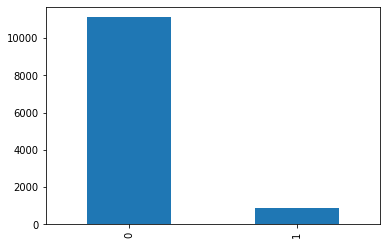

In [21]:
all_news['label'].value_counts().plot(kind='bar');

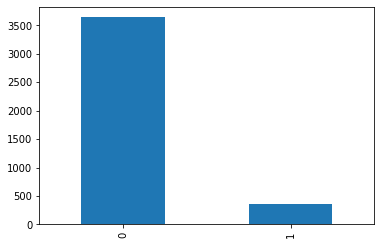

In [22]:
data['label'].value_counts().plot(kind='bar');

In [23]:
print(all_news.groupby('label').size().reset_index(name='count'))
print(data.groupby('label').size().reset_index(name='count'))

   label  count
0      0  11109
1      1    891
   label  count
0      0   3642
1      1    358


In [24]:
# 11팀 태윤님이 보내주신 코랩(https://colab.research.google.com/drive/1kZS2IO8Rs8LTG22kNJiB4dvCn5gltpkH?usp=sharing)에서 2020-2022 전체 기간부분인 stopwords 가져왔습니다.
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '및', '그', '방법', '년부터', 
              '하는','그','등','및','제','과','더',"일","에","로",'위한',"월",'출시','개최',
             "년","것","억","반려동물","반려동물과","첫","만","for","and","the","a","in","of"]

In [25]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 4.9 MB/s 
     |████████████████████████████████| 465 kB 66.6 MB/s 


In [26]:
import konlpy
from konlpy.tag import Okt

okt = Okt()

X_train = []
for sentence in all_news['0']: # 전체기사데이터
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)
  
X_test = []
for sentence in data['0']: # 2020기사데이터
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)

In [27]:
from keras.preprocessing.text import Tokenizer

max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [28]:
# 중복 데이터라서 같게 나옵니다.

In [29]:
print(X_train[:10]) 

[[702, 1, 13, 79, 2, 175, 1419, 2, 70], [540, 84, 5151, 10, 2151, 1975, 348, 2335, 2555, 2336, 1223, 191], [15, 528, 52, 4231, 2337], [18, 235, 195, 1, 23, 76, 1717, 21, 22], [4, 382, 5, 349, 277, 30, 3, 438, 25, 191, 514, 53, 4232, 3], [5152, 6729, 349, 1976, 7, 4233, 2823, 1279, 2556, 108, 555, 333], [52, 1839, 21, 1420, 439, 3620, 1, 2557, 35, 168, 1128, 236], [406, 84, 471, 125, 2824, 737, 72, 572, 30], [4, 1977, 1341, 2152, 5, 5153, 5154], [3158, 1, 20, 14, 3159, 10, 4234, 10, 5155, 1514, 271]]


In [30]:
print(X_test[:10])

[[702, 1, 13, 79, 2, 175, 1419, 2, 70], [540, 84, 5151, 10, 2151, 1975, 348, 2335, 2555, 2336, 1223, 191], [15, 528, 52, 4231, 2337], [18, 235, 195, 1, 23, 76, 1717, 21, 22], [4, 382, 5, 349, 277, 30, 3, 438, 25, 191, 514, 53, 4232, 3], [5152, 6729, 349, 1976, 7, 4233, 2823, 1279, 2556, 108, 555, 333], [52, 1839, 21, 1420, 439, 3620, 1, 2557, 35, 168, 1128, 236], [406, 84, 471, 125, 2824, 737, 72, 572, 30], [4, 1977, 1341, 2152, 5, 5153, 5154], [3158, 1, 20, 14, 3159, 10, 4234, 10, 5155, 1514, 271]]


제목의 최대 길이 :  24
제목의 평균 길이 :  11.3515


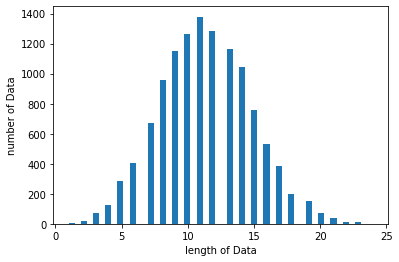

In [31]:
print("제목의 최대 길이 : ", max(len(l) for l in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

제목의 최대 길이 :  23
제목의 평균 길이 :  11.39525


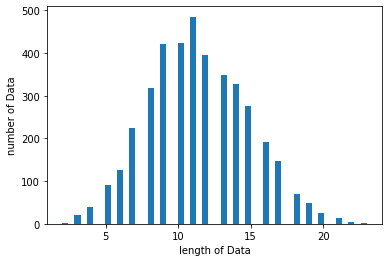

In [32]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test))
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [33]:
import numpy as np

y_train = []
y_test = []

for i in range(len(all_news['label'])):
  if all_news['label'].iloc[i] == 1:
    y_train.append([0, 1])
  elif all_news['label'].iloc[i] == 0:
    y_train.append([1, 0])

for i in range(len(data['label'])):
  if data['label'].iloc[i] == 1:
    y_test.append([0, 1])
  elif data['label'].iloc[i] == 0:
    y_test.append([1, 0])

y_train = np.array(y_train)
y_test = np.array(y_test)

In [34]:
y_train

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [35]:
y_test

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [36]:
! pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pad-sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10216 sha256=558859e7a343a780ad0402551abc10d2db969e04e8a69accafa7023cc34c6c0c
  Stored in directory: /root/.cache/pip/wheels/51/e4/5c/d3610ed4476515e540ff4096e3e9a8a3e701dedfe1072eb000
Successfully built pad-sequences


In [37]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 20    # 전체 데이터의 길이20

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [38]:
X_train.shape

(12000, 20)

In [39]:
X_test.shape

(4000, 20)

In [41]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
960/960 [==============================] - 68s 68ms/step - loss: 0.1891 - accuracy: 0.9415 - val_loss: 0.1102 - val_accuracy: 0.9733
Epoch 2/30
960/960 [==============================] - 63s 65ms/step - loss: 0.0688 - accuracy: 0.9774 - val_loss: 0.1096 - val_accuracy: 0.9700
Epoch 3/30
960/960 [==============================] - 63s 66ms/step - loss: 0.0368 - accuracy: 0.9873 - val_loss: 0.1576 - val_accuracy: 0.9542
Epoch 4/30
960/960 [==============================] - 61s 63ms/step - loss: 0.0246 - accuracy: 0.9914 - val_loss: 0.1227 - val_accuracy: 0.9667
Epoch 5/30
960/960 [==============================] - 61s 63ms/step - loss: 0.0199 - accuracy: 0.9920 - val_loss: 0.1525 - val_accuracy: 0.9608
Epoch 6/30
960/960 [==============================] - 61s 63ms/step - loss: 0.0152 - accuracy: 0.9936 - val_loss: 0.1459 - val_accuracy: 0.9654
Epoch 7/30
960/960 [==============================] - 59s 62ms/step - loss: 0.0110 - accuracy: 0.9950 - val_loss: 0.1897 - val_accuracy:

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         3500000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 3,617,506
Trainable params: 3,617,506
Non-trainable params: 0
_________________________________________________________________


In [43]:
# print("\n accuracy : {:.3f}".format(model.evaluate(X_test,y_test)[1]*100)) # 중복된 데이터라서 너무 높게 나온것같다.

In [44]:
predict = model.predict(X_test)

125/125 [==============================] - 2s 14ms/step


In [45]:
import numpy as np
predict_labels = np.argmax(predict, axis=1)
original_labels = np.argmax(y_test, axis=1)

In [46]:
for i in range(30):
  print("반려동물 기사 : ", data['0'].iloc[i], "/\t 기존: ", original_labels[i], "/\t예측: ", predict_labels[i])

반려동물 기사 :  은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영 /	 기존:  0 /	예측:  0
반려동물 기사 :  새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다 /	 기존:  0 /	예측:  0
반려동물 기사 :  반려식물로 코로나 우울 해소 /	 기존:  1 /	예측:  1
반려동물 기사 :  “우리 아이와 반려동물, 함께 생활해도 괜찮을까?” /	 기존:  0 /	예측:  0
반려동물 기사 :  [영상]반려동물 식품의 세계화 "정부지원 받아 글로벌기업으로 우뚝" /	 기존:  0 /	예측:  0
반려동물 기사 :  배스 사들여 반려동물식품 제조…빈집 고쳐 장기거주 사회주택 제공 /	 기존:  0 /	예측:  0
반려동물 기사 :  반려동물도 코로나블루? 쿠쿠전자 넬로, 팻케어 제품 수요 증가 /	 기존:  0 /	예측:  0
반려동물 기사 :  2021년부터 동물보호법 상 맹견은 책임보험 의무화 /	 기존:  1 /	예측:  1
반려동물 기사 :  [웰컴 투 펫팸] 반려동물도 쇼크로 쓰러진다 /	 기존:  0 /	예측:  0
반려동물 기사 :  지솔펫, 반려동물을 위한 살균·소독·향균 탈취제 선보여 /	 기존:  0 /	예측:  0
반려동물 기사 :  [펫 닥터] 아이센텀동물메디컬센터-반려동물 녹내장 /	 기존:  0 /	예측:  0
반려동물 기사 :  '2020 대한민국 반려동물 산업대상'...12개 기업 선정 /	 기존:  0 /	예측:  0
반려동물 기사 :  [펫플스토리] 반려동물 복지 향한 ‘펫로스케어’의 남다른 행보 /	 기존:  0 /	예측:  0
반려동물 기사 :  2021년부터 동물보호법 상 맹견은 책임보험 의무화 /	 기존:  1 /	예측:  1
반려동물 기사 :  [기자수첩] 코로나가 불러온 동물입양 붐 /	 기존:  1 /	예측:  1
반려동물 기사 :  [웰컴 투 펫팸] 반려동물도 쇼크로 쓰러진다 /	 기존:  0 /	예측:  0
반려동물 기사 :  [상생협력]펫티켓으로 인간과 반려동물의 공존을 모색하는 ㈜프로젝